# Task 8: Root Length Prediction Pipeline for Kaggle Competition

This notebook presents the final inference pipeline developed for Task 8 of the Computer Vision block. The objective is to predict the **primary root length** for each plant in a set of raw images from the Hades dataset. This pipeline integrates the skills acquired in Tasks 1 through 7 and is designed to function as a complete, end-to-end solution—**from preprocessing to inference and post-processing**.

**Data**
The dataset used to train the model used here is made up of two different plant image-mask sets, provided by NPEC. The images were processed as following: 
- Images were padded so as to be divisible by the patch size
- Images were cropped around the largest contour found in the image
- Images were patchified with a patch_size of 256 and step of 128
- A simple filtering method was applied: a patch was kept if it contained at least 0.5% root data and includes at least one connected root segment larger than a minimum area of 75px

**Model**
The model is a custom U-net model that has the following architecture:
```
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
==================================================================================================
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_38 (Conv2D)             (None, 256, 256, 16  160         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_18 (Dropout)           (None, 256, 256, 16  0           ['conv2d_38[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_39 (Conv2D)             (None, 256, 256, 16  2320        ['dropout_18[0][0]']             
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 128, 128, 16  0          ['conv2d_39[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_40 (Conv2D)             (None, 128, 128, 32  4640        ['max_pooling2d_8[0][0]']        
                                )                                                                 
                                                                                                  
 dropout_19 (Dropout)           (None, 128, 128, 32  0           ['conv2d_40[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_19[0][0]']             
                                )                                                                 
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 64, 64, 32)  0           ['conv2d_41[0][0]']              
                                                                                                  
 conv2d_42 (Conv2D)             (None, 64, 64, 64)   18496       ['max_pooling2d_9[0][0]']        
                                                                                                  
 dropout_20 (Dropout)           (None, 64, 64, 64)   0           ['conv2d_42[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)             (None, 64, 64, 64)   36928       ['dropout_20[0][0]']             
                                                                                                  
 max_pooling2d_10 (MaxPooling2D  (None, 32, 32, 64)  0           ['conv2d_43[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_44 (Conv2D)             (None, 32, 32, 128)  73856       ['max_pooling2d_10[0][0]']       
                                                                                                  
 dropout_21 (Dropout)           (None, 32, 32, 128)  0           ['conv2d_44[0][0]']              
                                                                                                  
 conv2d_45 (Conv2D)             (None, 32, 32, 128)  147584      ['dropout_21[0][0]']             
                                                                                                  
 max_pooling2d_11 (MaxPooling2D  (None, 16, 16, 128)  0          ['conv2d_45[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_46 (Conv2D)             (None, 16, 16, 256)  295168      ['max_pooling2d_11[0][0]']       
                                                                                                  
 dropout_22 (Dropout)           (None, 16, 16, 256)  0           ['conv2d_46[0][0]']              
                                                                                                  
 conv2d_47 (Conv2D)             (None, 16, 16, 256)  590080      ['dropout_22[0][0]']             
                                                                                                  
 conv2d_transpose_8 (Conv2DTran  (None, 32, 32, 128)  131200     ['conv2d_47[0][0]']              
 spose)                                                                                           
                                                                                                  
 concatenate_8 (Concatenate)    (None, 32, 32, 256)  0           ['conv2d_transpose_8[0][0]',     
                                                                  'conv2d_45[0][0]']              
                                                                                                  
 conv2d_48 (Conv2D)             (None, 32, 32, 128)  295040      ['concatenate_8[0][0]']          
                                                                                                  
 dropout_23 (Dropout)           (None, 32, 32, 128)  0           ['conv2d_48[0][0]']              
                                                                                                  
 conv2d_49 (Conv2D)             (None, 32, 32, 128)  147584      ['dropout_23[0][0]']             
                                                                                                  
 conv2d_transpose_9 (Conv2DTran  (None, 64, 64, 64)  32832       ['conv2d_49[0][0]']              
 spose)                                                                                           
                                                                                                  
 concatenate_9 (Concatenate)    (None, 64, 64, 128)  0           ['conv2d_transpose_9[0][0]',     
                                                                  'conv2d_43[0][0]']              
                                                                                                  
 conv2d_50 (Conv2D)             (None, 64, 64, 64)   73792       ['concatenate_9[0][0]']          
                                                                                                  
 dropout_24 (Dropout)           (None, 64, 64, 64)   0           ['conv2d_50[0][0]']              
                                                                                                  
 conv2d_51 (Conv2D)             (None, 64, 64, 64)   36928       ['dropout_24[0][0]']             
                                                                                                  
 conv2d_transpose_10 (Conv2DTra  (None, 128, 128, 32  8224       ['conv2d_51[0][0]']              
 nspose)                        )                                                                 
                                                                                                  
 concatenate_10 (Concatenate)   (None, 128, 128, 64  0           ['conv2d_transpose_10[0][0]',    
                                )                                 'conv2d_41[0][0]']              
                                                                                                  
 conv2d_52 (Conv2D)             (None, 128, 128, 32  18464       ['concatenate_10[0][0]']         
                                )                                                                 
                                                                                                  
 dropout_25 (Dropout)           (None, 128, 128, 32  0           ['conv2d_52[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_53 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_25[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_transpose_11 (Conv2DTra  (None, 256, 256, 16  2064       ['conv2d_53[0][0]']              
 nspose)                        )                                                                 
                                                                                                  
 concatenate_11 (Concatenate)   (None, 256, 256, 32  0           ['conv2d_transpose_11[0][0]',    
                                )                                 'conv2d_39[0][0]']              
                                                                                                  
 conv2d_54 (Conv2D)             (None, 256, 256, 16  4624        ['concatenate_11[0][0]']         
                                )                                                                 
                                                                                                  
 dropout_26 (Dropout)           (None, 256, 256, 16  0           ['conv2d_54[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 256, 256, 16  2320        ['dropout_26[0][0]']             
                                )                                                                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 256, 256, 1)  17          ['conv2d_55[0][0]']              
                                                                                                  
==================================================================================================
Total params: 1,940,817
Trainable params: 1,940,817
Non-trainable params: 0
__________________________________________________________________________________________________
```

The model was trained for 18 epochs (early stopping with a patience of 3 monitoring val_loss) with a batch_size of 32, and validated based on a custom f1 score, for which the function can be found below. 

**Important constraints and goals:**
- **No training code** is included; only inference-related components.
- The pipeline accepts a directory of raw input images and outputs a `.csv` file with the predicted root lengths per plant.
- A **deep learning model** is used for **root segmentation**, followed by Root System Architecture (RSA) extraction.
- The performance is evaluated on a **Kaggle competition**, with the final ranking determined by the **private leaderboard** using **sMAPE** as the metric.

In [1]:
# imports
import os
import cv2
import glob
import csv
import numpy as np
import networkx as nx
from patchify import patchify, unpatchify
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

import wandb
wandb.login()

wandb: Currently logged in as: 236578 (236578-breda-university-of-applied-sciences) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## Helper functions

In [20]:
# helper functions
def f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = TP / (Positives+K.epsilon())
        return recall
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives+K.epsilon())
        return precision
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def padder(image, patch_size):
    """
    Pads the image to be divisible by the patch size.

    Args:
        image (np.ndarray): Input image.
        patch_size (int): Patch size to pad to.

    Returns:
        Tuple[np.ndarray, Tuple[int]]: Padded image and padding amounts (top, bottom, left, right).
    """
    h, w = image.shape[:2]

    height_padding = ((h // patch_size) + 1) * patch_size - h
    width_padding = ((w // patch_size) + 1) * patch_size - w

    top_padding = int(height_padding / 2)
    bottom_padding = height_padding - top_padding
    left_padding = int(width_padding / 2)
    right_padding = width_padding - left_padding

    padded_image = cv2.copyMakeBorder(
        image,
        top_padding, bottom_padding,
        left_padding, right_padding,
        cv2.BORDER_CONSTANT, value=0
    )

    return padded_image, (top_padding, bottom_padding, left_padding, right_padding)


def unpadder(image, padding):
    """
    Removes padding added earlier.
    
    Args:
        padded_image (np.ndarray): The padded image.
        pad_values (tuple): Tuple of (top, bottom, left, right) padding.

    Returns:
        np.ndarray: Image with padding removed.
    """

    top_padding, bottom_padding, left_padding, right_padding = padding
    return image[top_padding:image.shape[0] - bottom_padding, 
                left_padding:image.shape[1] - right_padding]


def cropper(image):
    """
    Crops the input image around the largest contour (usually the Petri dish).
    Converts to grayscale and handles legend cropping. Returns crop metadata for uncropping.
    
    Args:
        image (np.ndarray): Input image (can be grayscale or RGB/BGR).

    Returns:
        cropped (np.ndarray): Cropped grayscale image.
        crop_info (dict): Metadata needed to reverse the crop (original shape, crop location, etc.).
    """
    original_shape = image.shape

    # Convert to grayscale if RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur and threshold to detect contours
    blurred = cv2.GaussianBlur(image, (11, 11), 0)
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return image, {
            "original_shape": original_shape,
            "legend_cropped": False,
            "used_crop": False
        }

    # Crop around largest contour (Petri dish)
    largest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest)

    # This shrinks the bounding box to exclude edge artifacts.
    padding = 10  # pixels to shrink by
    x += padding
    y += padding
    w -= 2 * padding
    h -= 2 * padding

    size = max(w, h)
    x_center, y_center = x + w // 2, y + h // 2
    x_start = max(0, x_center - size // 2)
    y_start = max(0, y_center - size // 2)

    cropped = image[y_start:y_start + size, x_start:x_start + size]

    crop_info = {
        "original_shape": original_shape,
        "legend_cropped": False,
        "used_crop": True,
        "x_start": x_start,
        "y_start": y_start,
        "crop_size": size
    }

    return cropped, crop_info


def uncropper(cropped_img, crop_info):
    """
    Reverses the cropping done by the `cropper()` function and places the cropped image
    back into its original location in a blank canvas of the original image size.

    Args:
        cropped_img (np.ndarray): The cropped image (typically a predicted mask)
        crop_info (dict): Metadata returned by `cropper()` used to reconstruct original image

    Returns:
        np.ndarray: Image of original shape with the cropped image placed back in the correct position
    """
    
    original_shape = crop_info["original_shape"]
    canvas = np.zeros(original_shape[:2], dtype=cropped_img.dtype)

    if not crop_info.get("used_crop", False):
        return cropped_img

    x_start = crop_info["x_start"]
    y_start = crop_info["y_start"]
    size = crop_info["crop_size"]

    # Paste cropped prediction back into full-sized black canvas
    canvas[y_start:y_start + size, x_start:x_start + size] = cropped_img
    return canvas

def show_images(images, titles, figsize=(20, 10)):
    """Helper function to display multiple images in a row."""
    fig, axes = plt.subplots(1, len(images), figsize=figsize)
    if len(images) == 1:
        axes = [axes]
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if len(image.shape) == 3 else image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

def process_and_visualize_predictions(folder_path, model, patch_size):
    """
    Loops through all .png images in a folder, predicts root masks,
    and shows full debugging and alignment visualizations for each step.

    Args:
        folder_path (str): Path to the directory containing .png images.
        model (tf.keras.Model): The pre-loaded segmentation model.
        patch_size (int): The patch size the model was trained with.
    """
    # Find all .png files in the specified directory
    image_files = glob.glob(os.path.join(folder_path, '*.tif'))

    # Create a dictionary to hold the results
    all_predictions = {}
    
    if not image_files:
        print(f"No data found in '{folder_path}'. Please check the path.")
        return

    print(f"Found {len(image_files)} images to process.")

    for image_path in image_files:
        print(f"\n--- Processing: {os.path.basename(image_path)} ---")

        # Load the original image
        original_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if original_image is None:
            print(f"Could not read image: {image_path}. Skipping.")
            continue

        image_name = os.path.basename(image_path)
        # == STEP 1: CROP IMAGE ==
        # The cropper also handles conversion to grayscale.
        cropped_gray, crop_info = cropper(original_image)

        # == STEP 2: PAD IMAGE ==
        padded_image, padding_info = padder(cropped_gray, patch_size)

        # == STEP 3: PREDICT MASK ==
        # Patchify the padded image
        patches = patchify(padded_image, (patch_size, patch_size), step=patch_size)

        # Prepare image for the model: add channel and batch dims, and normalize
        model_input = np.expand_dims(np.expand_dims(padded_image, axis=-1), axis=0) / 255.0
        num_rows, num_cols, h, w = patches.shape
        model_input = patches.reshape(-1, h, w) # Shape: (num_patches, h, w)
        model_input = np.expand_dims(model_input, axis=-1) / 255.0 # Shape: (num_patches, h, w, 1)

        # Predict
        predicted_patches = model.predict(model_input, verbose=0)
        print("Step 3: Model prediction complete.")
        
        # Reshape predicted patches back to their original grid layout
        predicted_patches_reshaped = predicted_patches.reshape(num_rows, num_cols, h, w)

        # Stitch the predicted patches back together into a single mask
        predicted_padded_mask = unpatchify(predicted_patches_reshaped, padded_image.shape)
        
        # Visualization of the stitched mask
        plt.figure(figsize=(8, 8))
        plt.imshow(predicted_padded_mask, cmap='gray')
        plt.title("Stitched Predicted Mask (from Patchify)")
        plt.colorbar()
        plt.show()

        # == STEP 4: UNPAD MASK ==
        unpadded_mask = unpadder(predicted_padded_mask, padding_info)

        # == STEP 5: UNCROP MASK ==
        final_mask = uncropper(unpadded_mask, crop_info)

        all_predictions[image_name] = {'mask': final_mask}
        
        # == FINAL ALIGNMENT VISUALIZATION ==
        print("Generating final alignment overlay...")
        # Create a binary mask for clear visualization
        binary_mask = (final_mask > 0.5).astype(np.uint8) * 255
        
        # Create a red overlay from the mask
        overlay = np.zeros_like(original_image)
        overlay[:, :, 2] = binary_mask # BGR format, so index 2 is Red

        # Blend the original image with the red overlay
        # This shows exactly where the model thinks the roots are on the original image
        overlayed_image = cv2.addWeighted(original_image, 1, overlay, 0.5, 0)
        
        show_images(
            [original_image, overlayed_image],
            ["Final Check: Original Image", "Final Check: Predicted Mask Overlay"],
            figsize=(22, 11)
        )

    # Return the dictionary containing all predictions
    return all_predictions

def filter_by_area(binary_mask, min_area=100):
    """
    Removes small, noisy objects from a binary mask by keeping only the
    connected components with an area greater than a specified minimum.

    Args:
        binary_mask (np.ndarray): The input binary mask (0s and 1s or 0s and 255s).
        min_area (int): The minimum number of pixels for an object to be kept.

    Returns:
        np.ndarray: The cleaned binary mask with small objects removed.
    """
    # Find all connected components and stats
    # The `output` is a new mask where each object has a unique integer label (1, 2, 3, ...)
    # `stats` is a matrix where each row corresponds to a label and contains [x, y, width, height, area]
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(binary_mask, connectivity=8)

    # Create a new blank mask to draw our filtered objects onto
    filtered_mask = np.zeros_like(binary_mask)

    # Loop through all found components, starting from 1 (0 is the background)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        
        # If the area is larger than our threshold, keep it
        if area >= min_area:
            # Add this component to our filtered mask
            # We do this by finding all pixels with the current label `i`
            filtered_mask[labels_im == i] = 255

    return filtered_mask.astype(np.uint8)

def segment_plants_from_mask(mask, num_plants=5):
    """
    Segments a mask into individual plants using a rule-based approach.
    This version uses a conditional aspect ratio to handle tiny, newly
    germinated seeds correctly.
    """
    min_area = 50 
    aspect_ratio_threshold = 1.5 
    vertical_start_thresh_ratio = 0.3

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)
    h, w = mask.shape
    band_width = w / num_plants
    final_masks = [np.zeros_like(mask, dtype=np.uint8) for _ in range(num_plants)]

    for i in range(1, num_labels):
        x, y, cw, ch, area = stats[i]
        cx = centroids[i][0]

        if area < min_area:
            continue

        # For small objects (likely germinating seeds), we skip this check
        # because their shape can be irregular.
        if area > 200: # This threshold defines a "large" component
            aspect_ratio = ch / cw if cw > 0 else 0
            if aspect_ratio < aspect_ratio_threshold:
                continue

        if y > int(h * vertical_start_thresh_ratio):
            continue

        band_idx = int(cx // band_width)
        band_idx = min(band_idx, num_plants - 1)
        component_mask = (labels == i).astype(np.uint8)
        final_masks[band_idx] = np.logical_or(final_masks[band_idx], component_mask).astype(np.uint8)
    
    return final_masks


import numpy as np
import networkx as nx
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

import numpy as np
import networkx as nx
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

import numpy as np
import networkx as nx
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

import numpy as np
import networkx as nx
from skimage.morphology import skeletonize
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

def analyze_root_system(mask):
    """
    Analyzes a root system mask to find the primary root length using the
    A* pathfinding algorithm. Includes a robust fallback for disconnected skeletons.

    Args:
        mask (np.ndarray): A binary mask of a single, isolated plant.

    Returns:
        dict or None: A dictionary with analysis results or None if processing fails.
    """
    if np.sum(mask) == 0:
        return None

    try:
        skeleton = skeletonize((mask > 0))
        if np.sum(skeleton) == 0:
            return None

        skeleton_obj = Skeleton(skeleton)
        _, node_coordinates_xy = skeleton_to_csgraph(skeleton)
        node_coordinates_yx = np.transpose(node_coordinates_xy)
        
        branch_data = summarize(skeleton_obj, separator='_')

        if branch_data.empty or node_coordinates_yx.shape[0] < 2:
            return None

        G = nx.from_pandas_edgelist(
            branch_data, 
            source='node_id_src', 
            target='node_id_dst', 
            edge_attr='branch_distance'
        )
        
        start_node = np.argmin(node_coordinates_yx[:, 0])
        goal_node = np.argmax(node_coordinates_yx[:, 0])

        def heuristic(u, v):
            return np.linalg.norm(node_coordinates_yx[u] - node_coordinates_yx[v])

        primary_path_nodes = nx.astar_path(
            G, source=start_node, target=goal_node, heuristic=heuristic, weight='branch_distance'
        )
        primary_root_length = nx.astar_path_length(
            G, source=start_node, target=goal_node, heuristic=heuristic, weight='branch_distance'
        )
        
        pixel_path_coords = _get_pixel_path(primary_path_nodes, branch_data, skeleton_obj, node_coordinates_yx)

        return {
            "length": primary_root_length, "skeleton": skeleton,
            "node_coords": node_coordinates_yx, "path_nodes": primary_path_nodes,
            "pixel_path": pixel_path_coords
        }

    except (nx.NetworkXNoPath, nx.NodeNotFound):
        # --- ROBUST FALLBACK for disconnected skeletons ---
        print(f"Warning: A* failed (disconnected root?). Analyzing largest component.")
        
        components = list(nx.connected_components(G))
        if not components: return None
            
        largest_component = max(components, key=len)
        subgraph = G.subgraph(largest_component)
        
        component_nodes = list(subgraph.nodes)
        component_coords = node_coordinates_yx[component_nodes]
        
        local_start_idx = np.argmin(component_coords[:, 0])
        local_goal_idx = np.argmax(component_coords[:, 0])
        
        start_node = component_nodes[local_start_idx]
        goal_node = component_nodes[local_goal_idx]
        
        primary_path_nodes = nx.astar_path(
            subgraph, source=start_node, target=goal_node, heuristic=heuristic, weight='branch_distance'
        )
        primary_root_length = nx.astar_path_length(
            subgraph, source=start_node, target=goal_node, heuristic=heuristic, weight='branch_distance'
        )
        
        pixel_path_coords = _get_pixel_path(primary_path_nodes, branch_data, skeleton_obj, node_coordinates_yx)

        return {
            "length": primary_root_length, "skeleton": skeleton,
            "node_coords": node_coordinates_yx, "path_nodes": primary_path_nodes,
            "pixel_path": pixel_path_coords
        }
        
    except Exception as e:
        print(f"An unexpected error occurred during analysis: {e}")
        return None

def _get_pixel_path(node_path, branch_data, skeleton_obj, node_coords):
    """
    Internal helper to construct a full pixel path from a list of nodes.
    """
    if not node_path:
        return np.array([])
        
    # --- THE FIX: Reshape the first coordinate to be a 2D array ---
    # This ensures all arrays in the list have the same number of dimensions.
    first_coord = node_coords[node_path[0]].reshape(1, 2)
    full_pixel_path = [first_coord]

    # Iterate over the edges (pairs of nodes) in the path
    for i in range(len(node_path) - 1):
        node_src = node_path[i]
        node_dst = node_path[i+1]

        # Find the branch in branch_data that connects these two nodes
        branch_row = branch_data[
            ((branch_data['node_id_src'] == node_src) & (branch_data['node_id_dst'] == node_dst)) |
            ((branch_data['node_id_src'] == node_dst) & (branch_data['node_id_dst'] == node_src))
        ]

        if not branch_row.empty:
            branch_id = branch_row.index[0]
            branch_pixels = skeleton_obj.path_coordinates(branch_id)
            
            # skan paths are ordered from src to dst. If our path is reversed,
            # we need to flip the pixel coordinates.
            if branch_row.iloc[0]['node_id_src'] == node_dst:
                branch_pixels = np.flip(branch_pixels, axis=0)
            
            # Append all pixels from this branch except the first one (to avoid duplicates)
            full_pixel_path.append(branch_pixels[1:])

    return np.concatenate(full_pixel_path, axis=0)



## Tracking project

In [3]:
# Start a new W&B run
run = wandb.init(
    project="Hades-Root-Length-Kaggle", 
    name="Root_length_experiment",
    job_type="inference"
)

# Log Configuration
wandb.config.model_name = "dariavladutu_236578_unet_model2_256px.h5"
wandb.config.patch_size = 256
wandb.config.prediction_threshold = 0.1
wandb.config.cropper_padding = 10
wandb.config.min_area_filter = 50
wandb.config.top_crop_ratio = 0.15 # The value from "Double Cropping" cell
wandb.config.aspect_ratio_threshold = 1.5

## Load pre-trained model

We begin by loading the pre-trained model from task 5.
Input: Patches of size 256x256

Output: Binary mask (highlighting root structures)

Dtype: .h5 file

Validated using: Custom f1 score (taken from task 5 training notebook)

In [4]:
patch_size = 256
example_file_name = r'C:\BUAS\retake\2024-25b-fai2-adsai-dariavladutu236578\datalab_tasks\task5\dariavladutu_236578_unet_model2_256px.h5'
model = load_model(example_file_name, custom_objects={"f1": f1})

## Root detection using model predictions
Input: Image data

Output: Patch-wise root mask predictions (unpatchified into full-sized mask)

# Pre-processing + inference
## *What is happenning?*

Image is loaded, then `cropped`, resulting in the pietri dish. Then the image is padded using the `padder` function to ensure the dimensions of it are divisible with the model's patch size (256). Then the image is patchified using the function `patchify` and the resulting patches (which are overlapping; stride=128) are inputed into the model. It generates patch-wise root mask predictions, which are then reassembled into a full-size mask using the `unpatchify` function. After this, the predicted mask is resized to fit the original image dimensions by `unpadding` and `uncropping` it.

Found 11 images to process.

--- Processing: test_image_1.tif ---
Step 3: Model prediction complete.


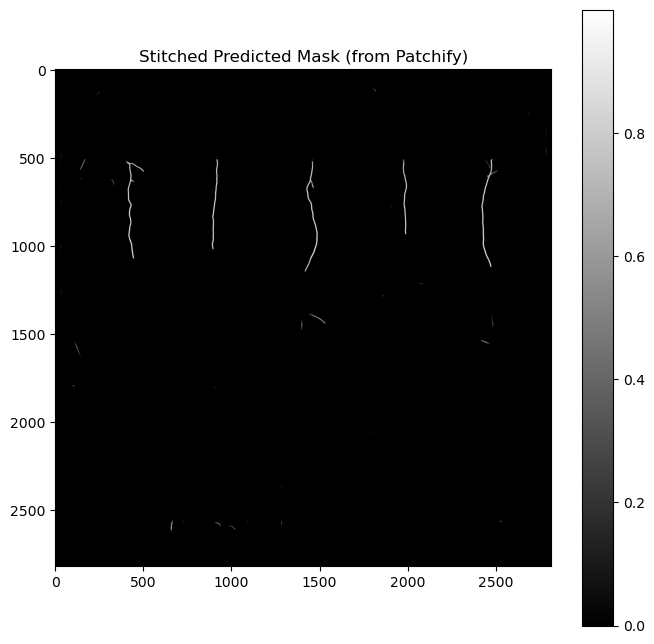

Generating final alignment overlay...


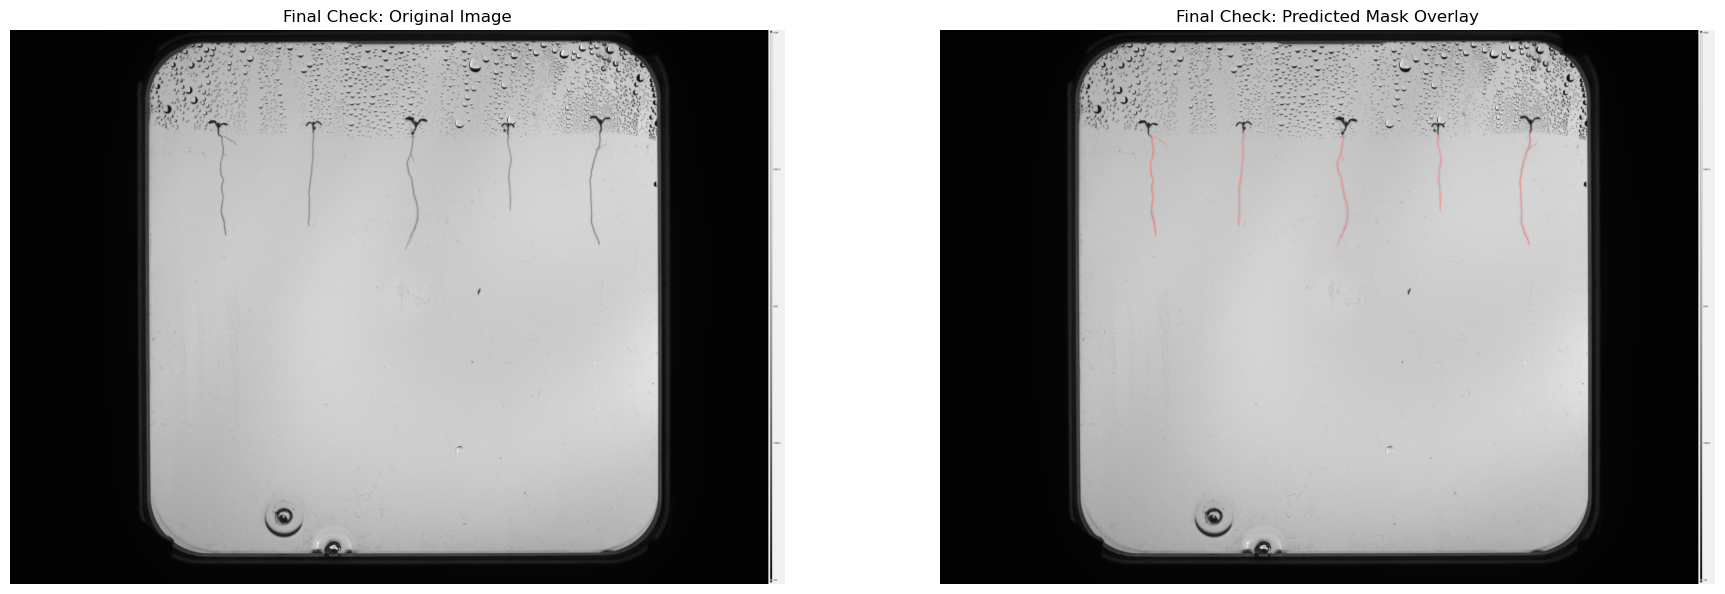


--- Processing: test_image_10.tif ---
Step 3: Model prediction complete.


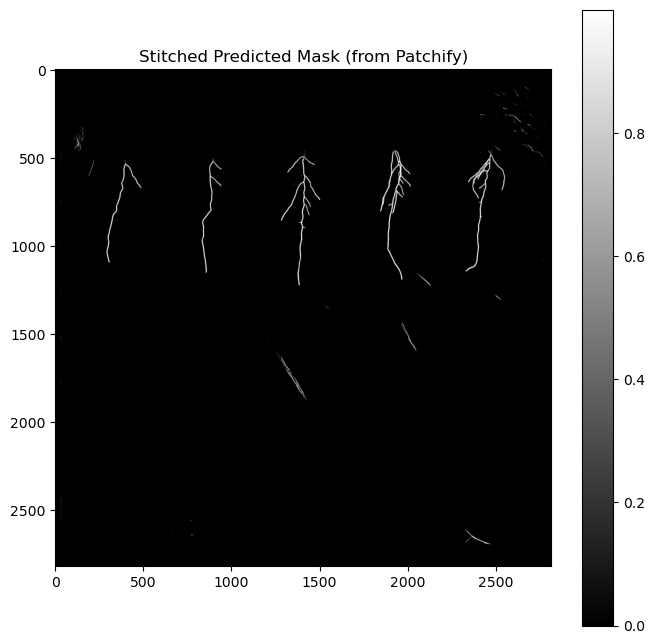

Generating final alignment overlay...


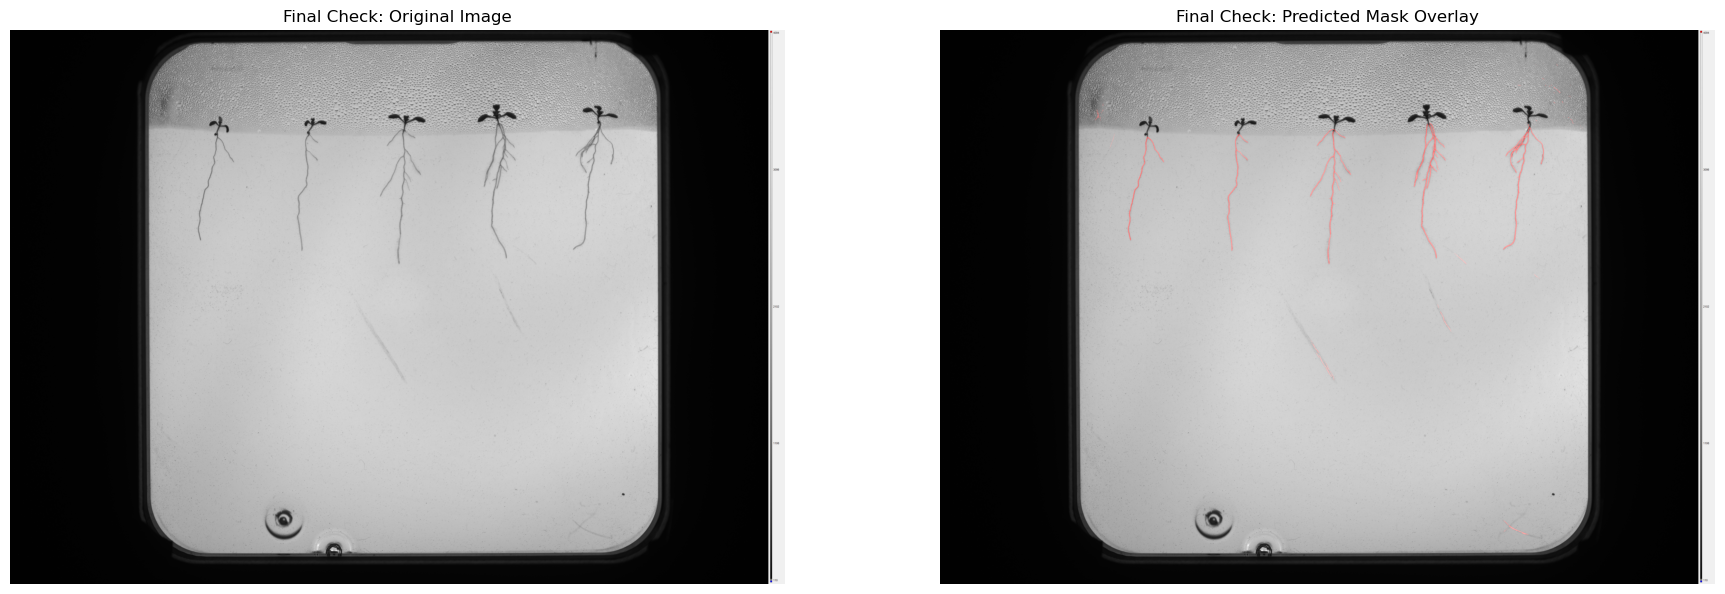


--- Processing: test_image_11.tif ---
Step 3: Model prediction complete.


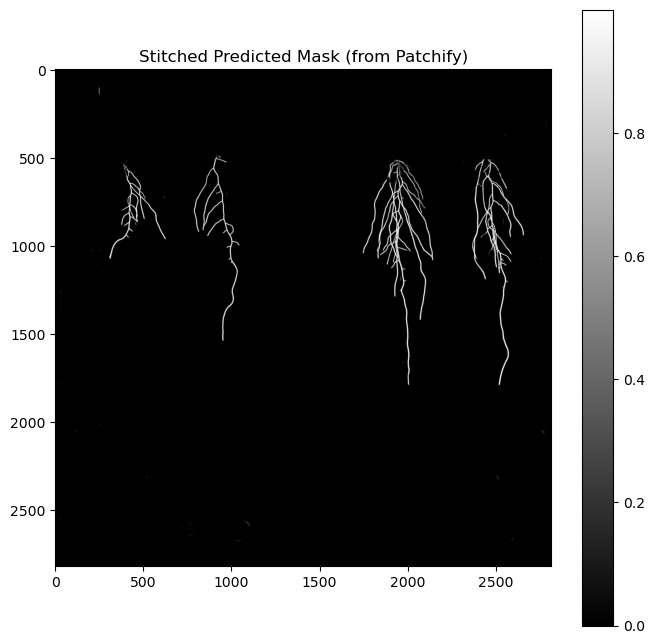

Generating final alignment overlay...


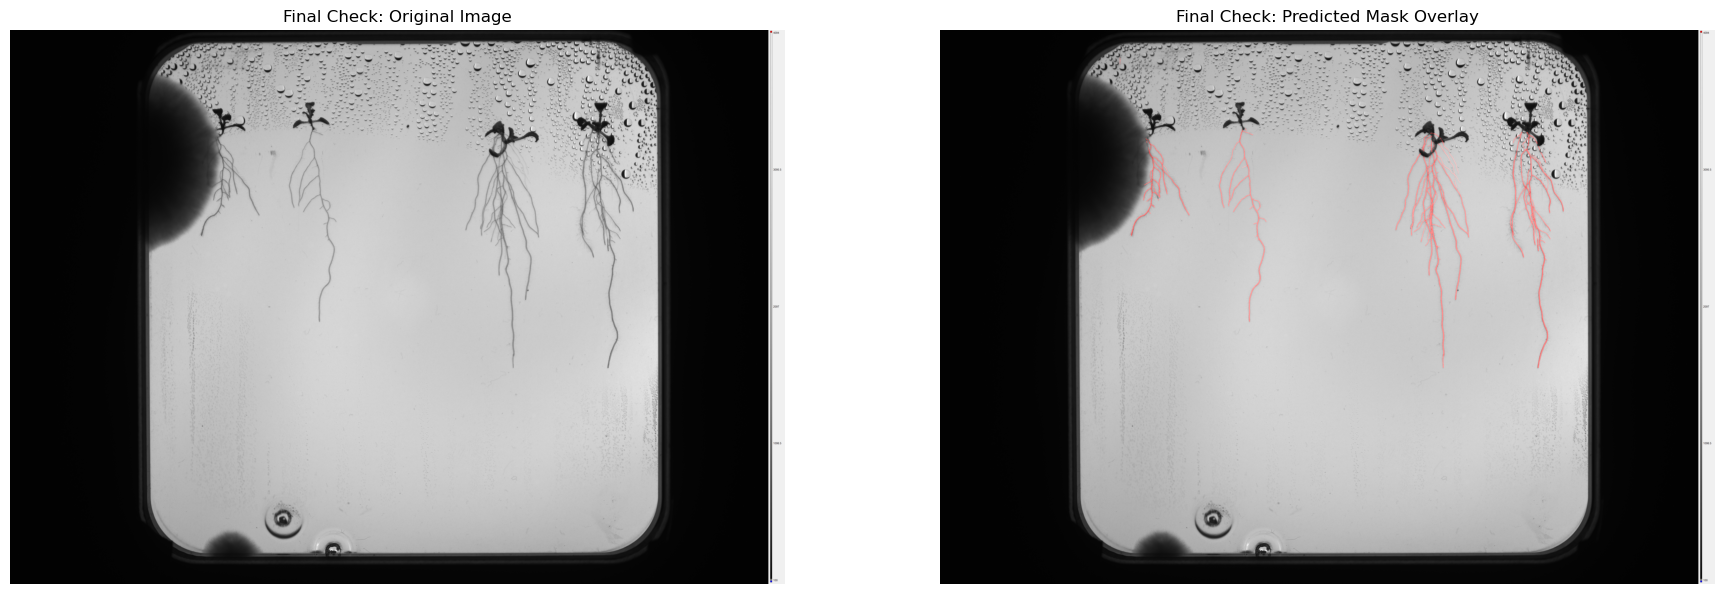


--- Processing: test_image_2.tif ---
Step 3: Model prediction complete.


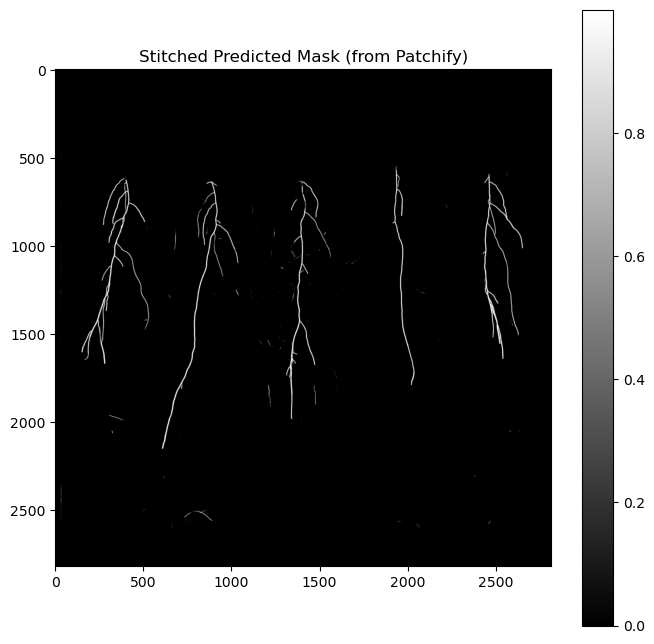

Generating final alignment overlay...


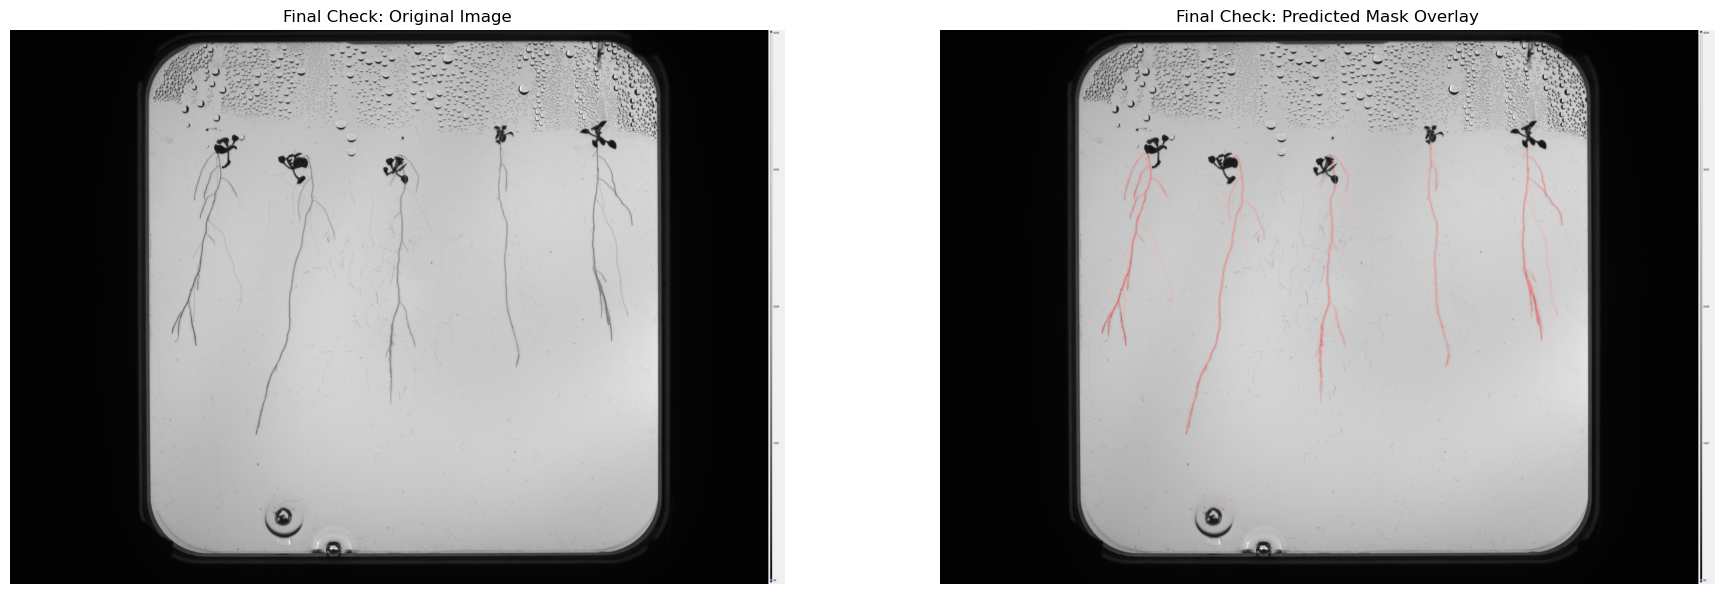


--- Processing: test_image_3.tif ---
Step 3: Model prediction complete.


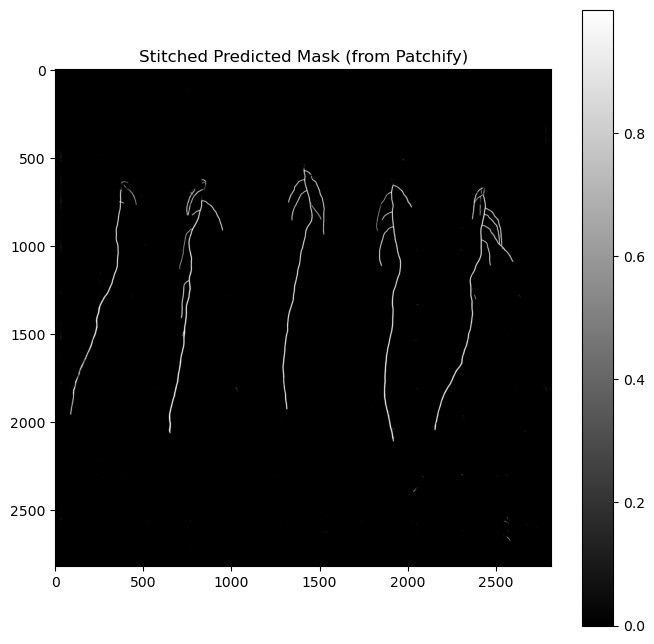

Generating final alignment overlay...


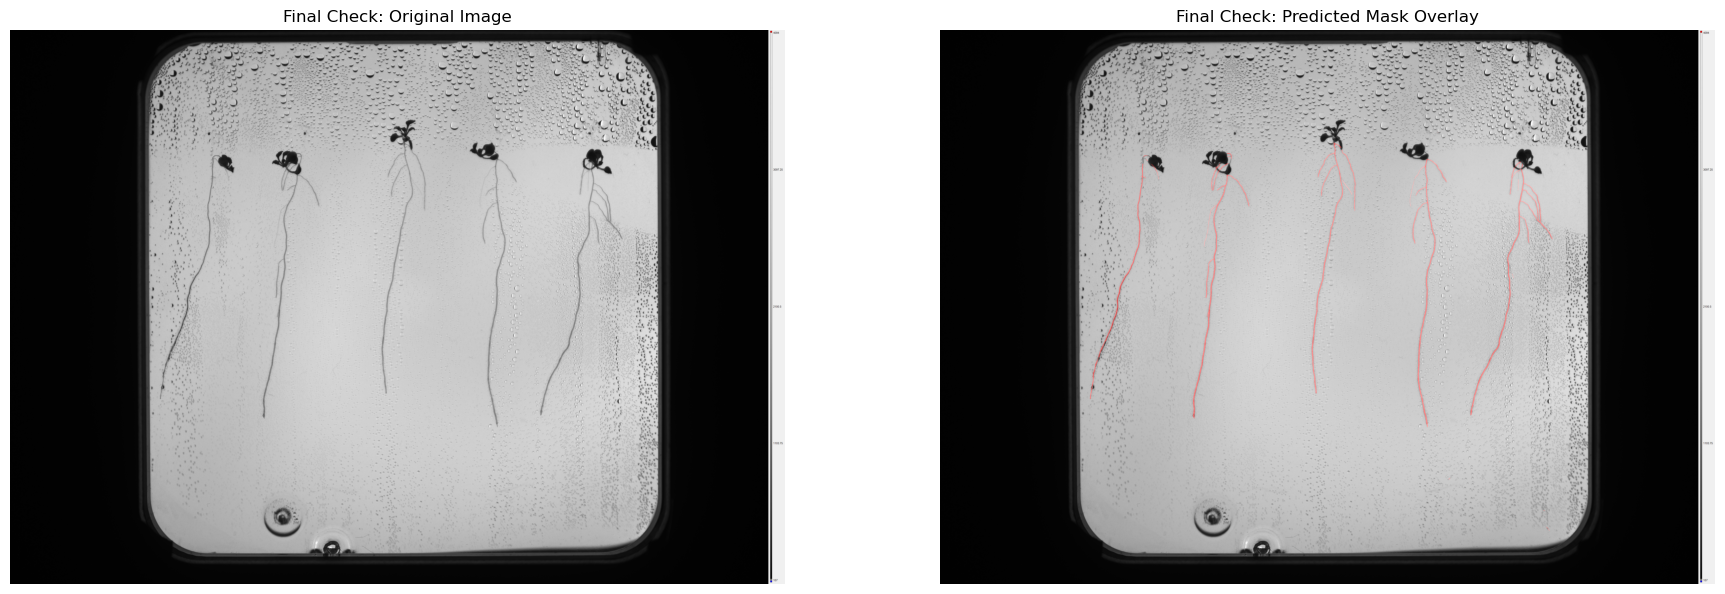


--- Processing: test_image_4.tif ---
Step 3: Model prediction complete.


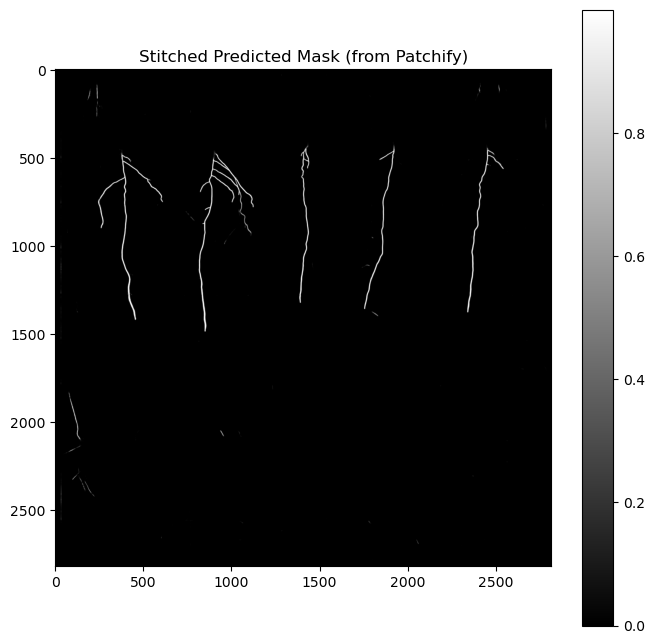

Generating final alignment overlay...


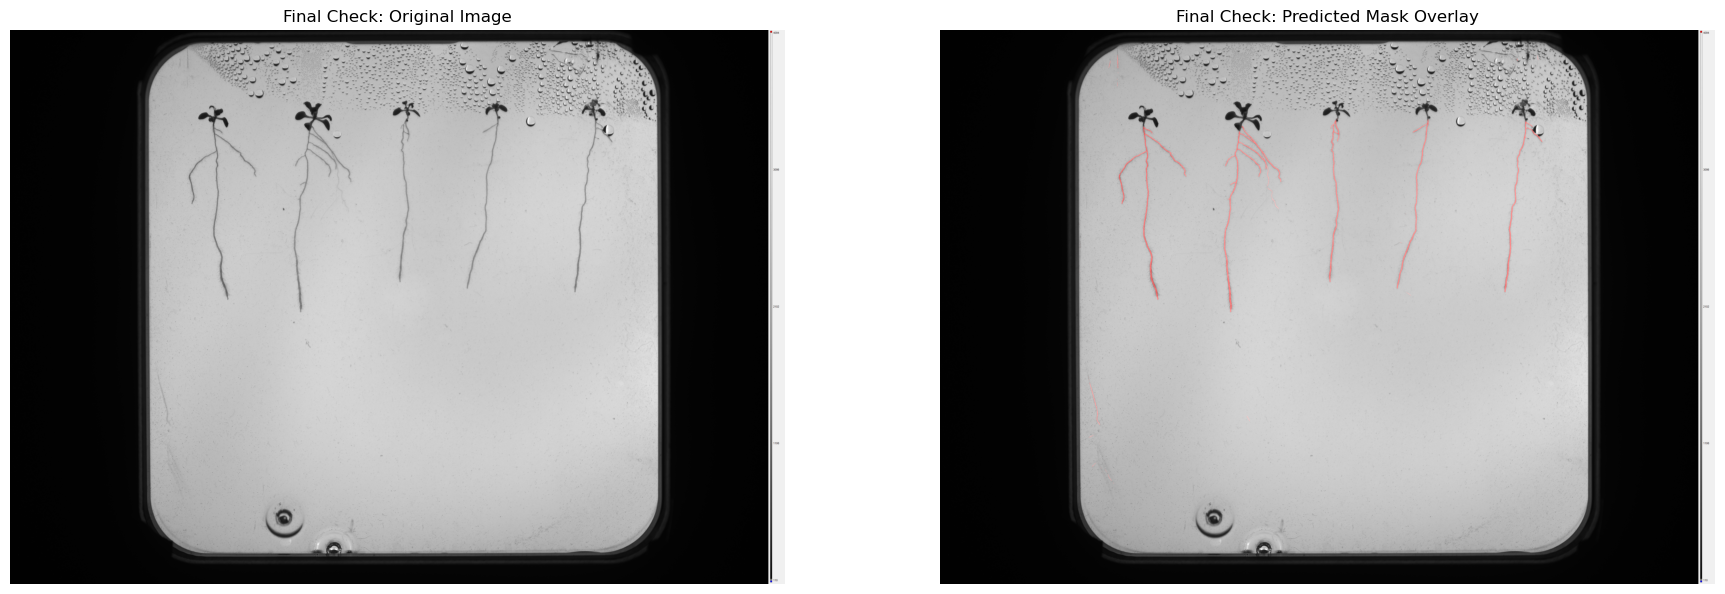


--- Processing: test_image_5.tif ---
Step 3: Model prediction complete.


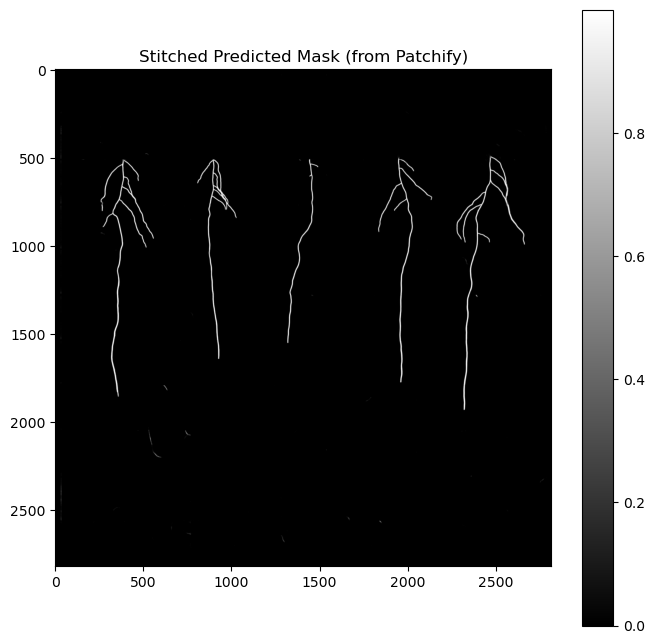

Generating final alignment overlay...


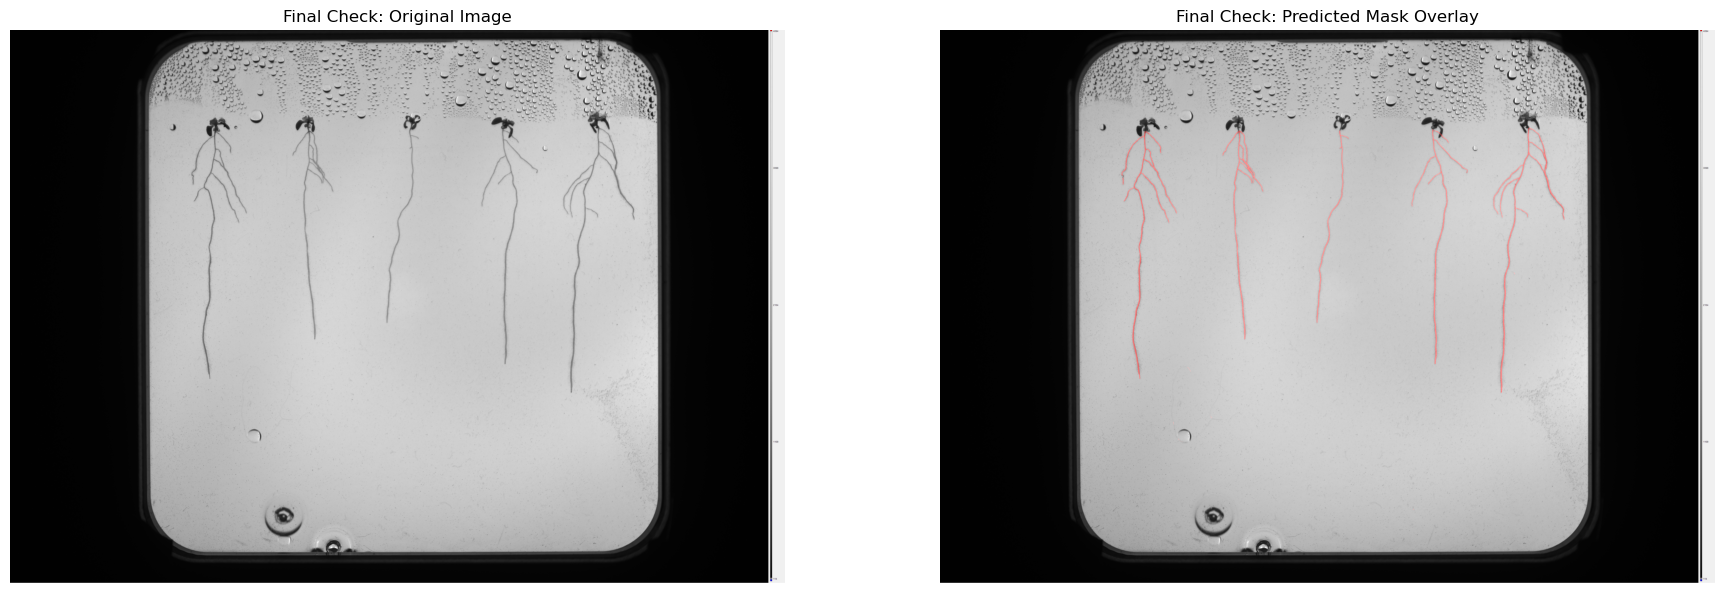


--- Processing: test_image_6.tif ---
Step 3: Model prediction complete.


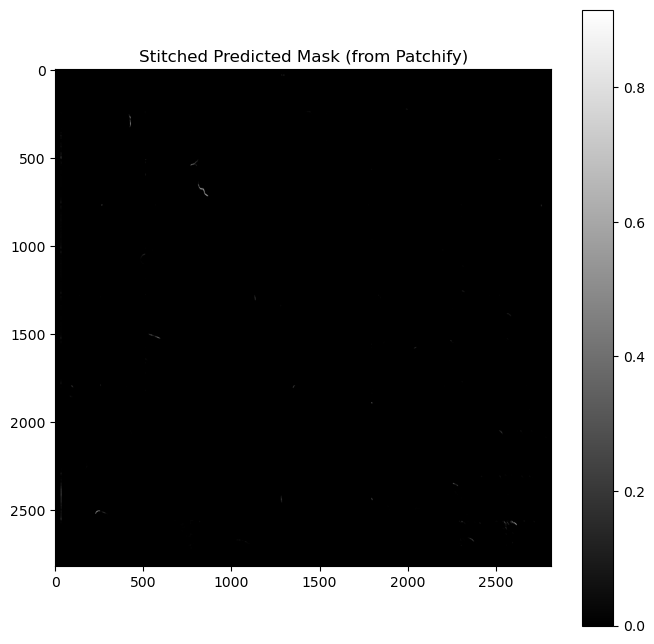

Generating final alignment overlay...


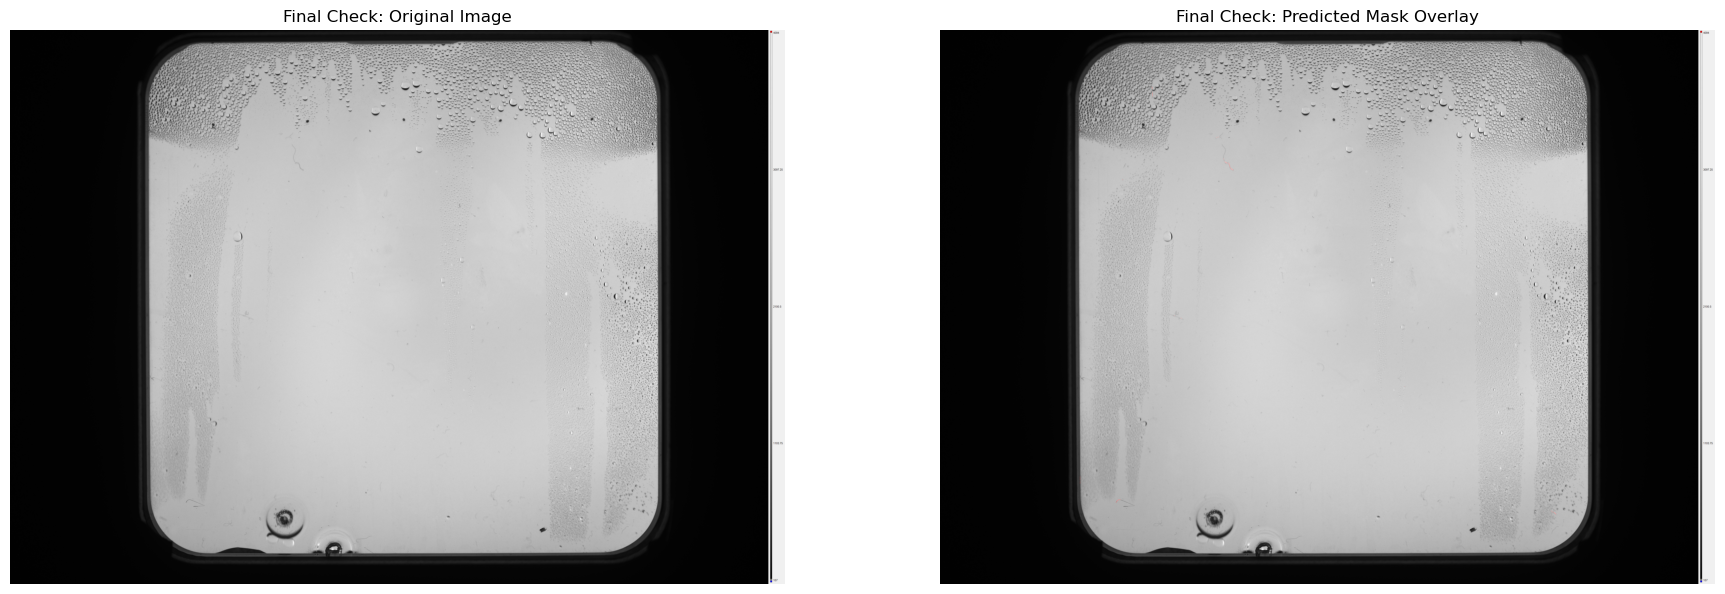


--- Processing: test_image_7.tif ---
Step 3: Model prediction complete.


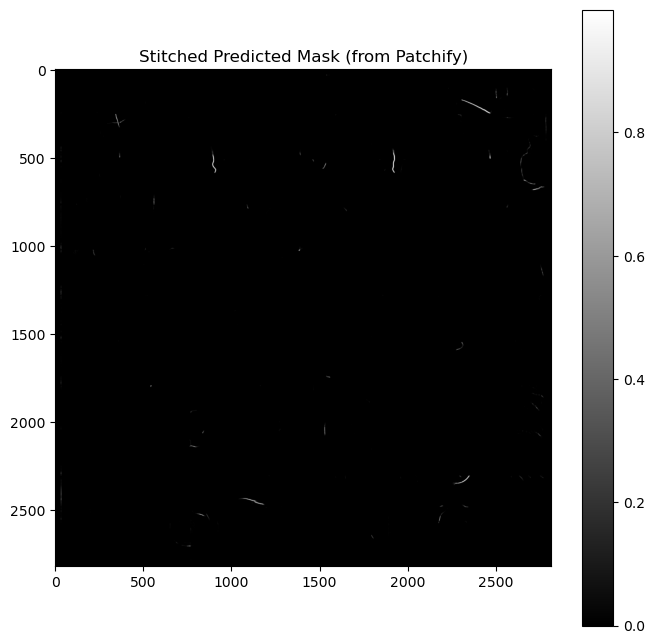

Generating final alignment overlay...


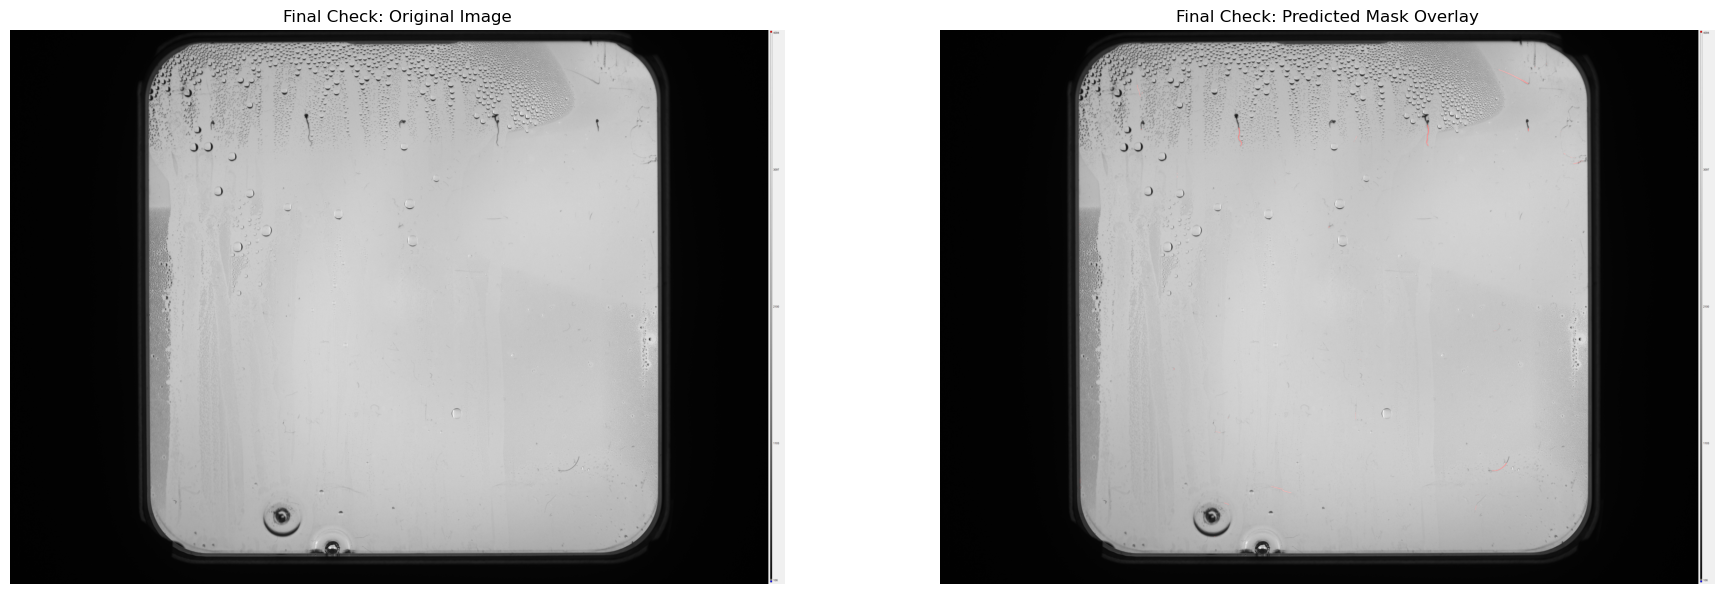


--- Processing: test_image_8.tif ---
Step 3: Model prediction complete.


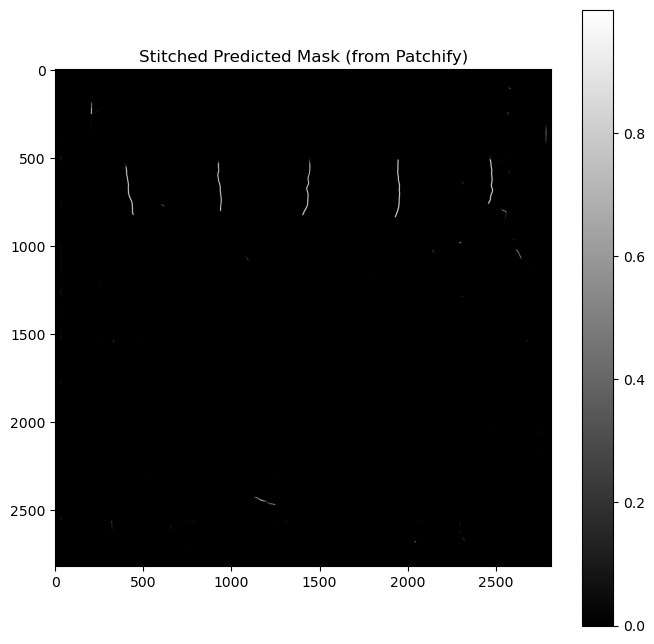

Generating final alignment overlay...


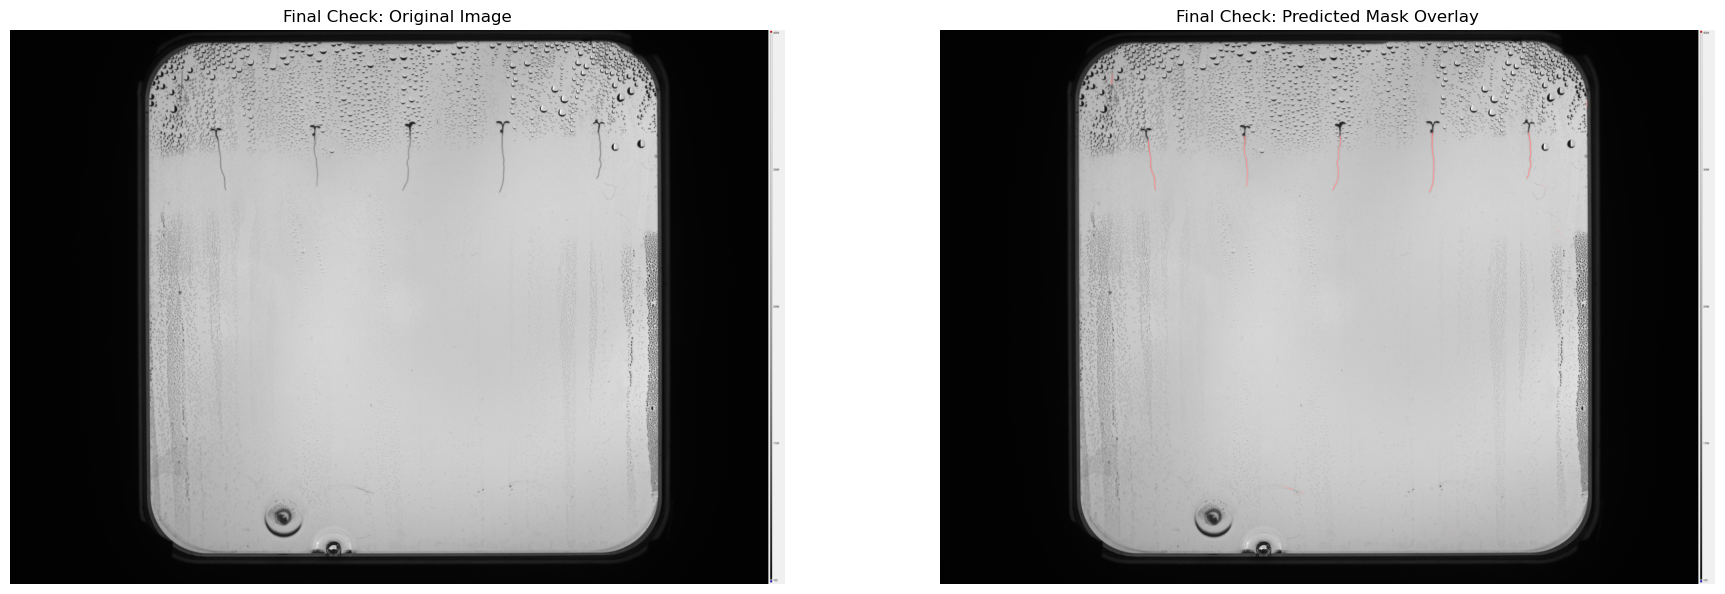


--- Processing: test_image_9.tif ---
Step 3: Model prediction complete.


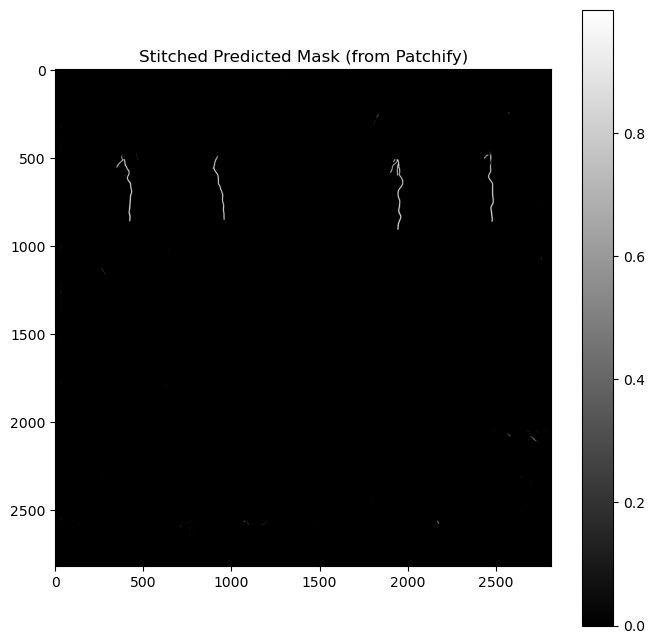

Generating final alignment overlay...


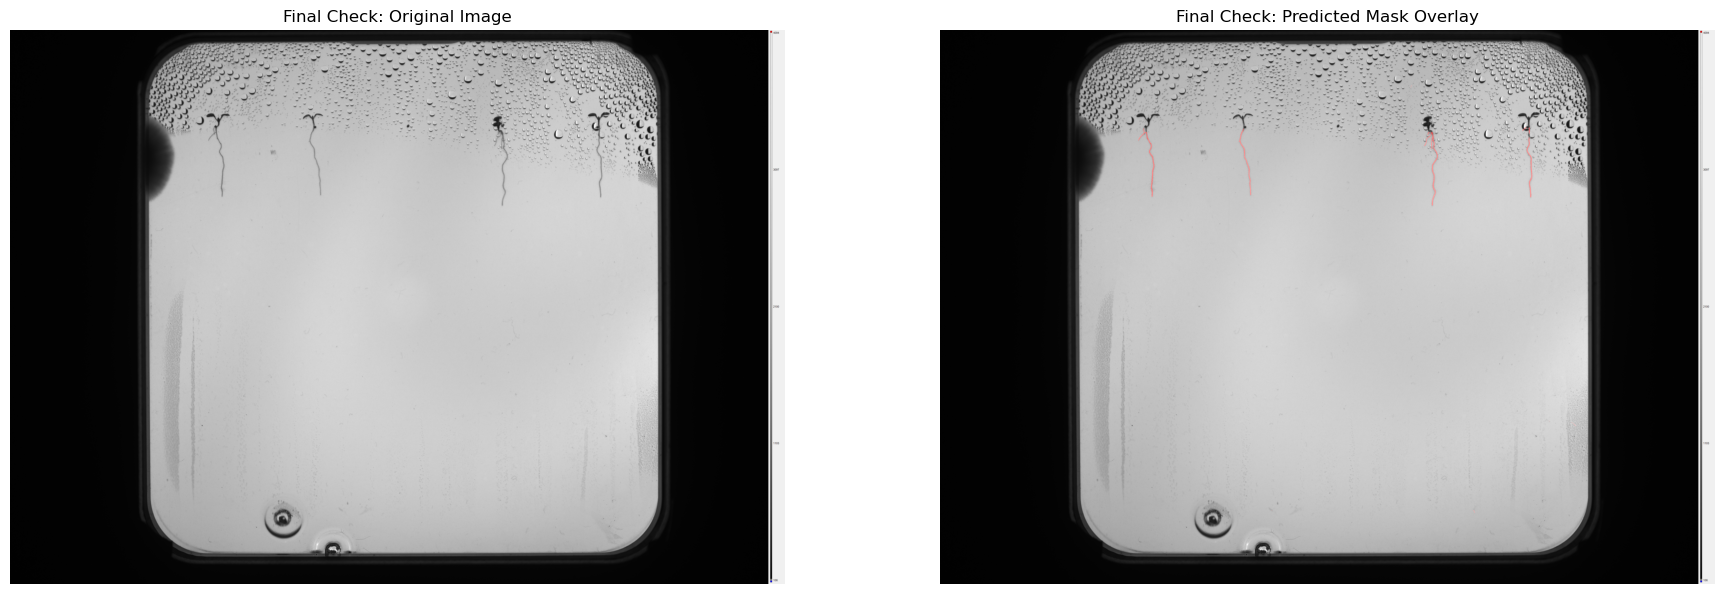

In [5]:
raw_predictions = process_and_visualize_predictions(
    r"C:\BUAS\retake\2024-25b-fai2-adsai-dariavladutu236578\datalab_tasks\task8\Kaggle", 
    model, patch_size)

# Post-processing

## Binarize masks

Here we will binarize the continuous output mask predictions based on the manually set threshold (decided upon through previous experimentation). All pixels with a value above the set threshold are considered part of the root and are set to 1. All other pixels are treated as background and set to 0,

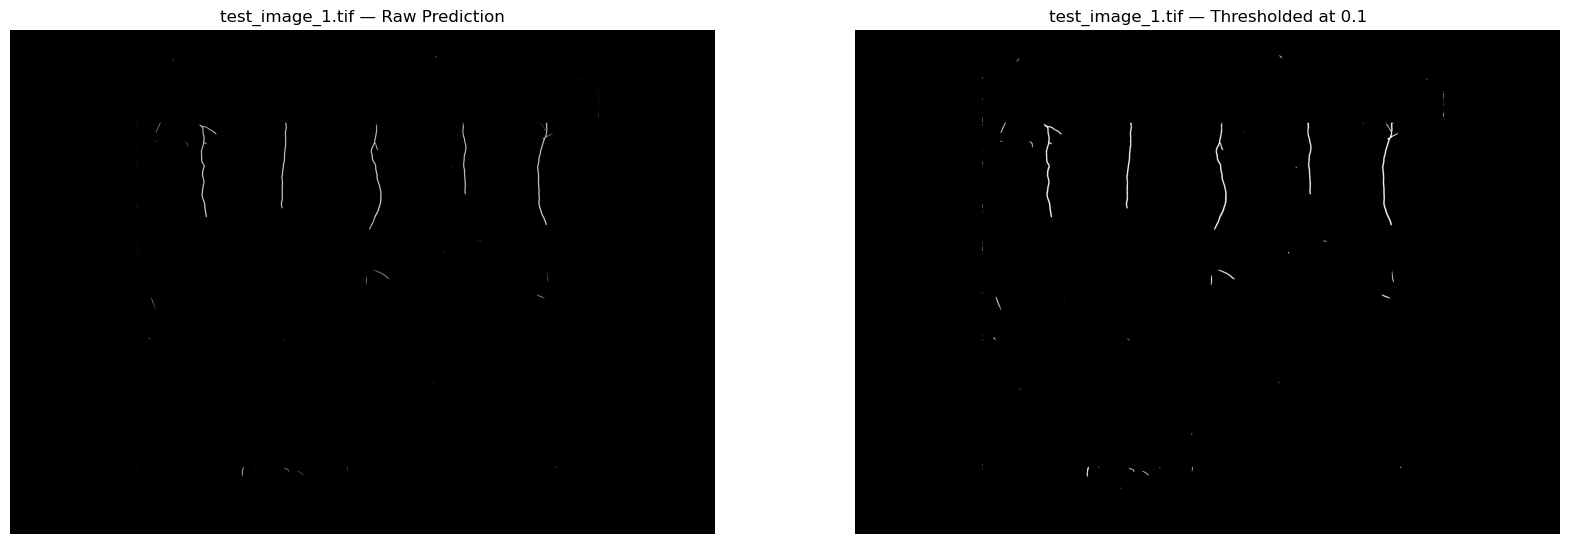

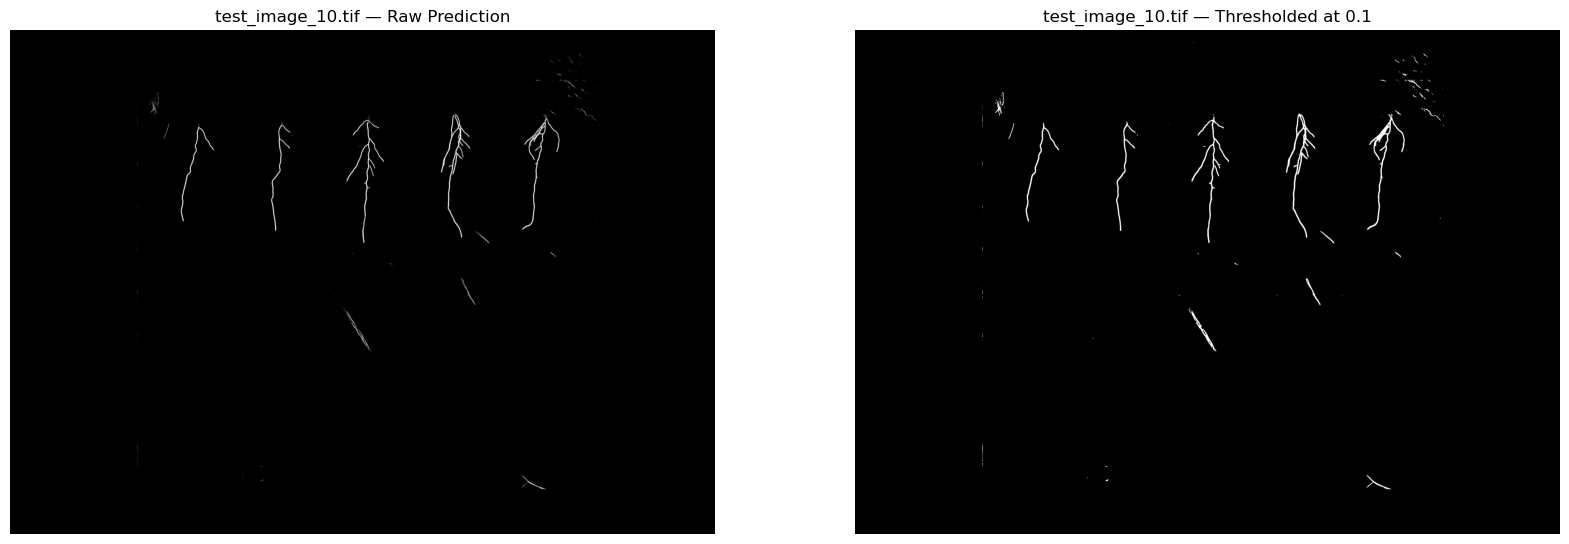

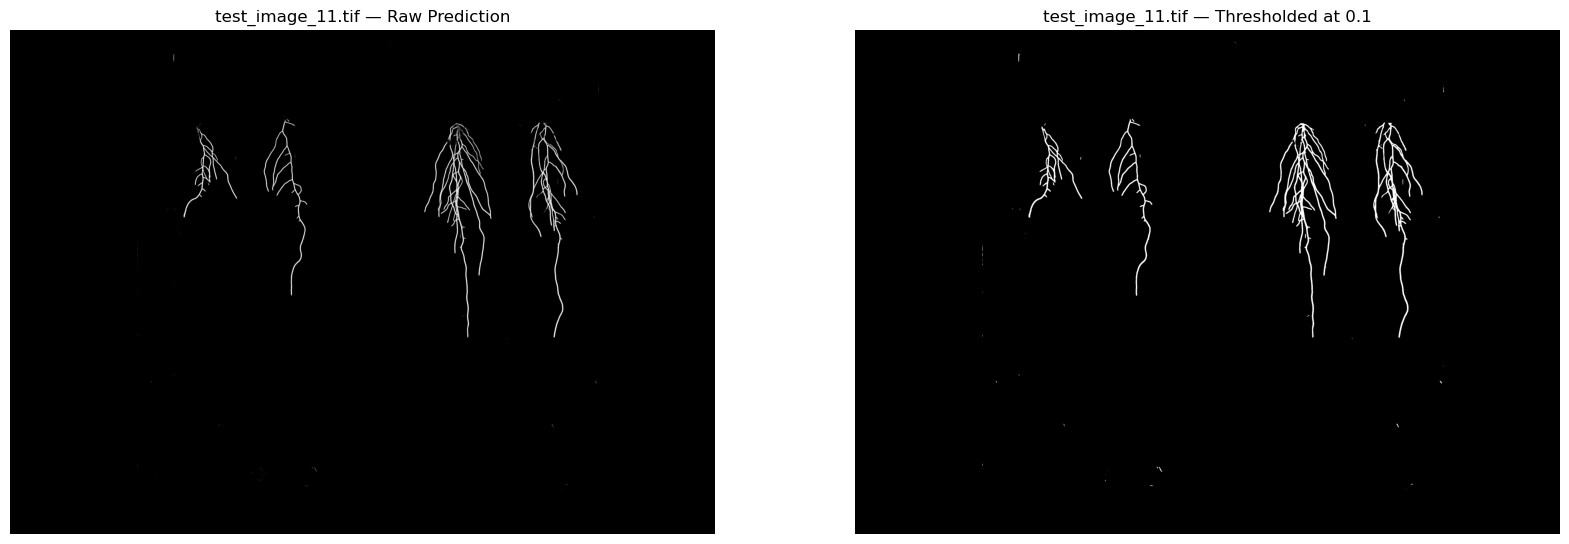

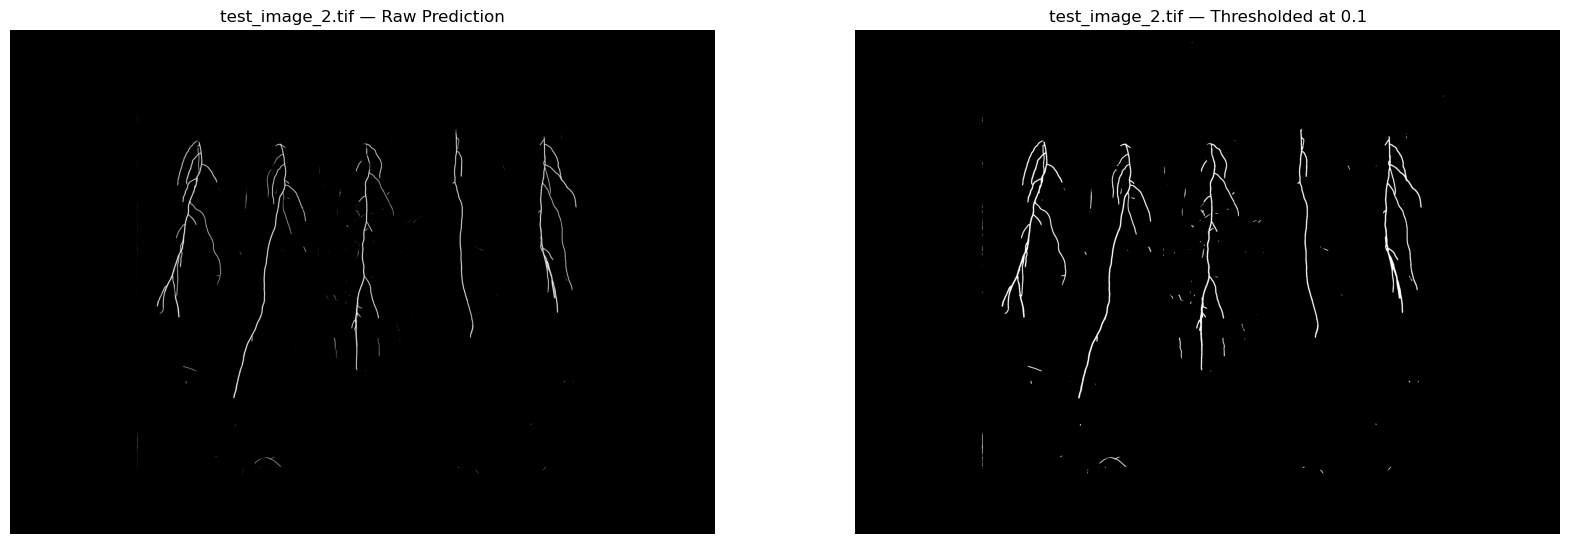

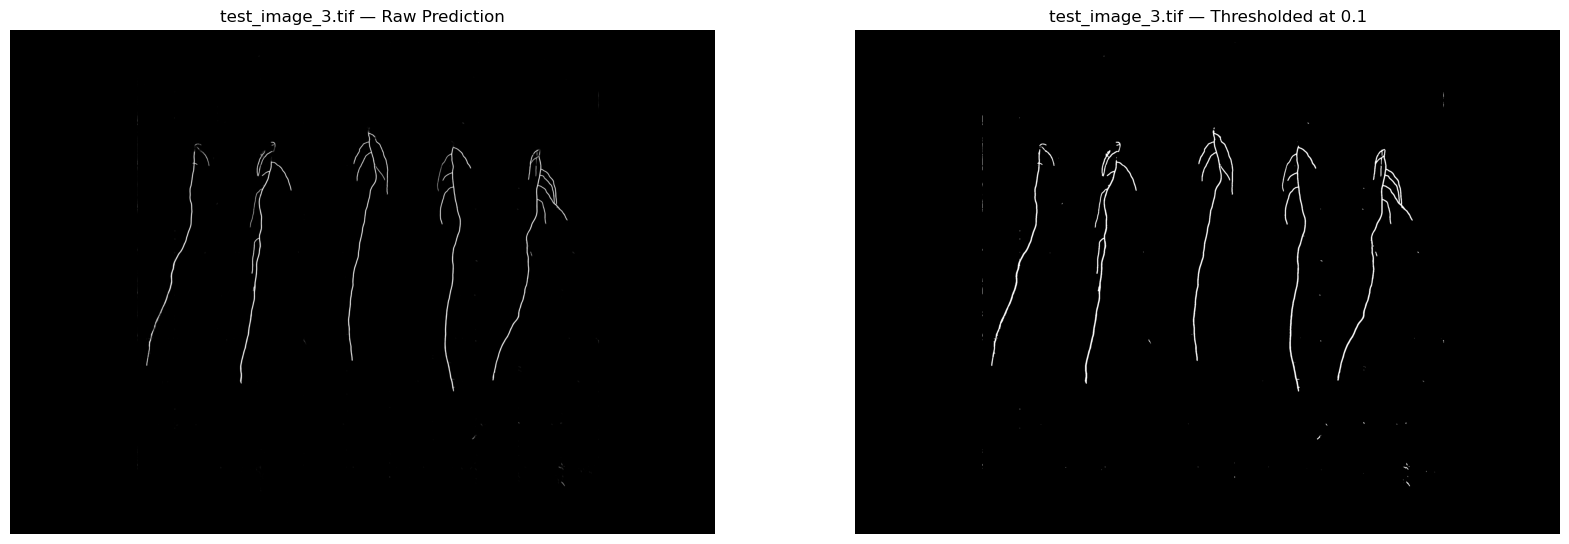

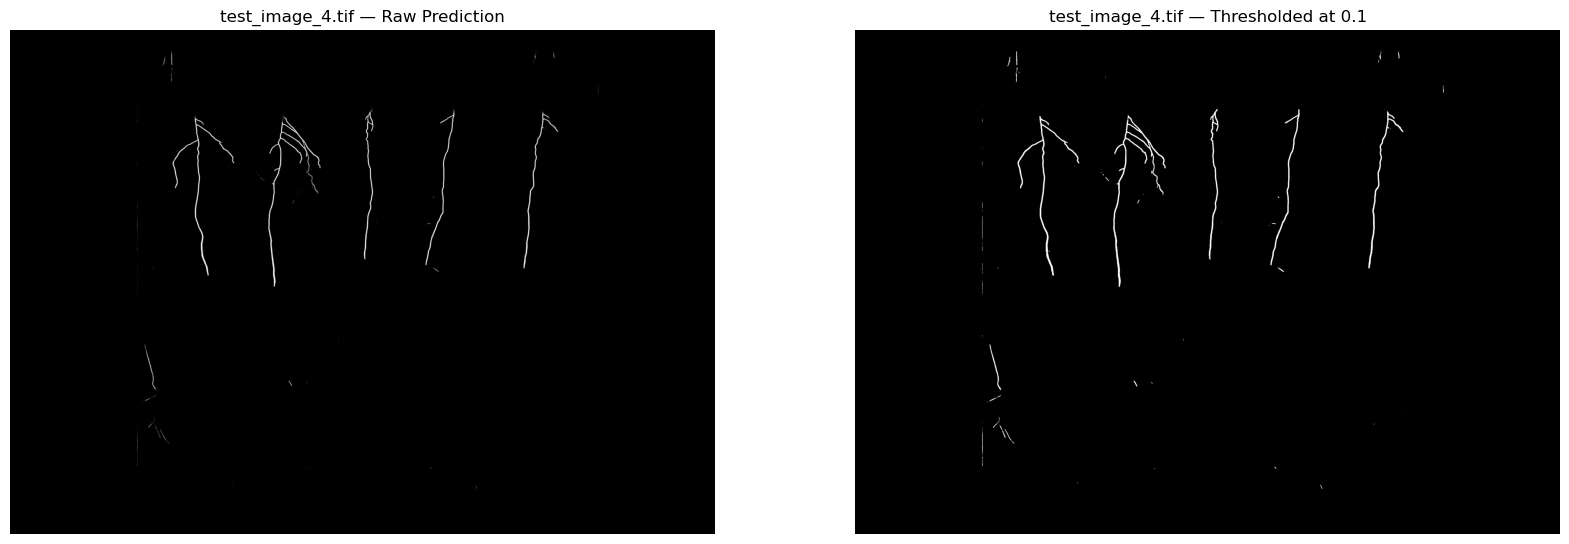

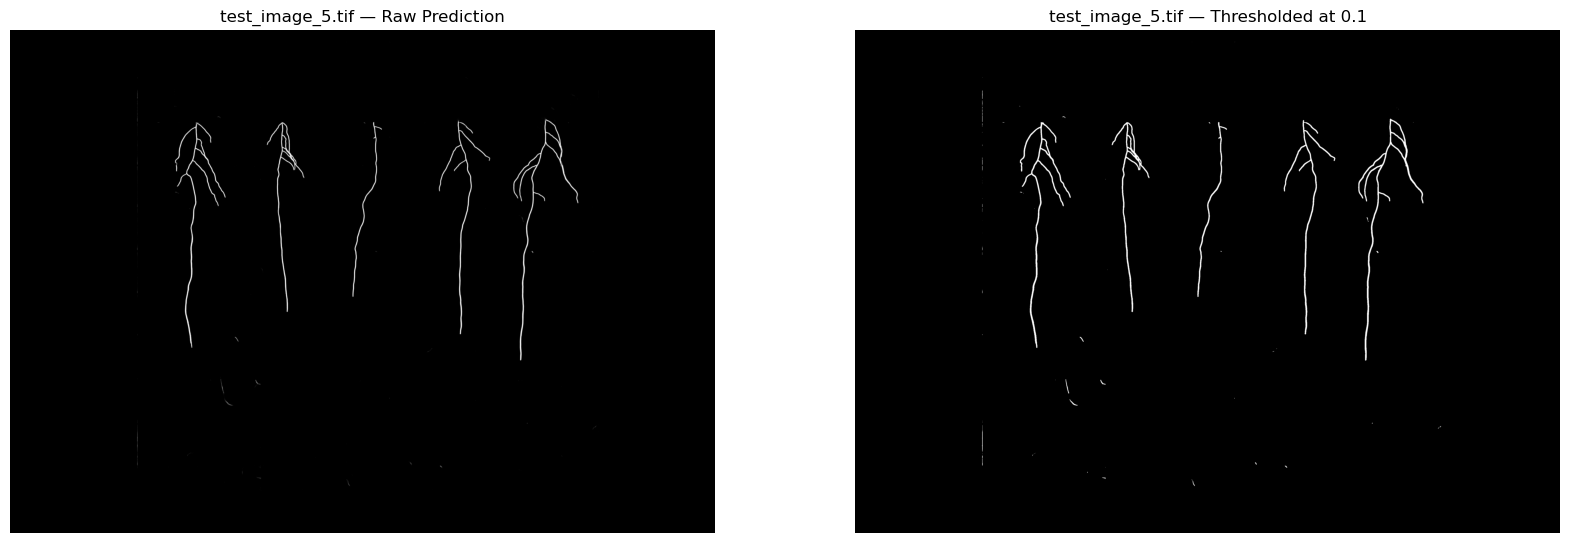

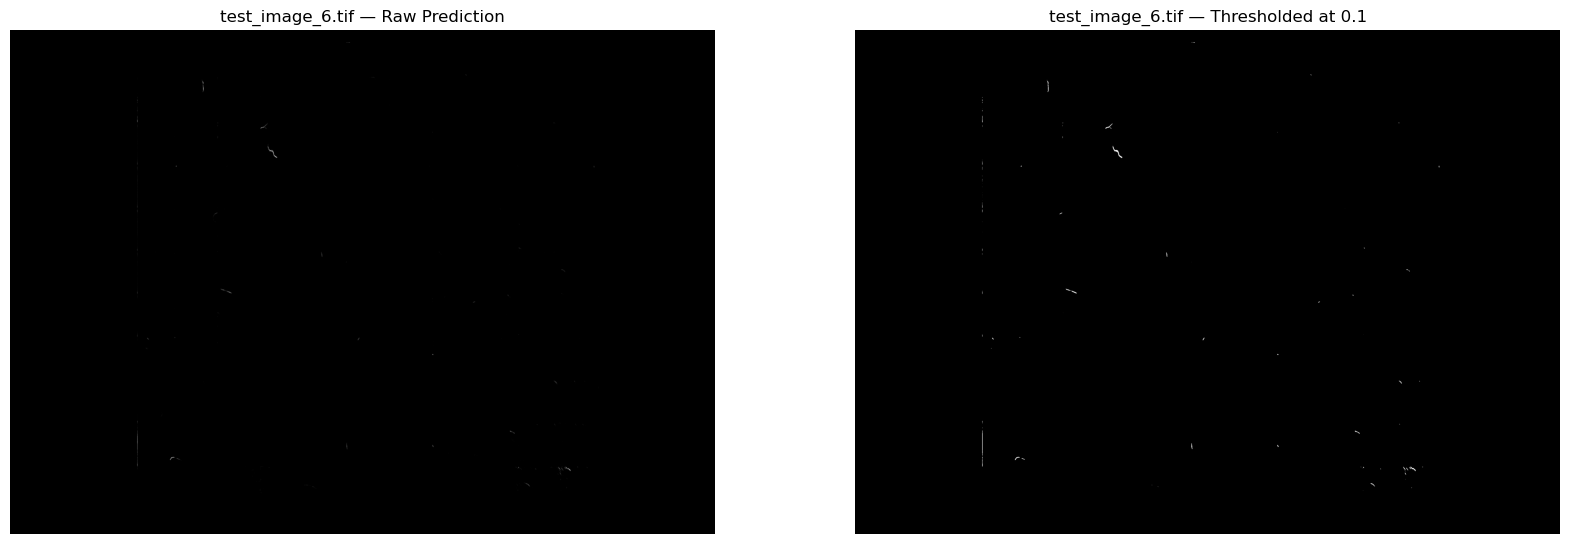

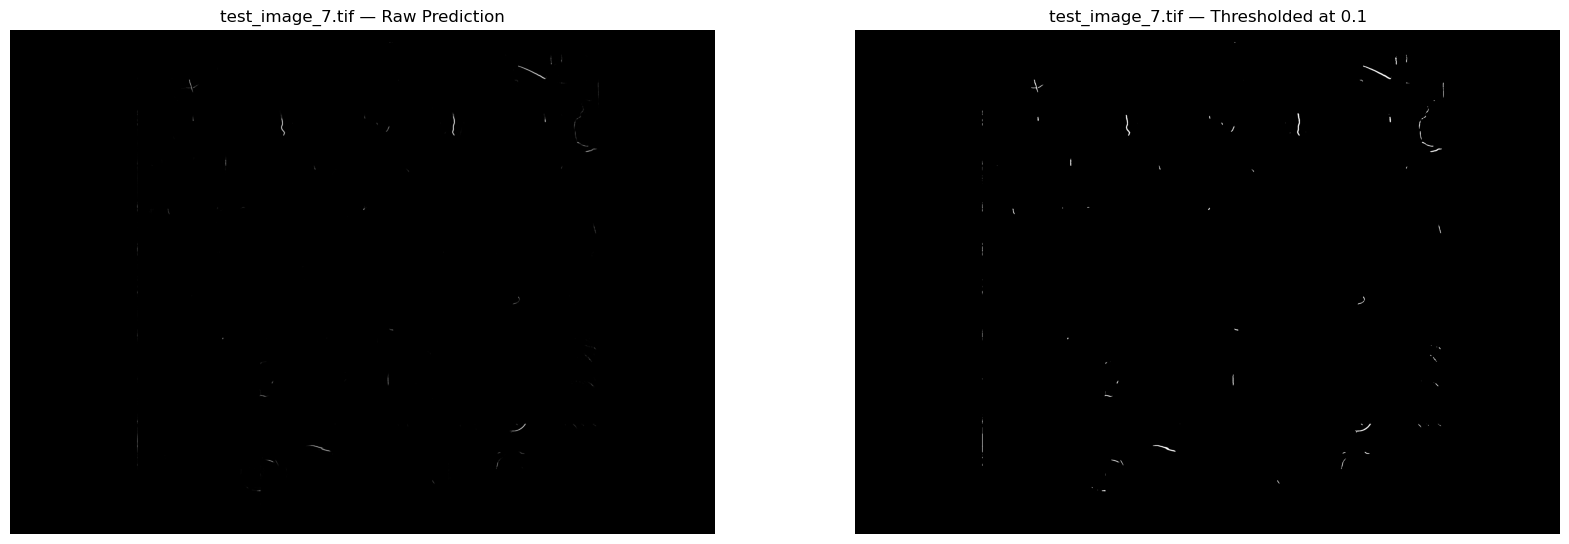

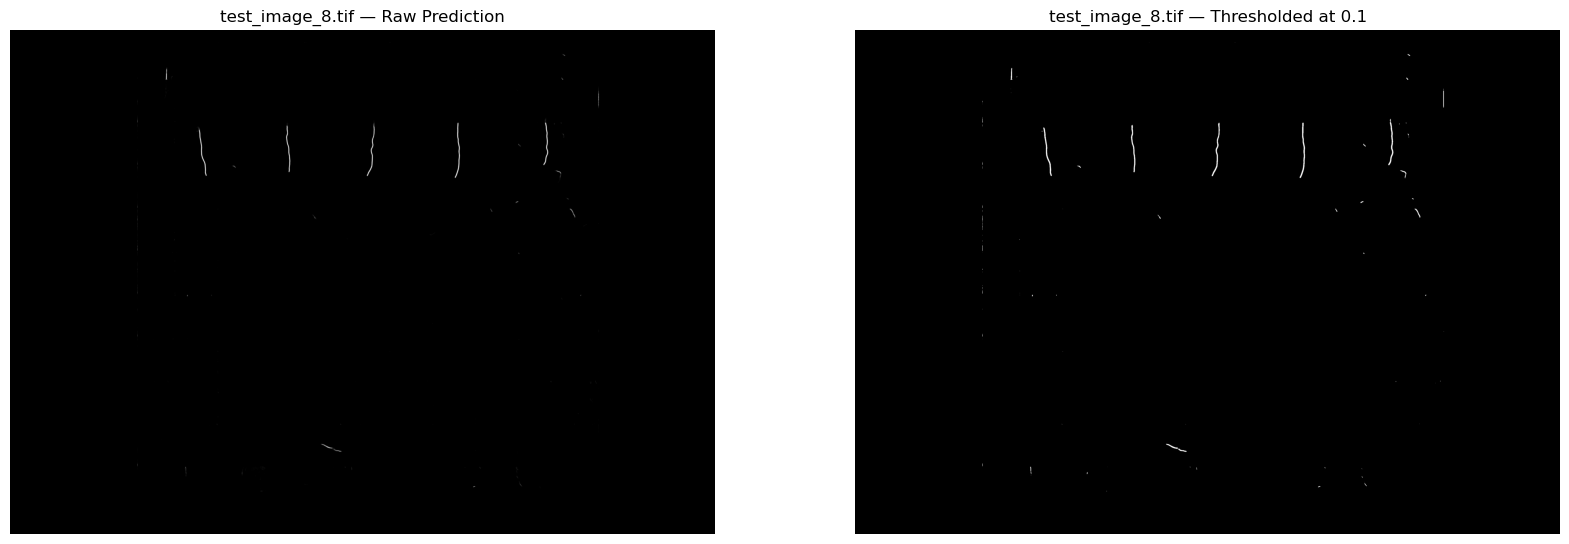

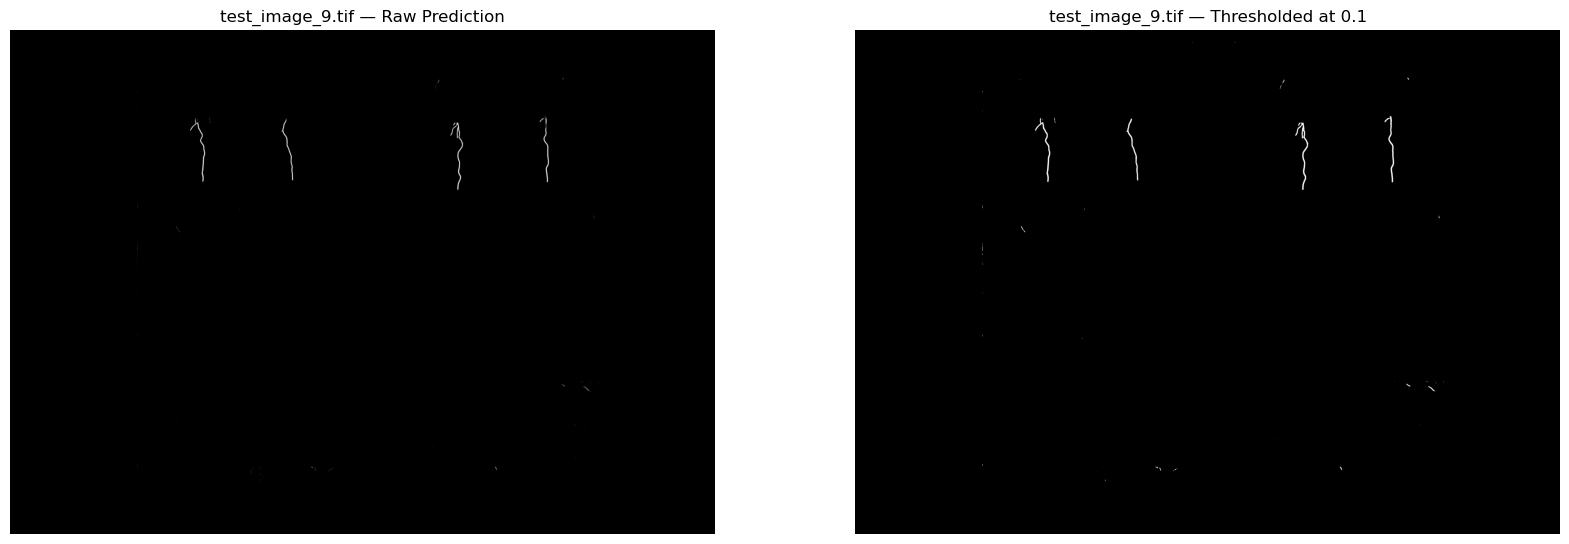

In [6]:
# Binarizing the masks with a set threshold
threshold = 0.1
thresholded_masks = {}

for name, raw in raw_predictions.items():
    # Access the actual predicted mask
    mask = raw['mask']

    # Threshold the raw mask
    binary = (mask > threshold).astype(np.uint8)
    thresholded_masks[name] = binary

    # Display side-by-side
    show_images([mask, binary * 255], [f'{name} — Raw Prediction', f'{name} — Thresholded at {threshold}'])


## Refine binary masks

After thresholding, we can see a lot of "salt-and-pepper" noise, which is common after thresholding model predictions. To address this, I tried applying *morphological opening* (erosion + dilation) using an elliptical kernel, which eliminates small white pixels by eroding them to nothing and then restores the main root structure to its original size. However, results were barely improved. Therefore I decided to adopt a different approach, where I simply filtered the tiniest objects and removed them. The logic is simple: the tiny specks of noise are made of very few pixels, while the actual roots are made of many. We can automatically remove anything that's too small to be a root.

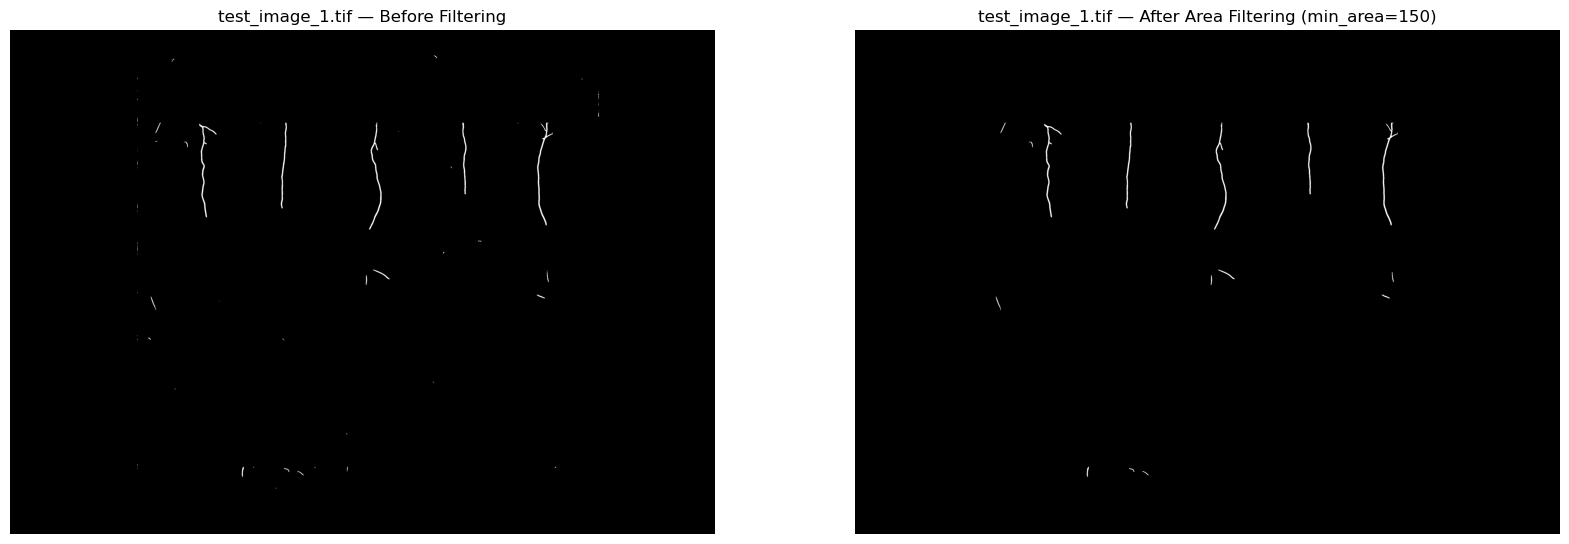

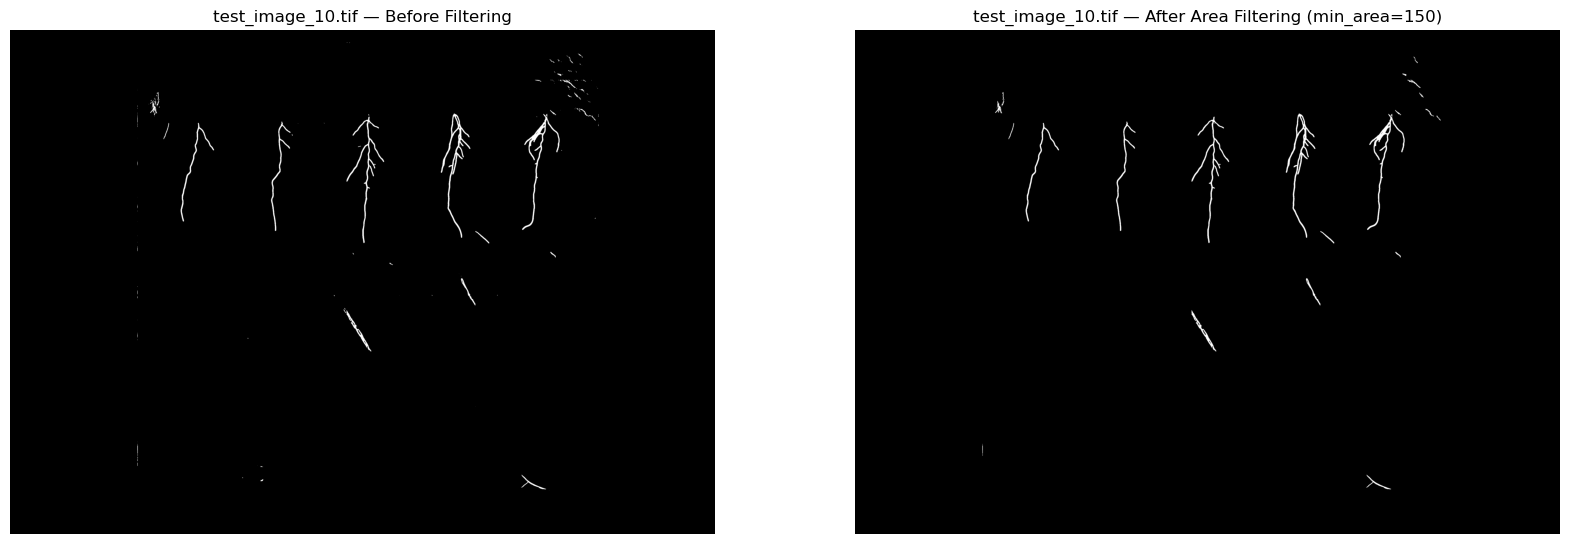

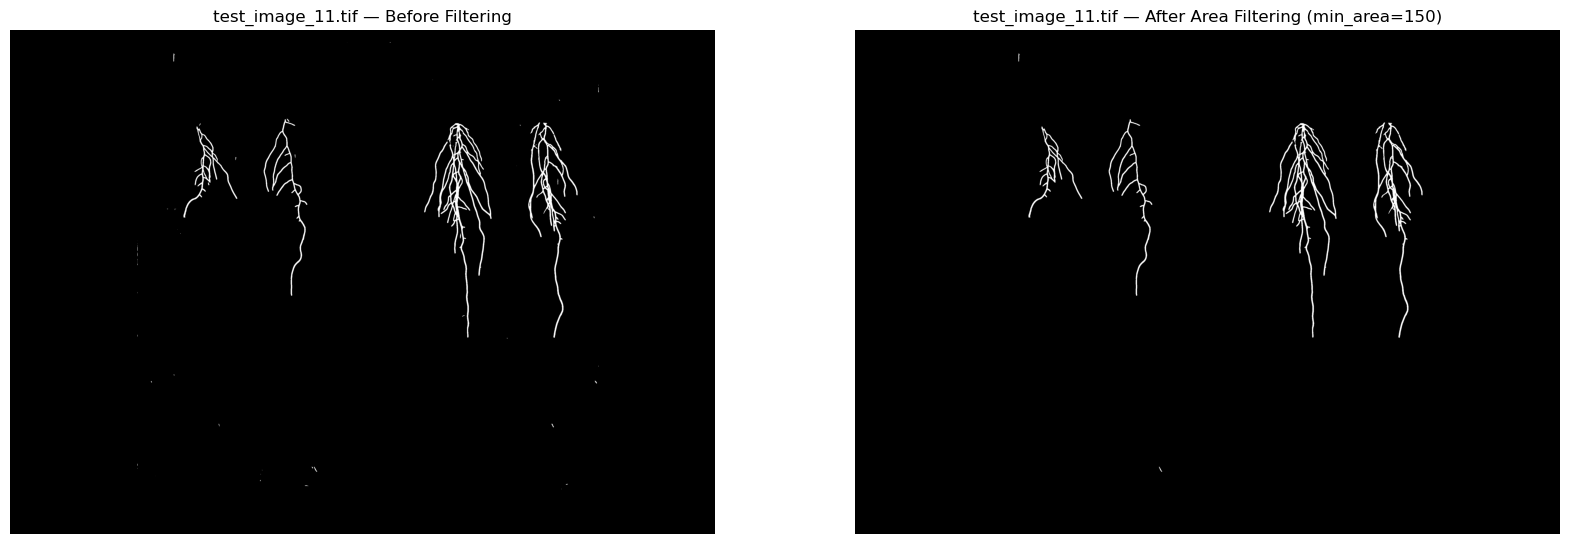

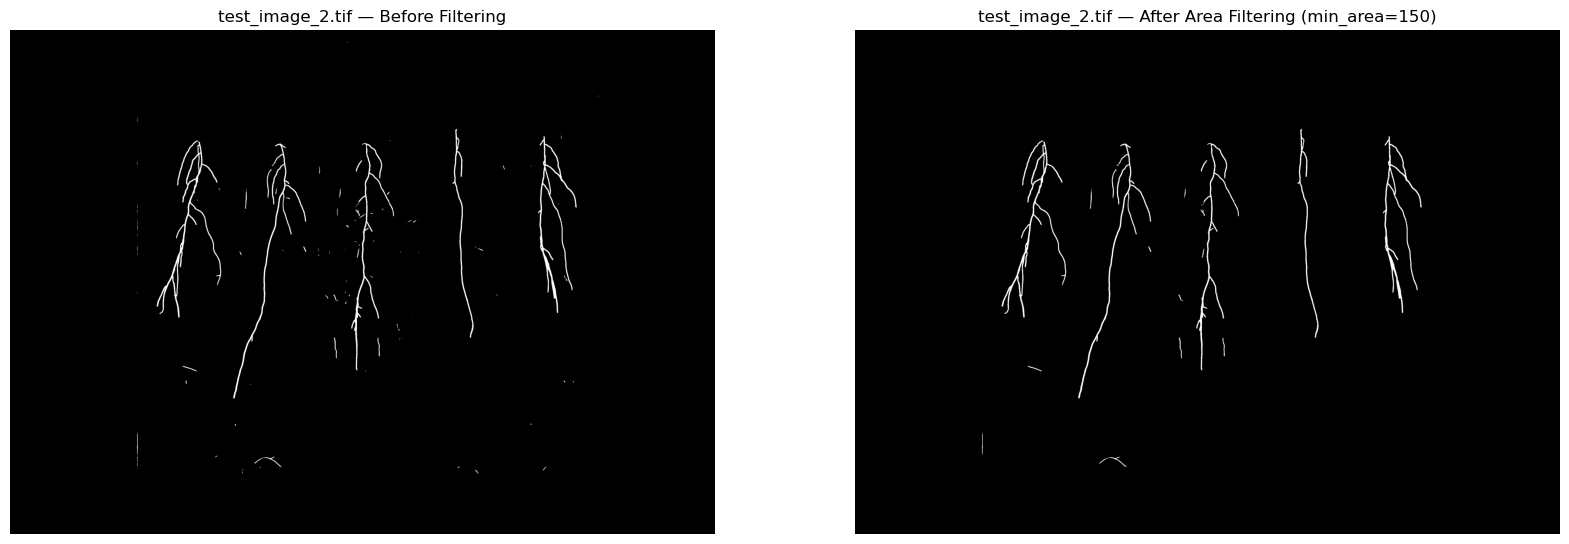

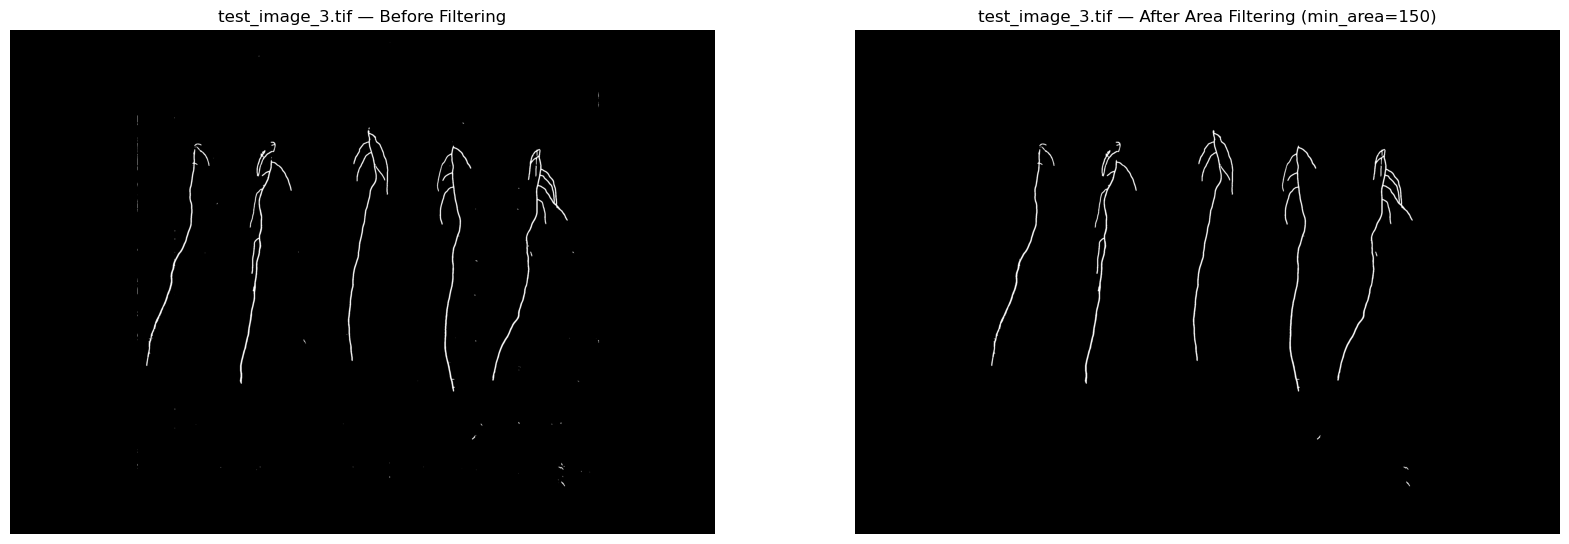

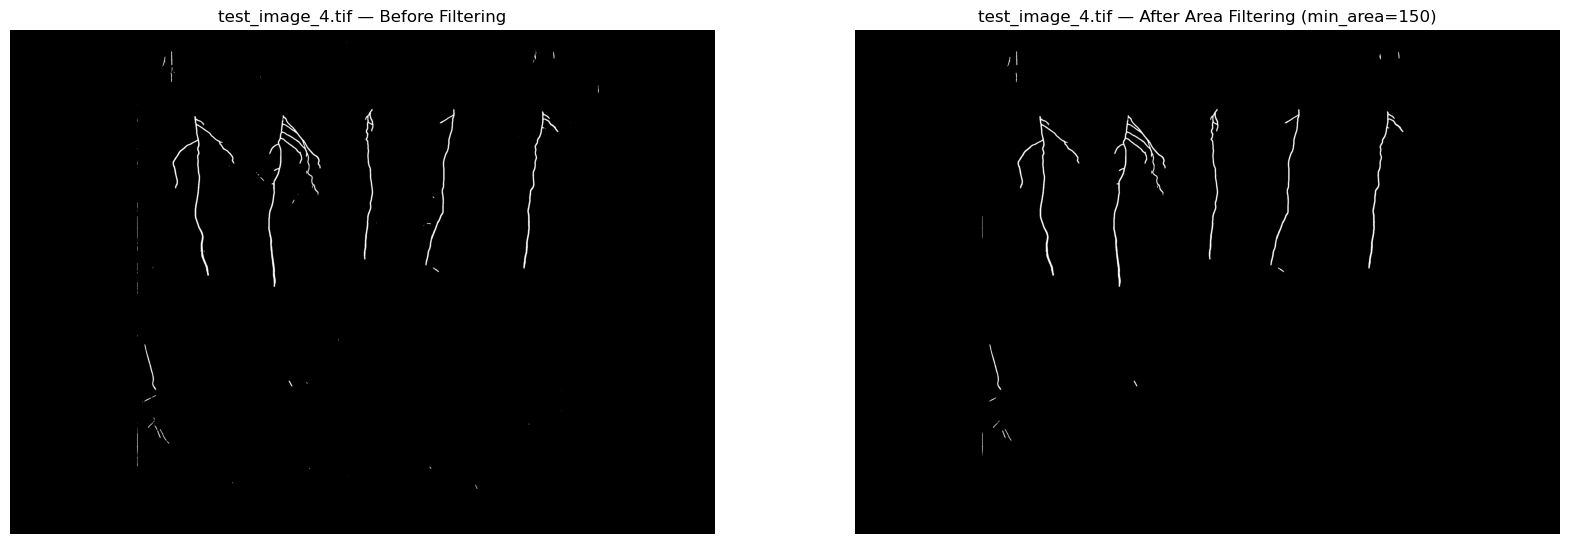

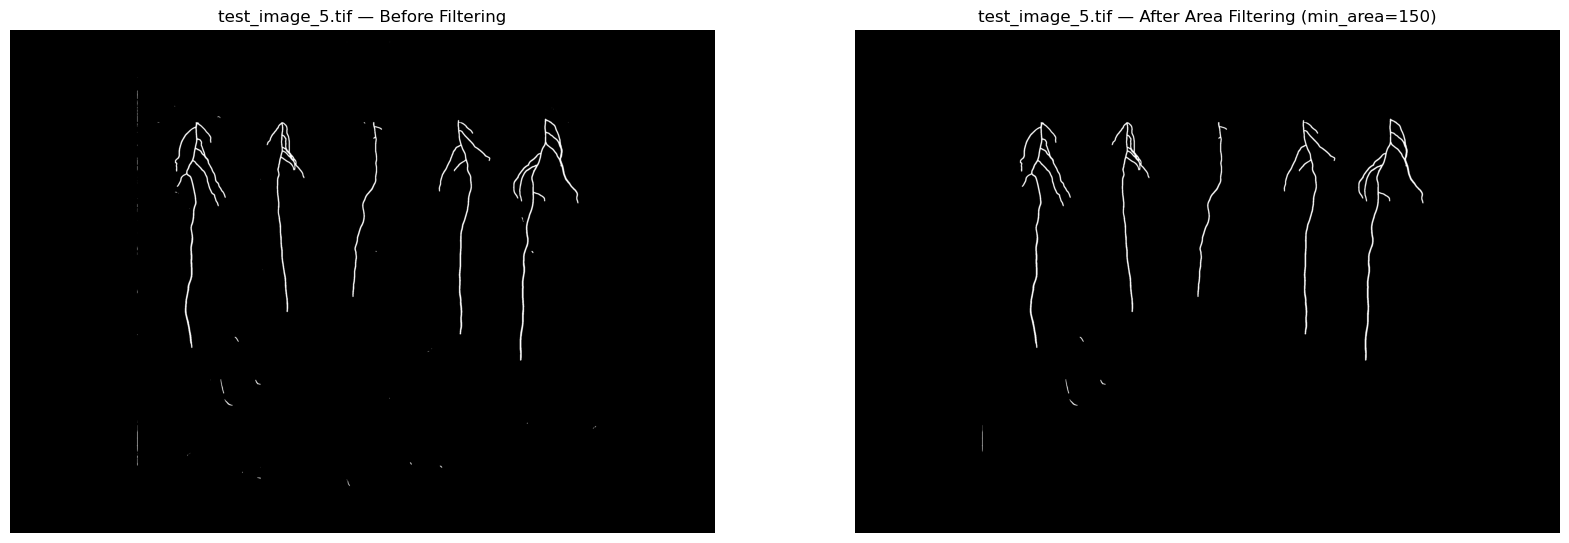

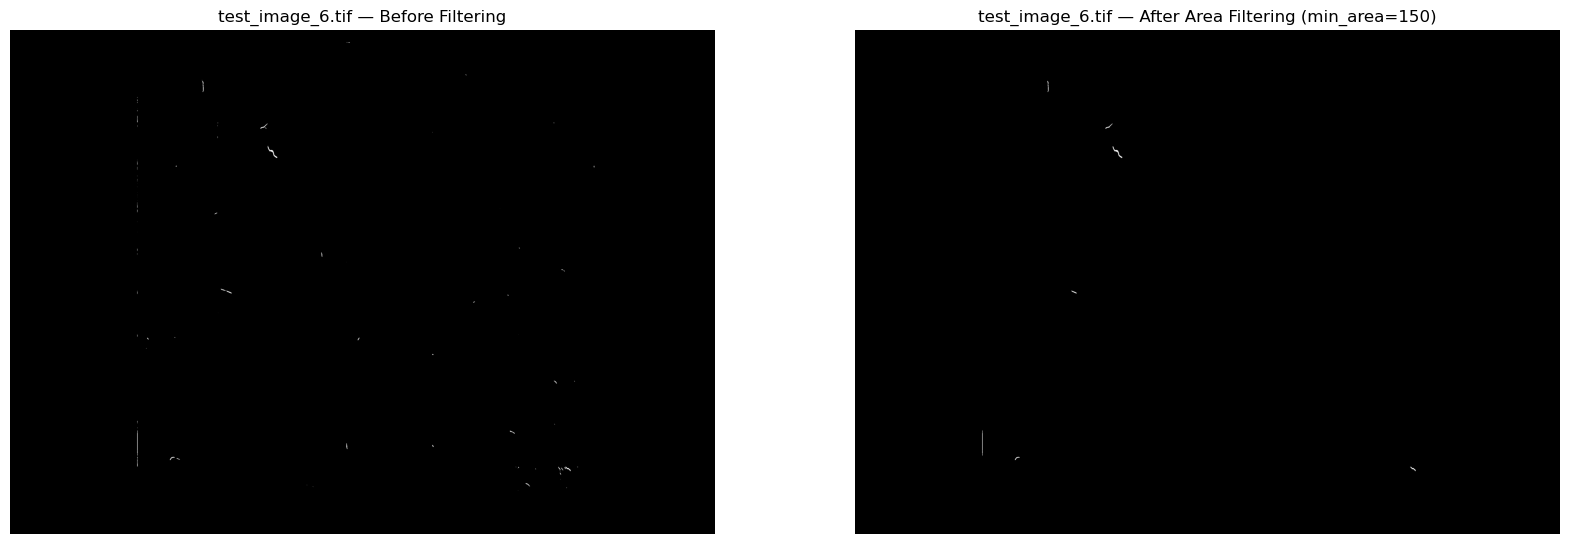

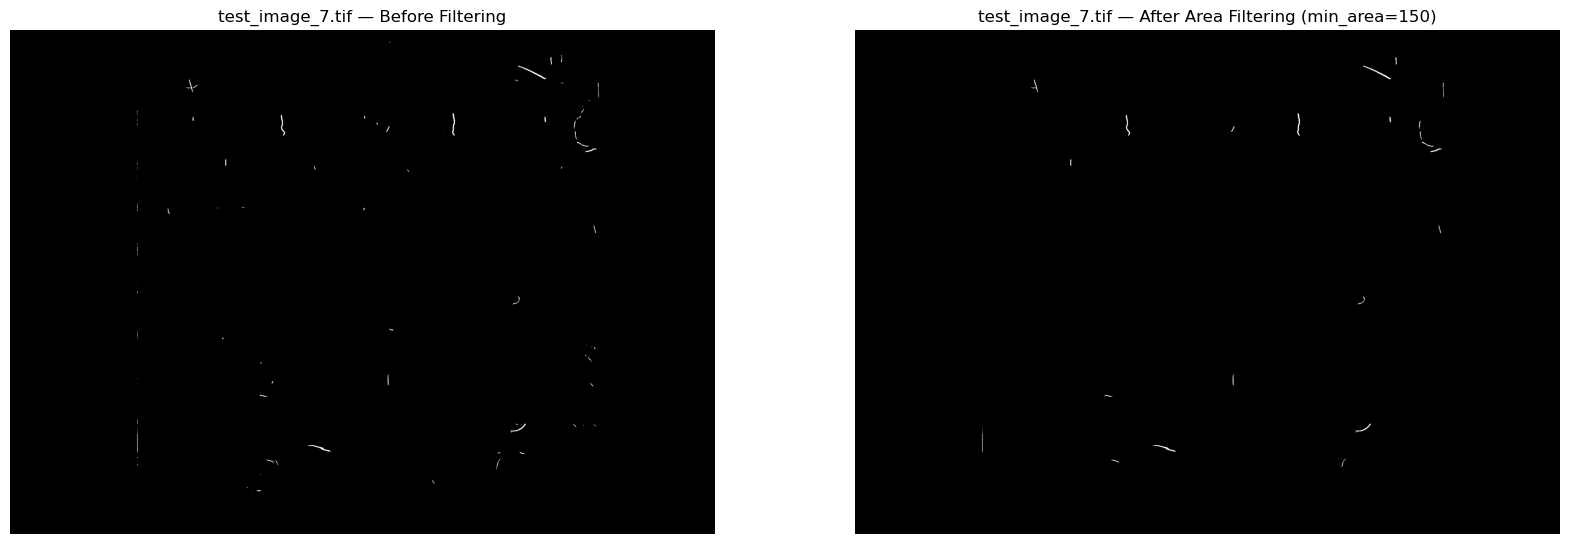

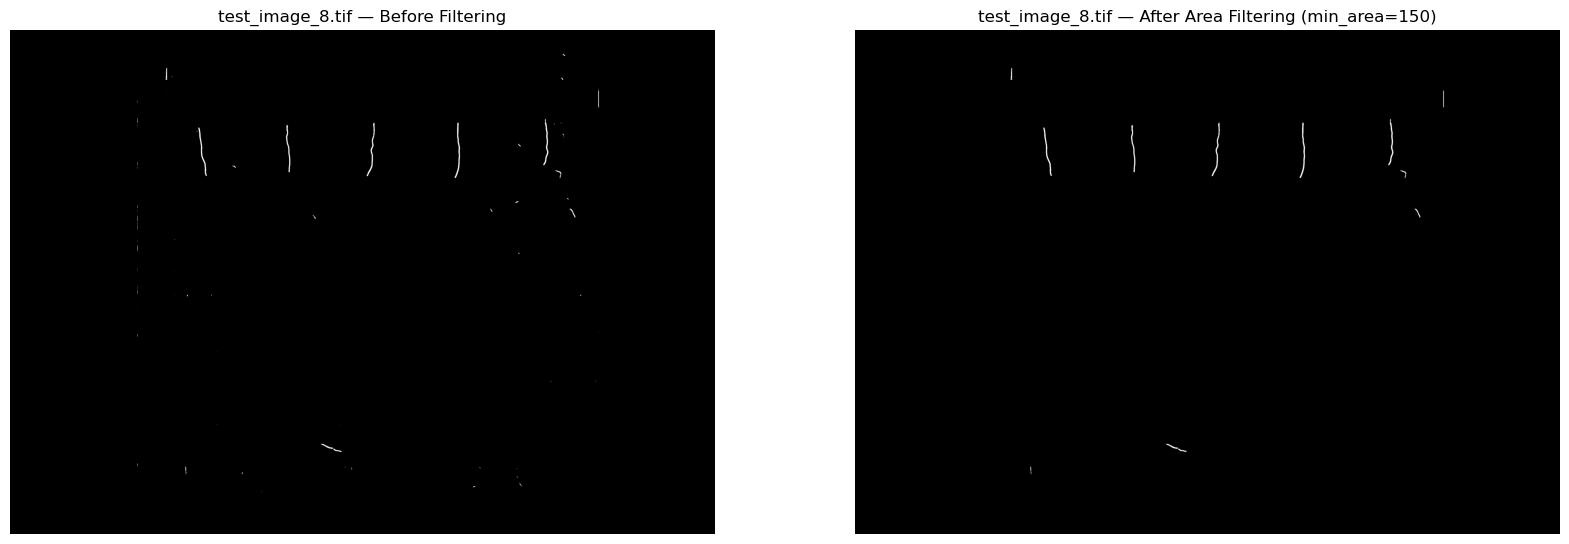

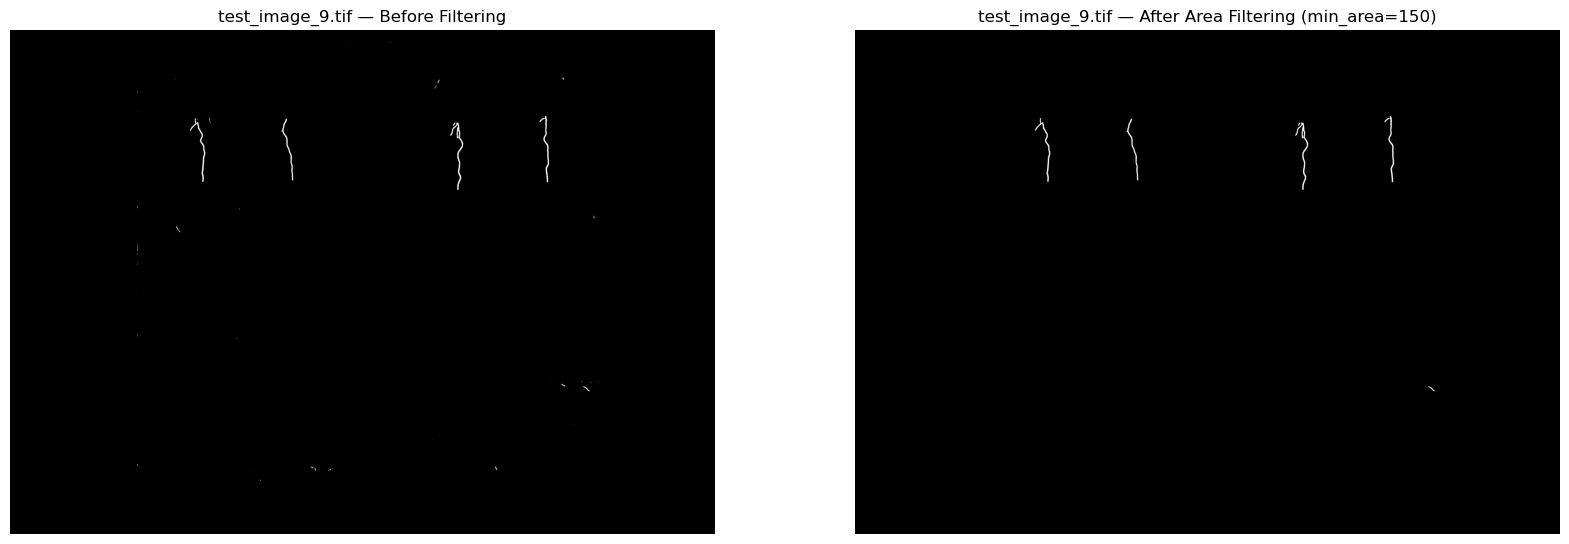

In [7]:
area_filtered_masks = {}
MIN_PIXEL_AREA = 150 

for name, binary in thresholded_masks.items():
    # Apply the new area filtering function
    filtered = filter_by_area(binary, min_area=MIN_PIXEL_AREA)
    area_filtered_masks[name] = filtered

    # Display side-by-side to see the effect
    show_images(
        [binary * 255, filtered], 
        [f'{name} — Before Filtering', f'{name} — After Area Filtering (min_area={MIN_PIXEL_AREA})']
    )

## Further cropping

To retain as much root data, we will crop the predictions to petri dish sizes and then further take 10% off the top, as it usually either does not contain any data or it is just further noise that will hinder the root segmentation quality. Initially, I wanted to crop the masks based on the `cropper` function, but the resulting images had white margins that would get mistaken for the first plant root. Therefore, I adopted a simple

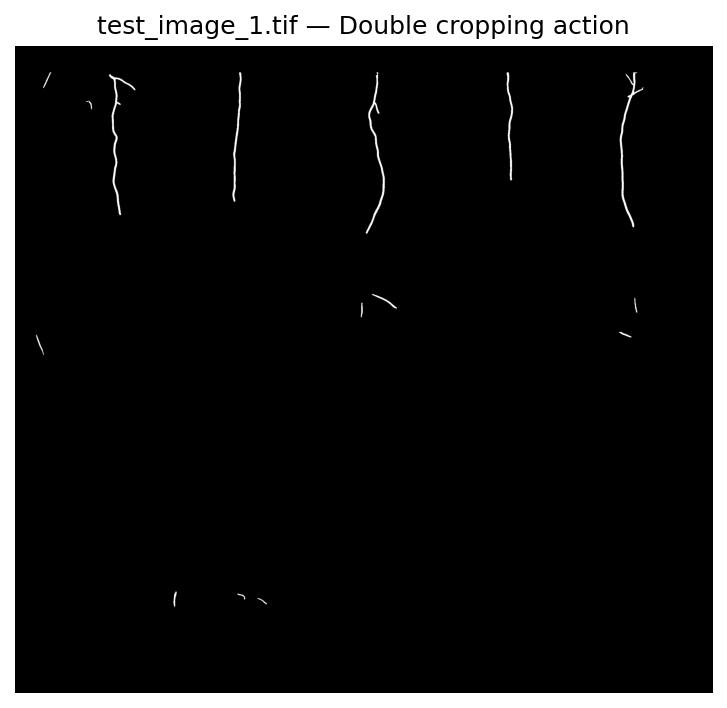

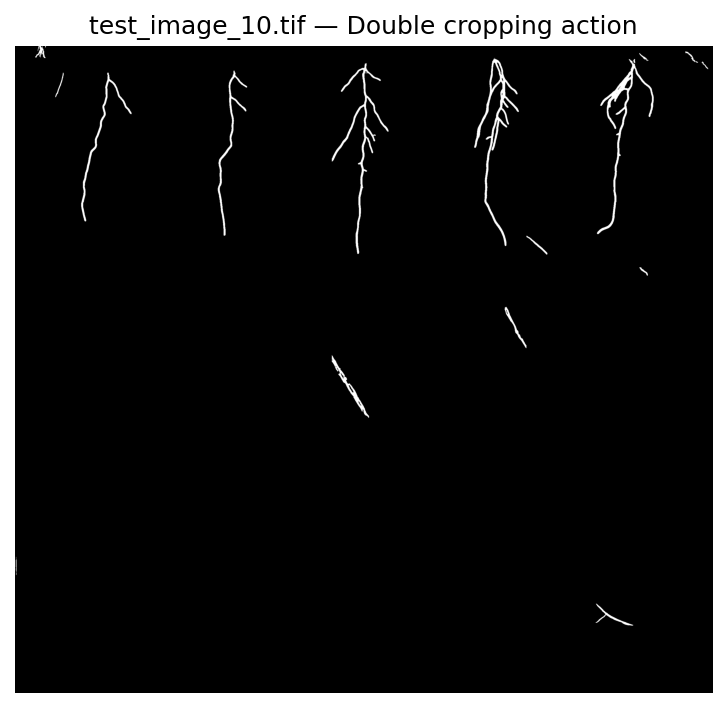

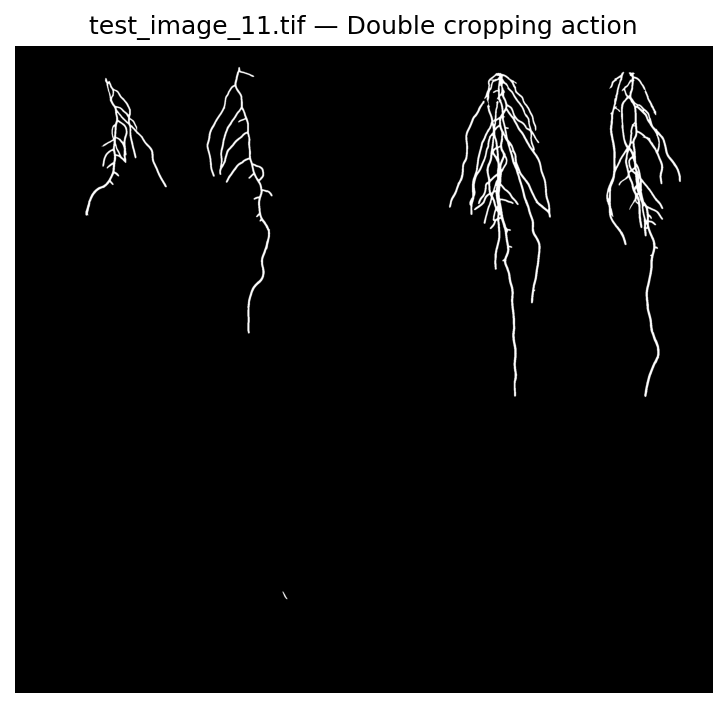

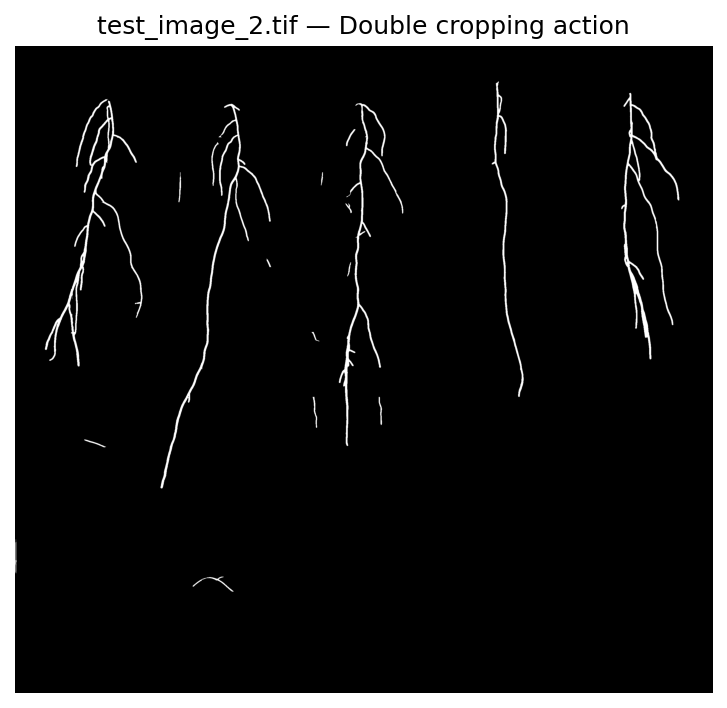

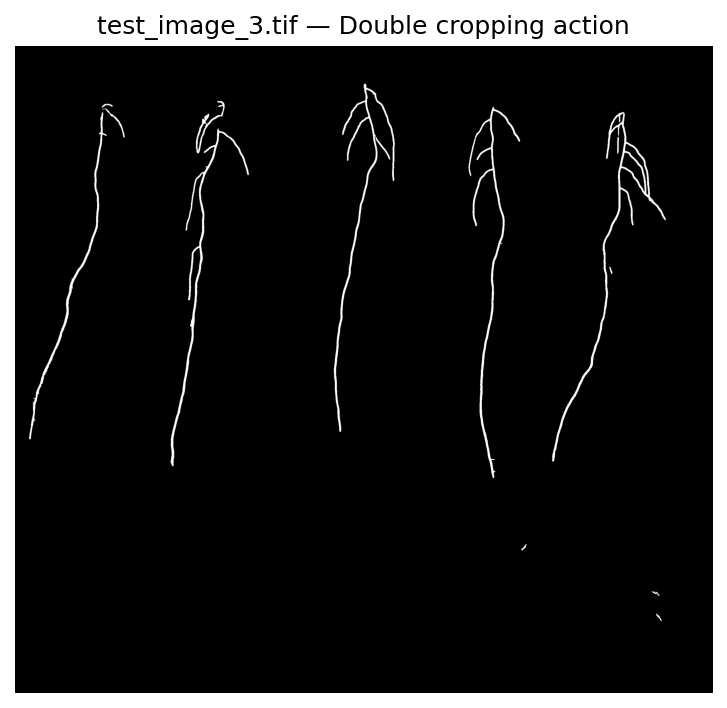

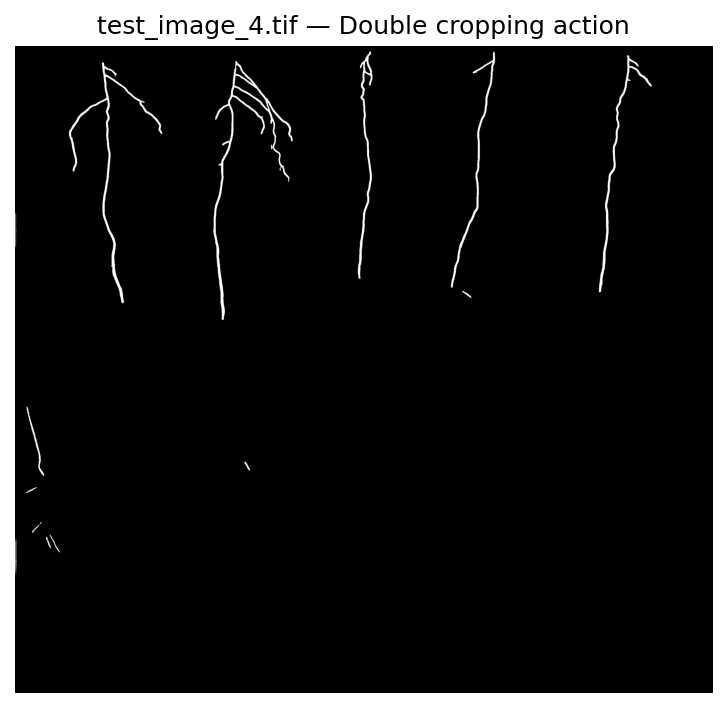

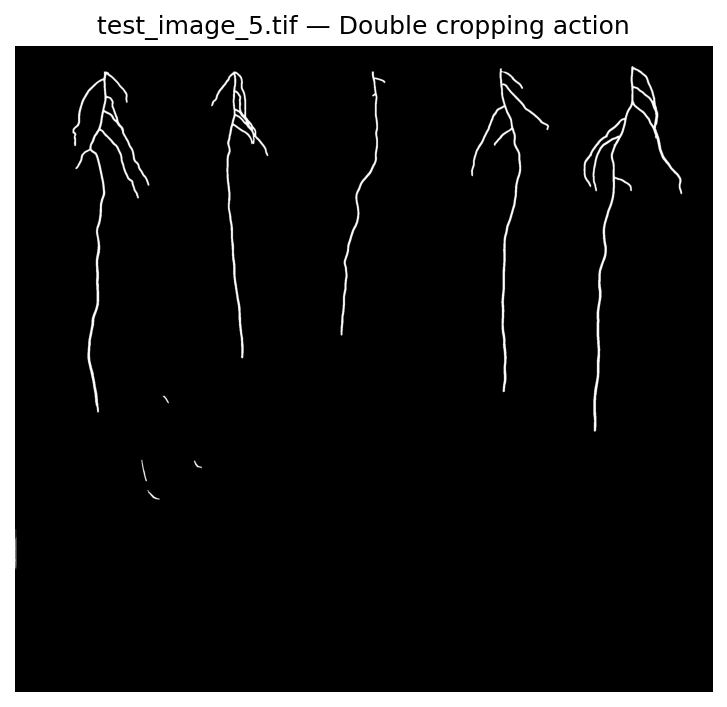

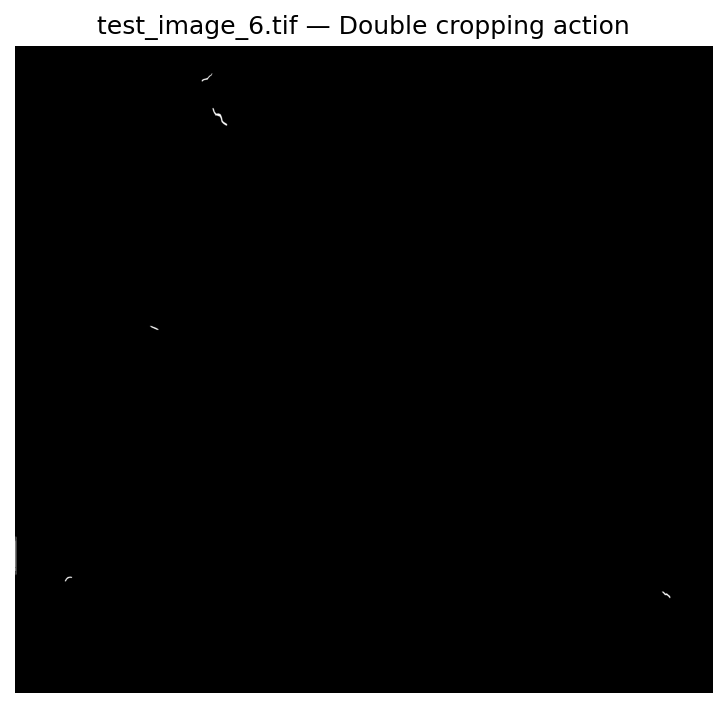

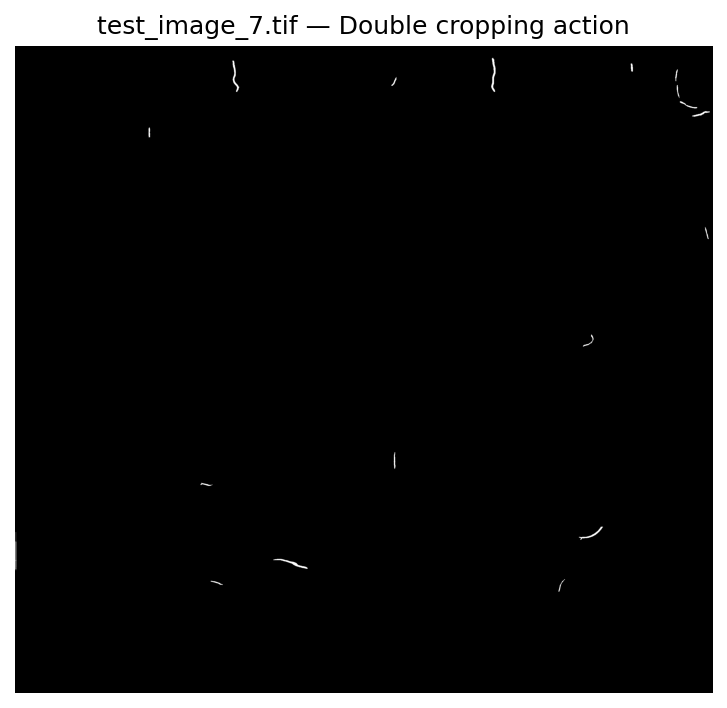

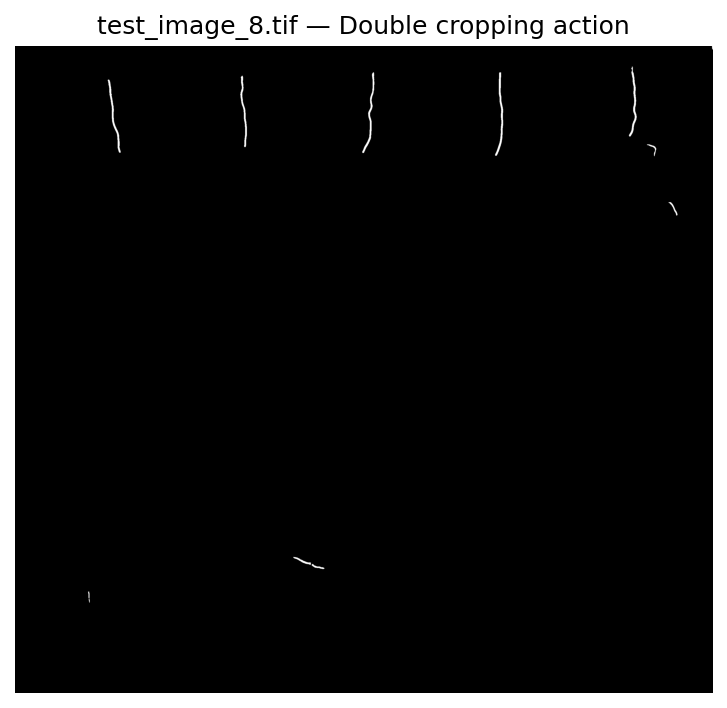

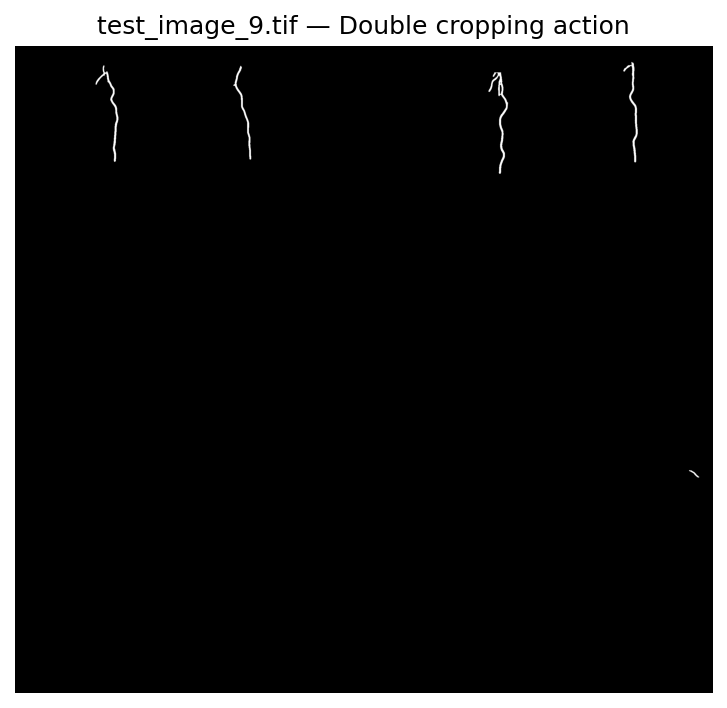

In [8]:
# Crop crop!!
cropped_masks = {}
top_crop_ratio = 0.15

# Getting the petri dish dimensions from one image as they are all the same
image_path = "C:\\BUAS\\retake\\2024-25b-fai2-adsai-dariavladutu236578\\datalab_tasks\\task8\\Kaggle\\test_image_4.tif"
image = cv2.imread(image_path, 0)
petri_dish, crop_info = cropper(image)

for name, closed in area_filtered_masks.items():
    # Get crop_info from earlier step
    # Dish bounds
    x_start = crop_info['x_start']
    crop_size = crop_info['crop_size']
    x_end = min(x_start + crop_size, closed.shape[1])

    # Crop to match Petri dish width
    horizontally_cropped = closed[:, x_start:x_end]

    # Crop top x% to avoid noise above seed region
    h = horizontally_cropped.shape[0]
    top_crop = int(h * top_crop_ratio)
    final_cropped = horizontally_cropped[top_crop:, :]

    # Save result
    cropped_masks[name] = final_cropped

    # Visualize result
    plt.figure(figsize=(6, 6), dpi=150)
    plt.imshow(final_cropped * 255, cmap='gray')
    plt.title(f'{name} — Double cropping action')
    plt.axis('off')
    plt.show()

## Plant segmentation
Now we will segment each root region by finding all potential roots using `cv2.connectedComponentsWithStats`, applying heuristic filters based on what a "real" root looks like, such as:
- `aspect_ratio_threshold`: Keeps only objects that are tall and skinny, which is characteristic of primary roots. This is great for filtering out non-root blobs.
- `vertical_start_thresh_ratio`: Ensures that it only considers objects starting near the top of the image, where the seeds would be planted.

Then we divide the image into vertical bands. For each component that passes the filters, it calculates which vertical band the object's center (cx) falls into. It then adds that component to the final mask for that specific plant.


--- Segmenting Plants for: test_image_1.tif ---


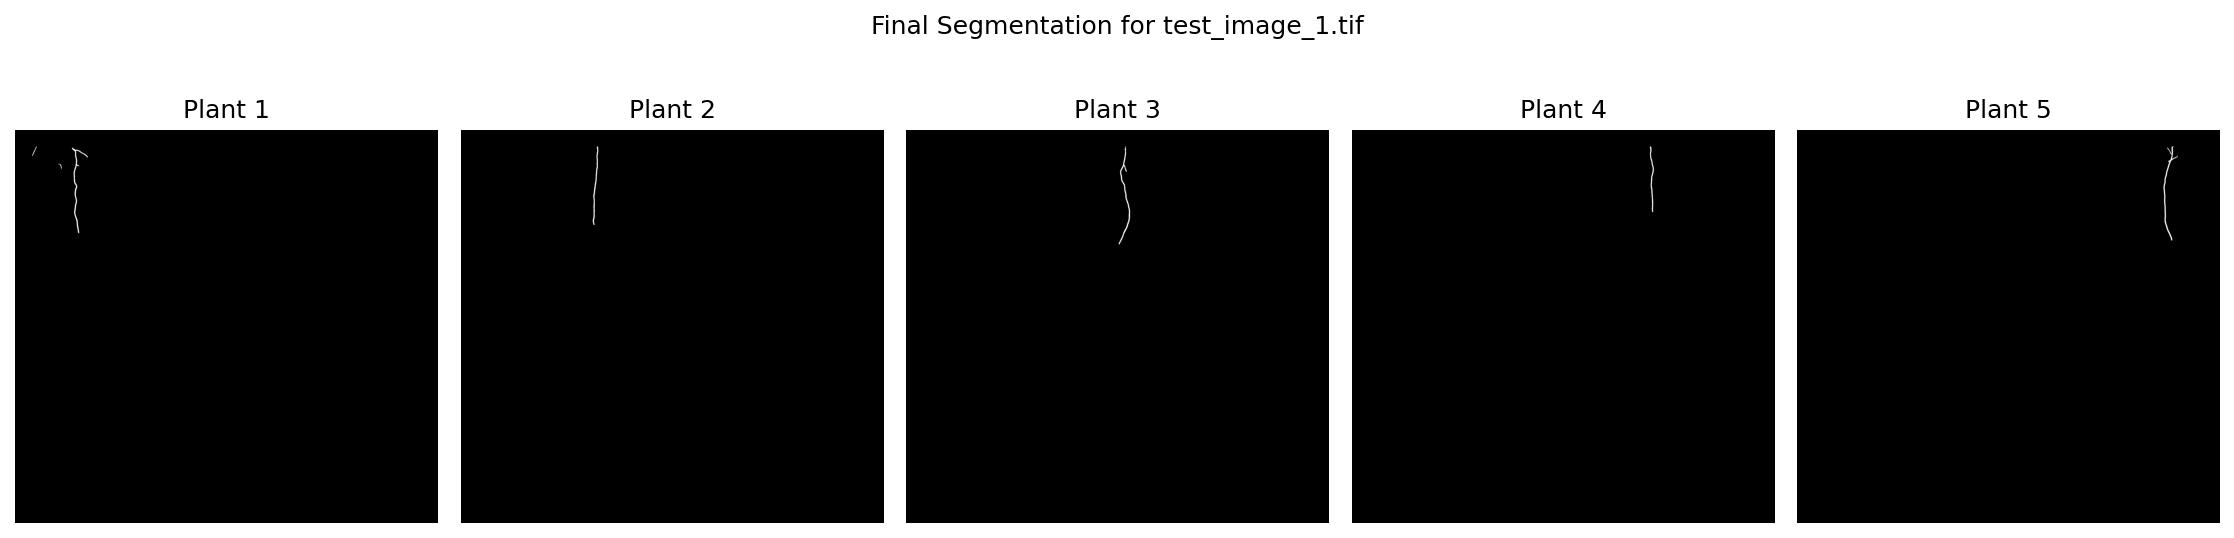


--- Segmenting Plants for: test_image_10.tif ---


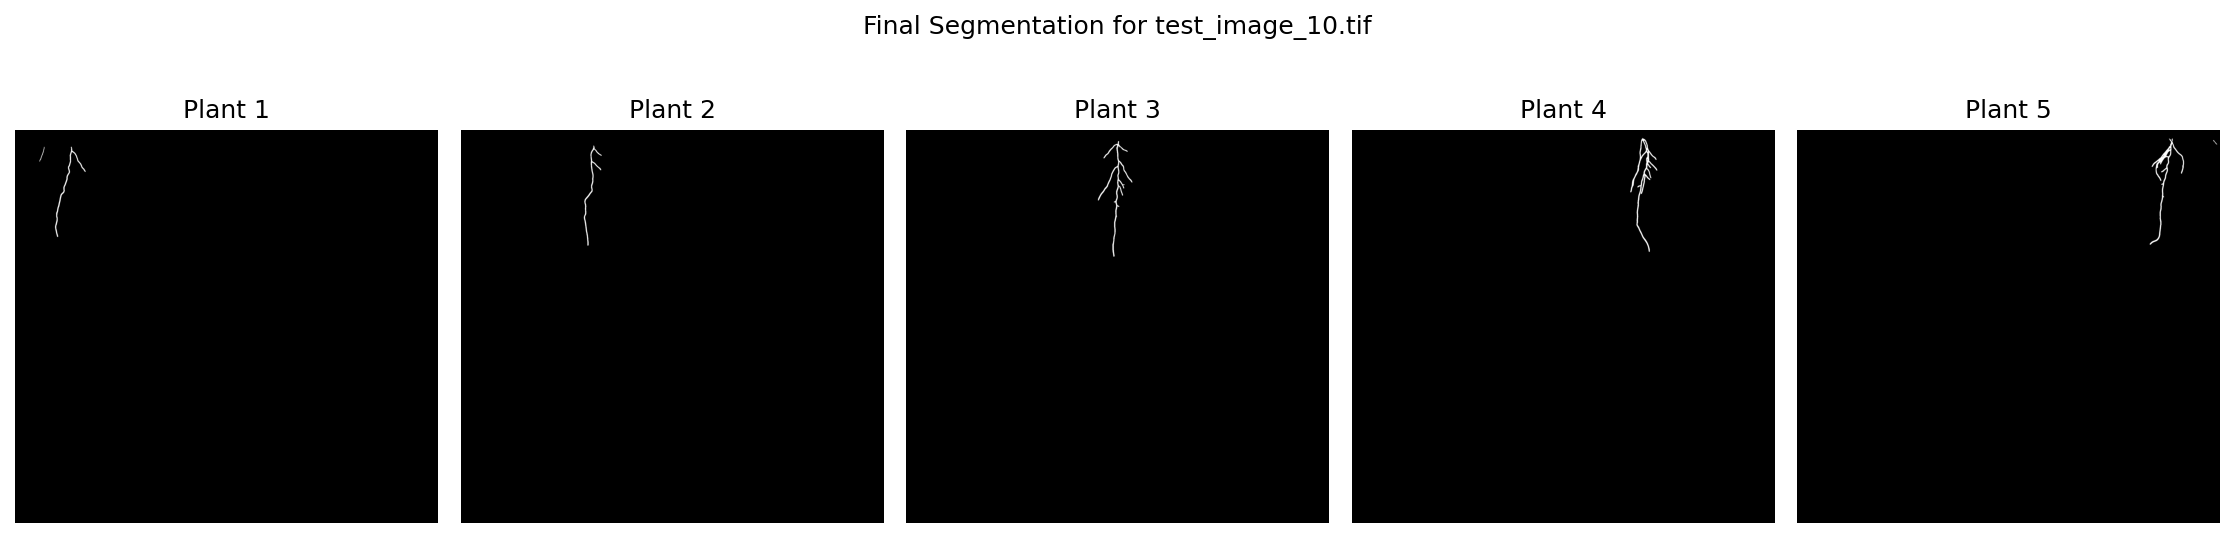


--- Segmenting Plants for: test_image_11.tif ---


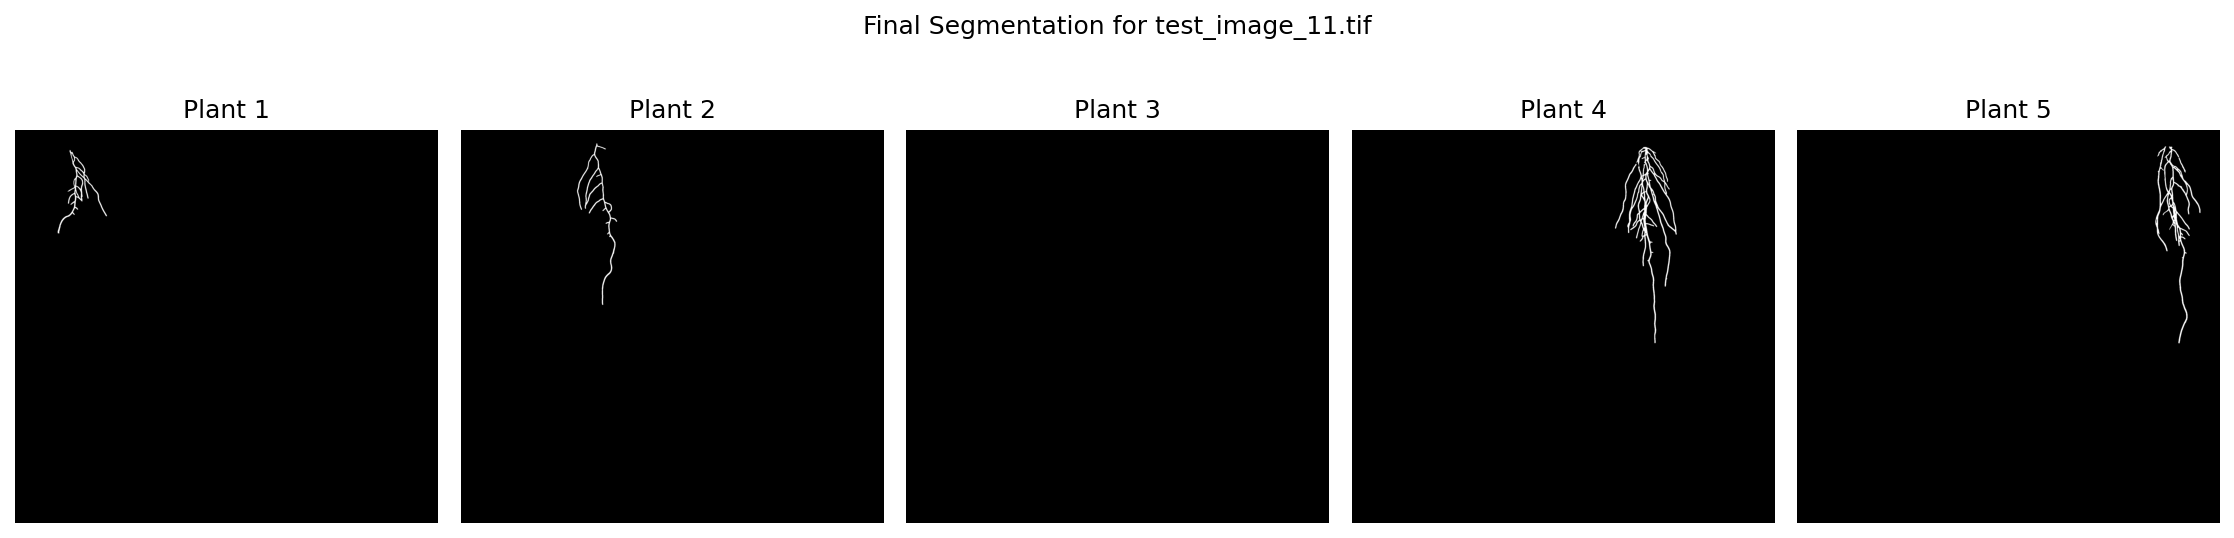


--- Segmenting Plants for: test_image_2.tif ---


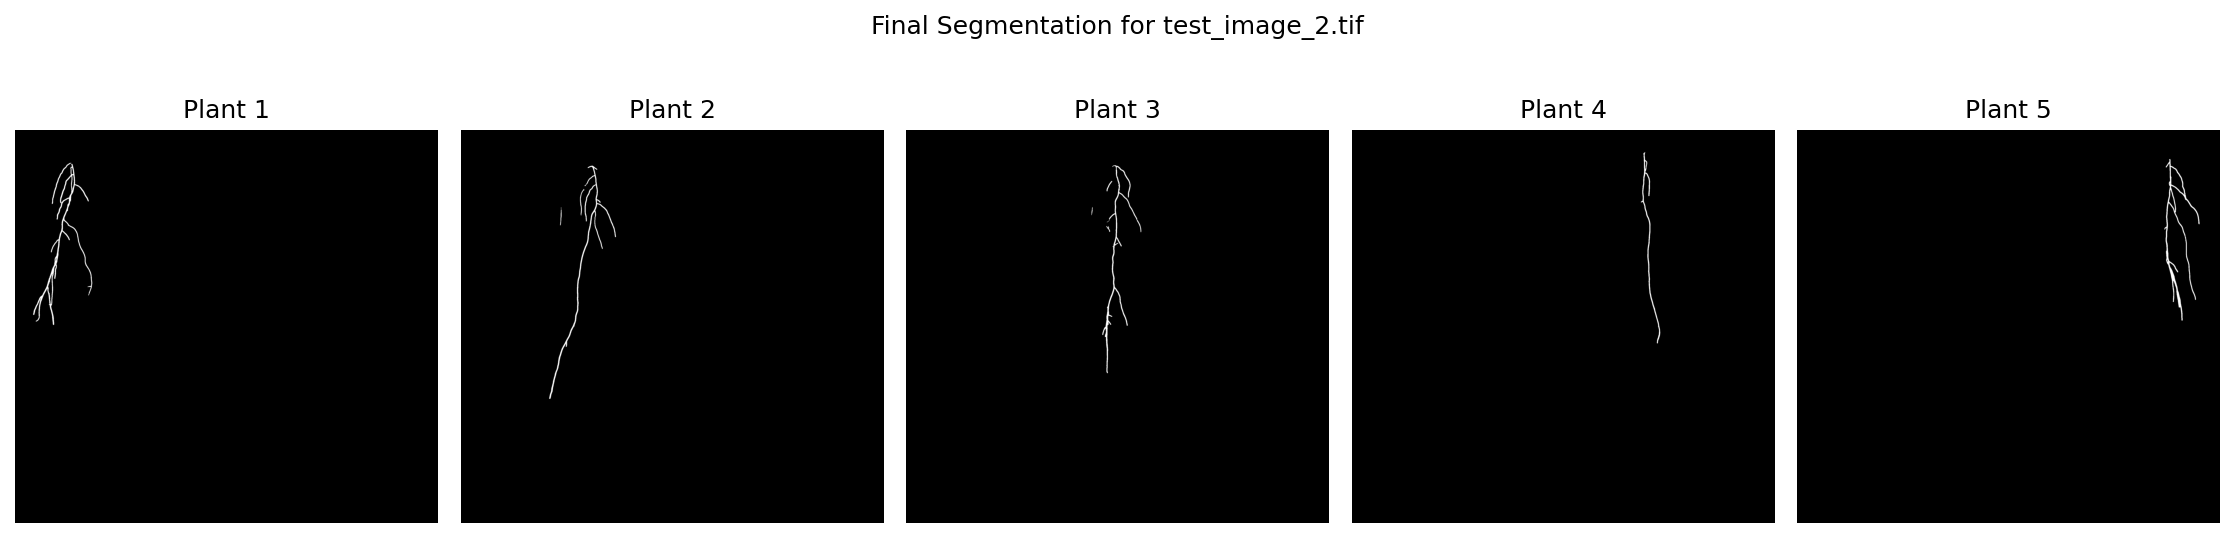


--- Segmenting Plants for: test_image_3.tif ---


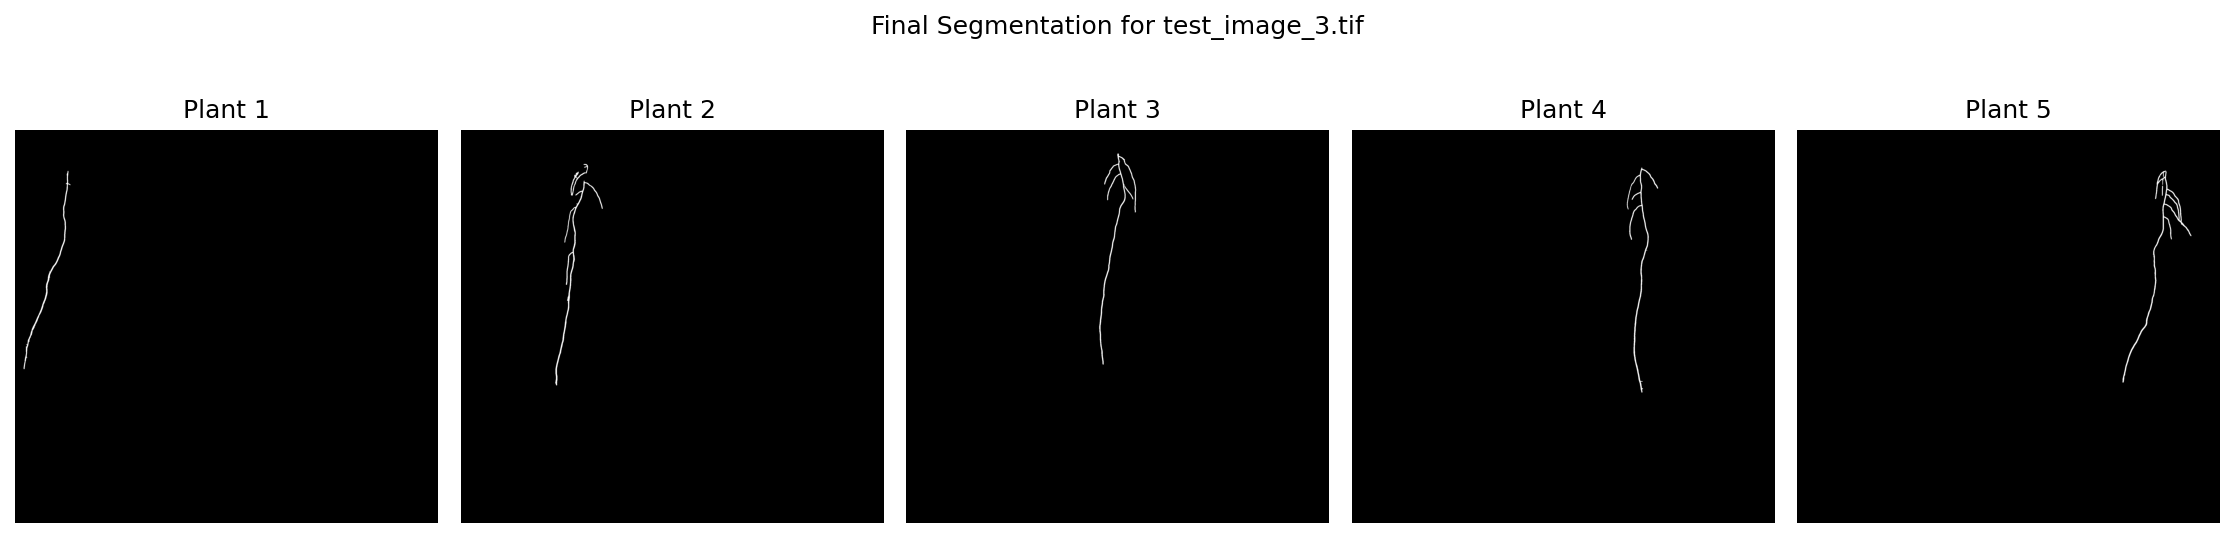


--- Segmenting Plants for: test_image_4.tif ---


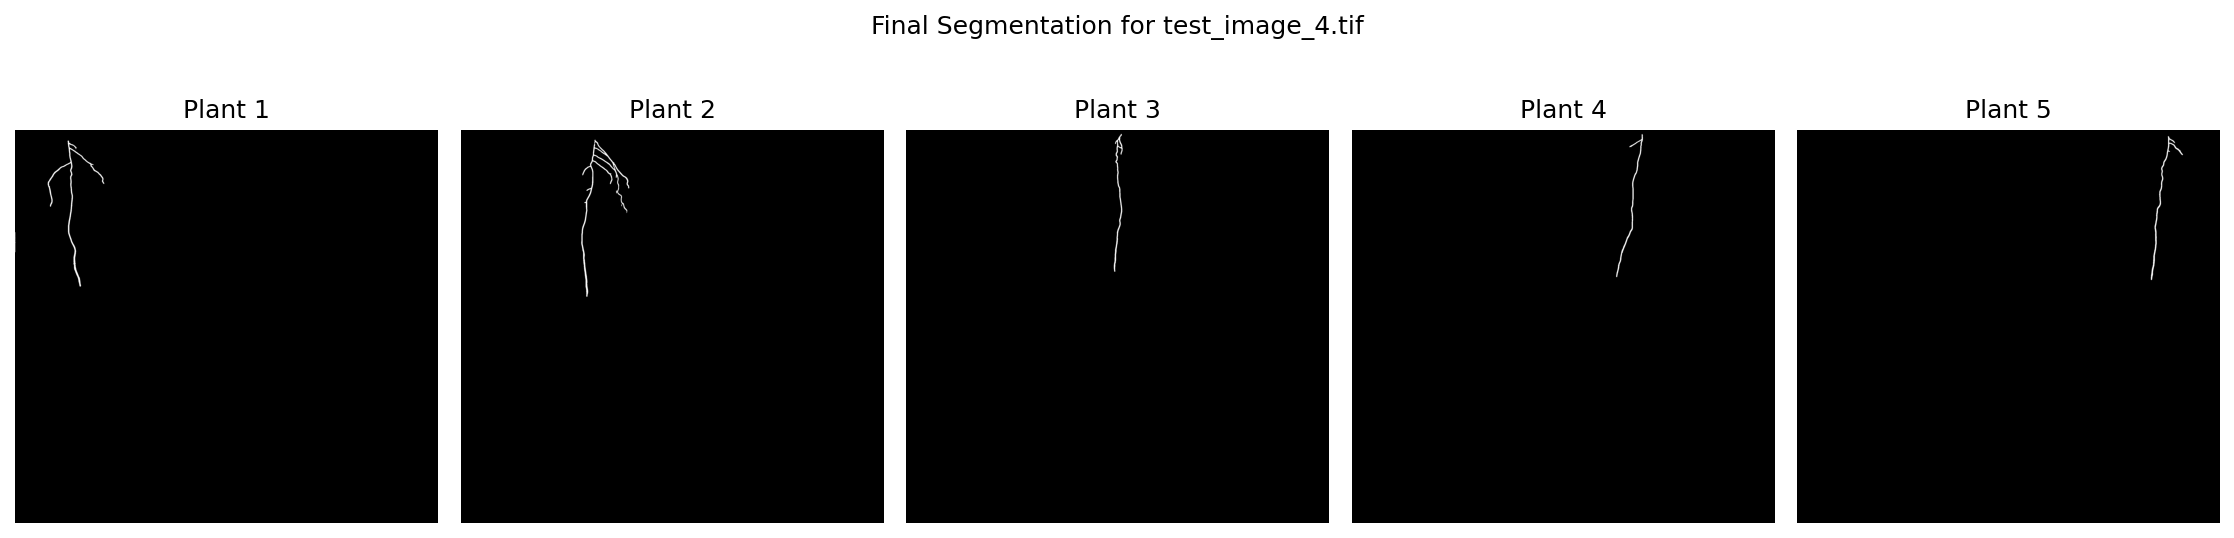


--- Segmenting Plants for: test_image_5.tif ---


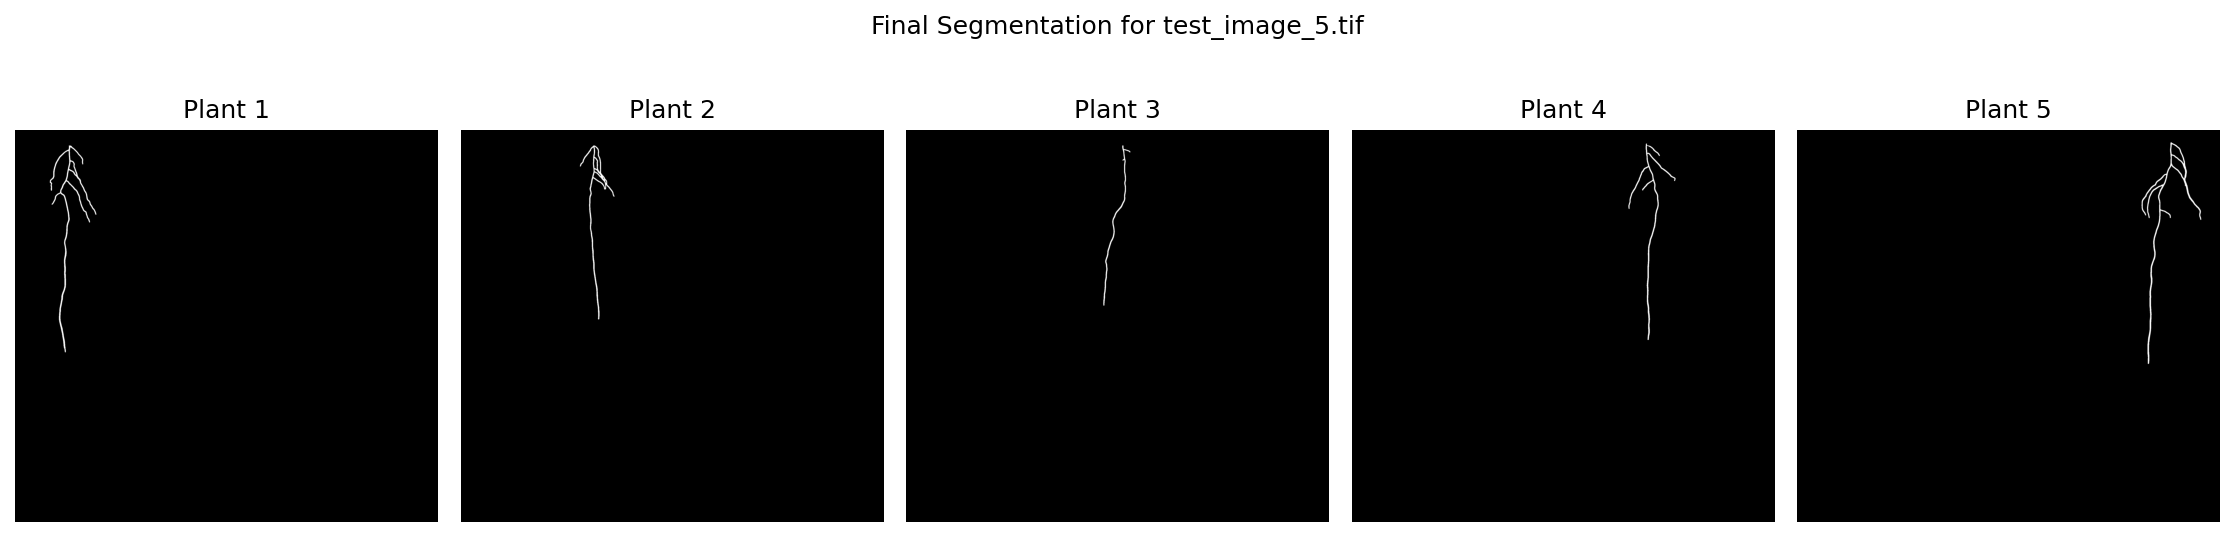


--- Segmenting Plants for: test_image_6.tif ---


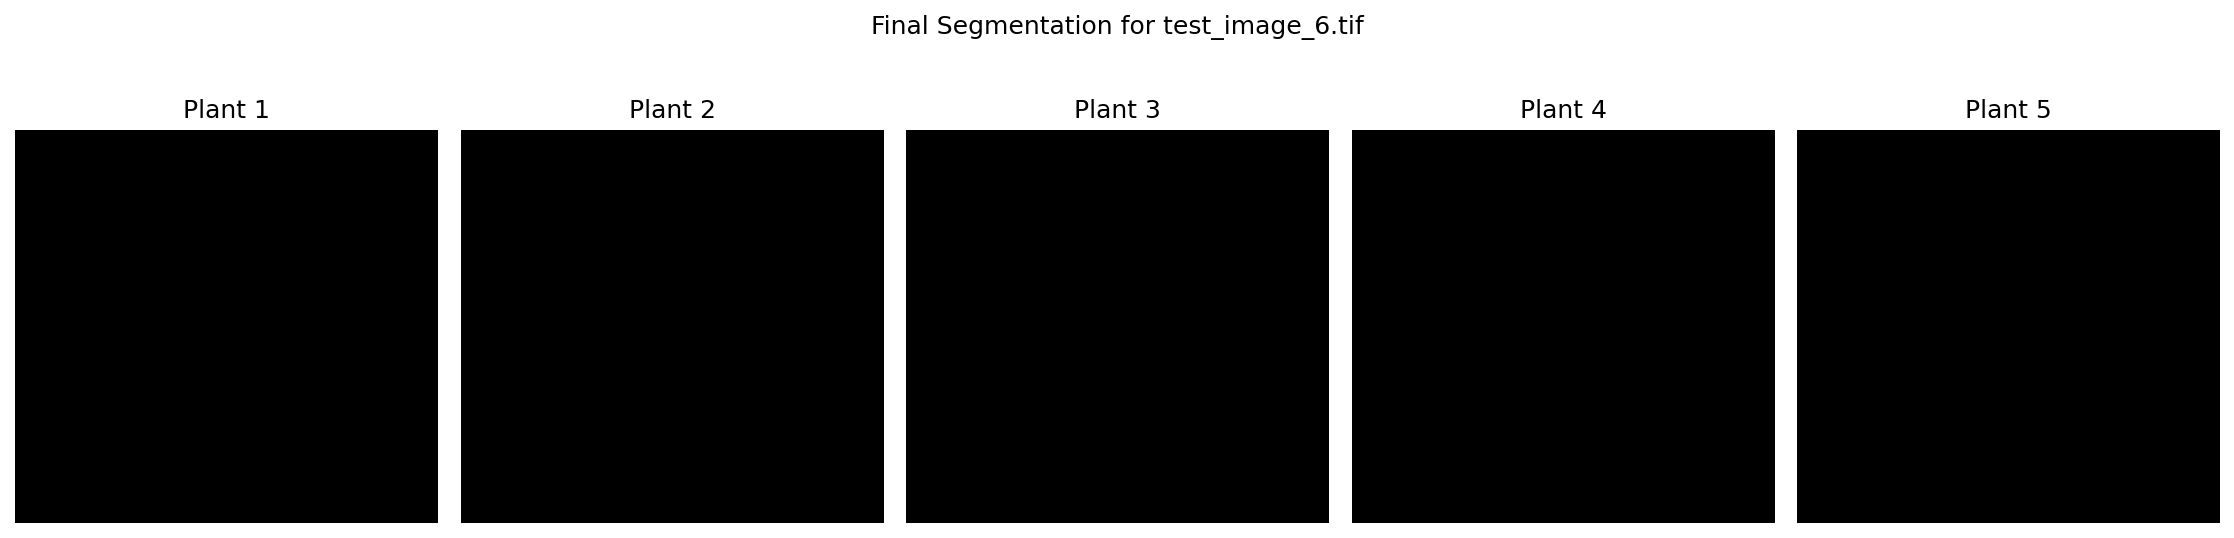


--- Segmenting Plants for: test_image_7.tif ---


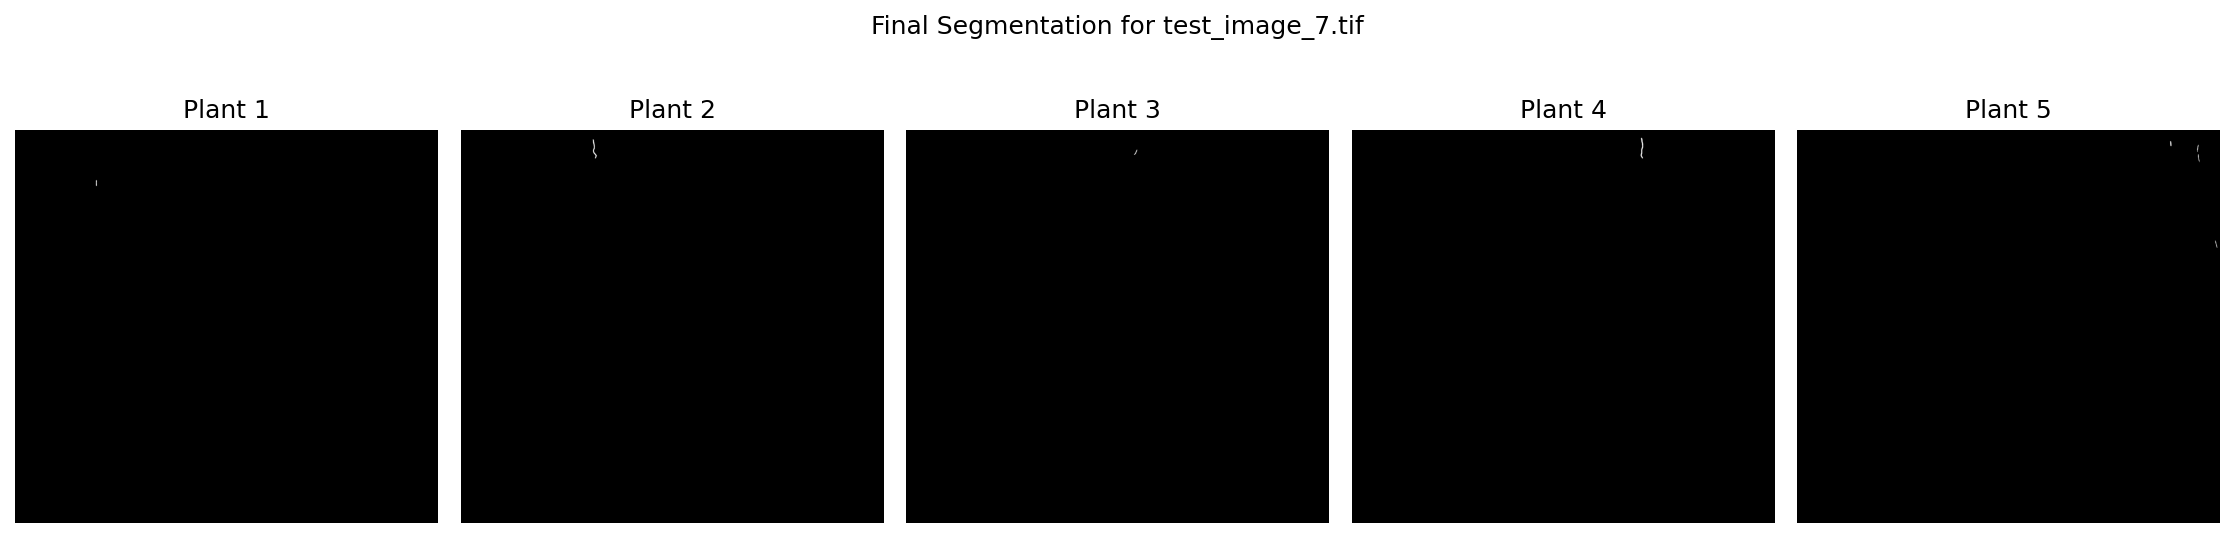


--- Segmenting Plants for: test_image_8.tif ---


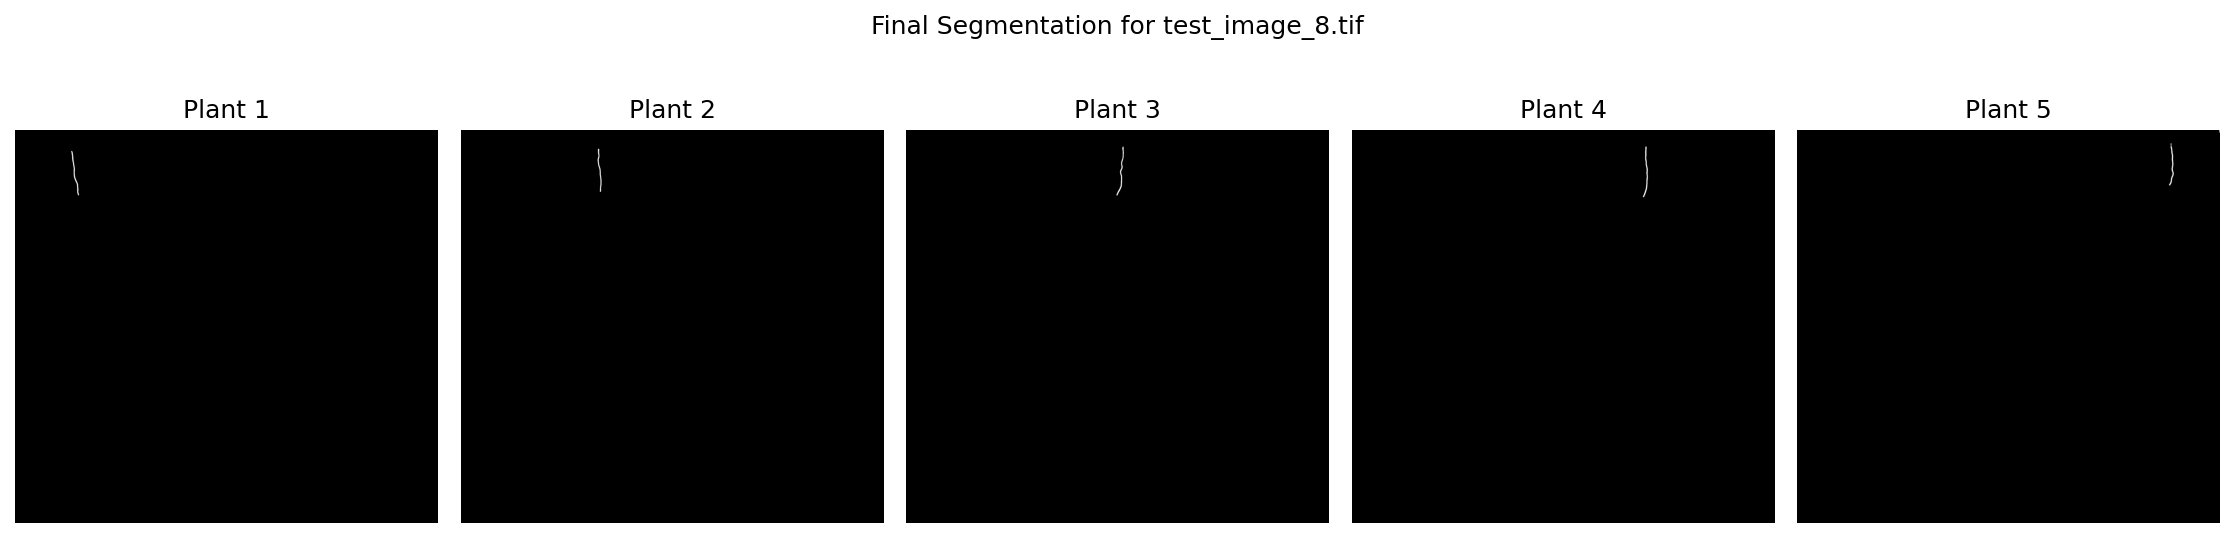


--- Segmenting Plants for: test_image_9.tif ---


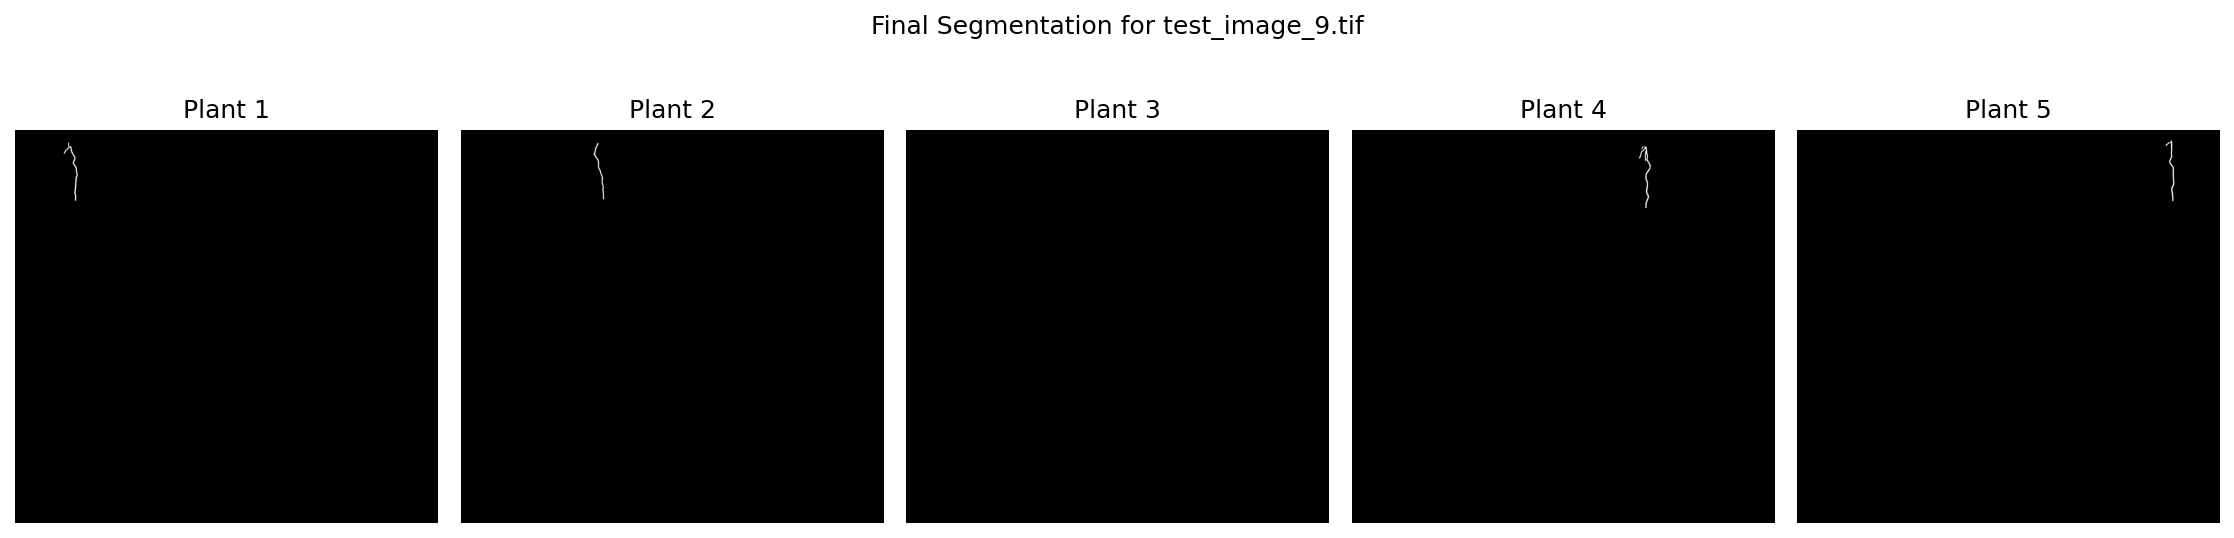

In [9]:
all_segmented_plants = {}

# Iterate over the dictionary of masks from the previous step
for name, cropped_mask in cropped_masks.items():
    print(f"\n--- Segmenting Plants for: {name} ---")
    
    # Apply the segmentation function to the current mask
    # This returns a list of 5 individual plant masks
    segmented_plant_masks = segment_plants_from_mask(cropped_mask, num_plants=5)
    
    # Store the list of masks in our results dictionary
    all_segmented_plants[name] = segmented_plant_masks
    
    plt.figure(figsize=(15, 4), dpi=150)
    for i, plant_mask in enumerate(segmented_plant_masks):
        plt.subplot(1, 5, i + 1) # Assuming num_plants is 5
        plt.imshow(plant_mask * 255, cmap='gray')
        plt.title(f'Plant {i + 1}')
        plt.axis('off')
    plt.suptitle(f"Final Segmentation for {name}", fontsize=12)
    plt.tight_layout()
    plt.show()

## Save masks

The segmented roots will be saved to a separate directory in case we might need them later for further processing.

In [10]:
# Folder to save final root masks
save_dir = r"C:\BUAS\retake\2024-25b-fai2-adsai-dariavladutu236578\datalab_tasks\task8\004_task8_masks"
os.makedirs(save_dir, exist_ok=True)

# Save and store
for name, plant_masks in all_segmented_plants.items():
    base_name = os.path.splitext(name)[0]  # e.g. 'test_image_1'

    for idx, mask in enumerate(plant_masks):
        plant_num = idx + 1
        key = f"{base_name}_plant_{plant_num}"
        filename = f"{key}.png"
        filepath = os.path.join(save_dir, filename)

        # Save the mask to file
        cv2.imwrite(filepath, mask)
        
        print(f"Saved: {key}")

Saved: test_image_1_plant_1
Saved: test_image_1_plant_2
Saved: test_image_1_plant_3
Saved: test_image_1_plant_4
Saved: test_image_1_plant_5
Saved: test_image_10_plant_1
Saved: test_image_10_plant_2
Saved: test_image_10_plant_3
Saved: test_image_10_plant_4
Saved: test_image_10_plant_5
Saved: test_image_11_plant_1
Saved: test_image_11_plant_2
Saved: test_image_11_plant_3
Saved: test_image_11_plant_4
Saved: test_image_11_plant_5
Saved: test_image_2_plant_1
Saved: test_image_2_plant_2
Saved: test_image_2_plant_3
Saved: test_image_2_plant_4
Saved: test_image_2_plant_5
Saved: test_image_3_plant_1
Saved: test_image_3_plant_2
Saved: test_image_3_plant_3
Saved: test_image_3_plant_4
Saved: test_image_3_plant_5
Saved: test_image_4_plant_1
Saved: test_image_4_plant_2
Saved: test_image_4_plant_3
Saved: test_image_4_plant_4
Saved: test_image_4_plant_5
Saved: test_image_5_plant_1
Saved: test_image_5_plant_2
Saved: test_image_5_plant_3
Saved: test_image_5_plant_4
Saved: test_image_5_plant_5
Saved: tes

## Applying RSA extraction && Primary root length

Here we first apply Root System Architecture extraction logic, and then extract the primary root length. We begin by thinning the mask into a one-pixel-wide skeleton, which it then converts into a mathematical graph structure where branches are edges and junctions are nodes. Instead of simply finding the longest path, the function evaluates all possible paths between the root tips. It calculates a score for each path based on a combination of its total pixel length, its verticality (how straight down it grows), and how centered it is within the frame. The path with the highest score is identified as the true primary root, and its length is returned as the final measurement.


--- Analyzing and Visualizing: test_image_1.tif ---
  Plant 1: Found primary root of length 600.32 pixels.


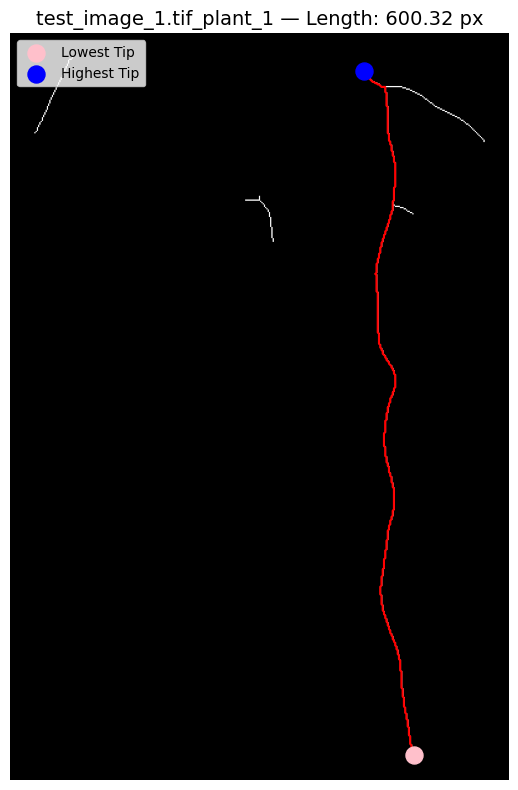

  Plant 2: Found primary root of length 525.12 pixels.


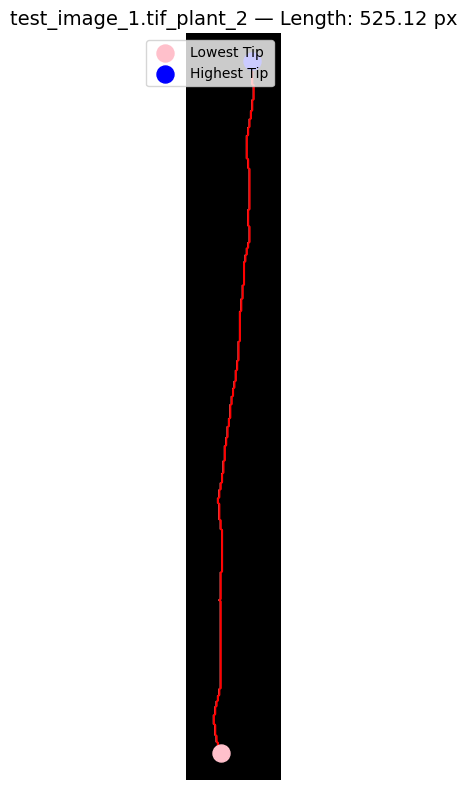

  Plant 3: Found primary root of length 702.69 pixels.


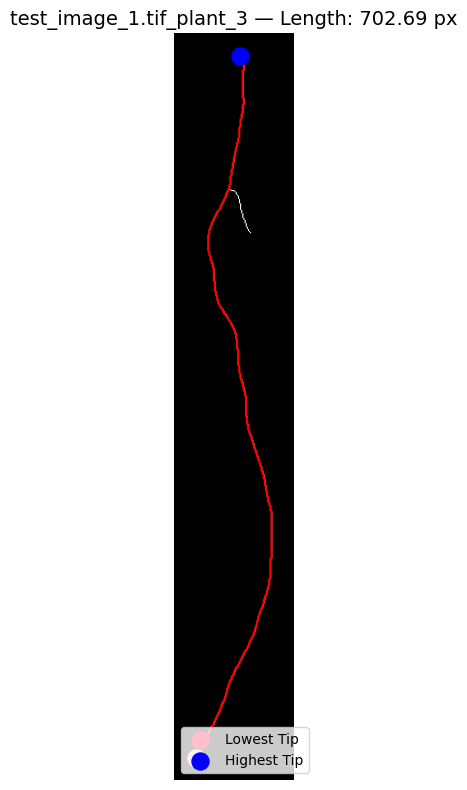

  Plant 4: Found primary root of length 440.71 pixels.


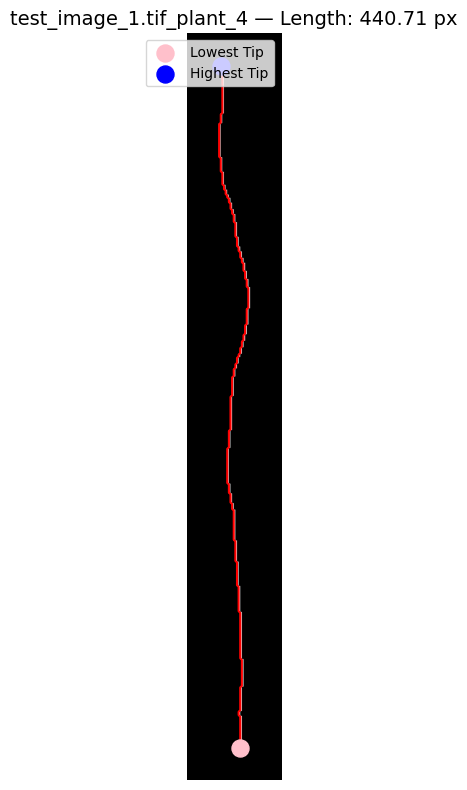

  Plant 5: Found primary root of length 664.63 pixels.


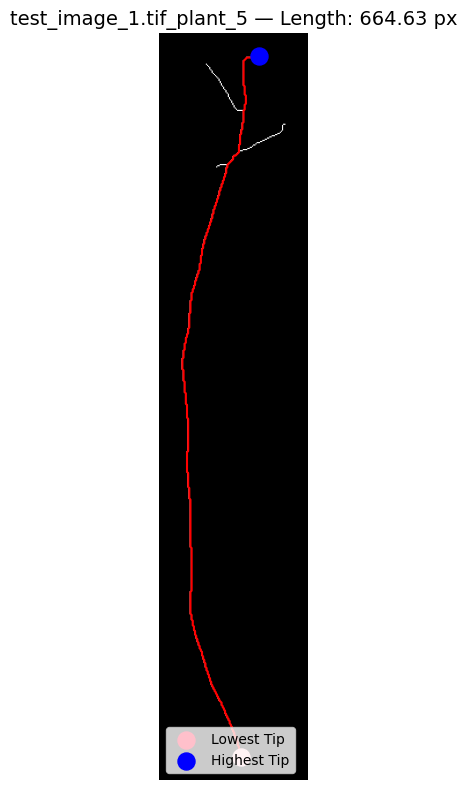


--- Analyzing and Visualizing: test_image_10.tif ---
  Plant 1: Found primary root of length 640.58 pixels.


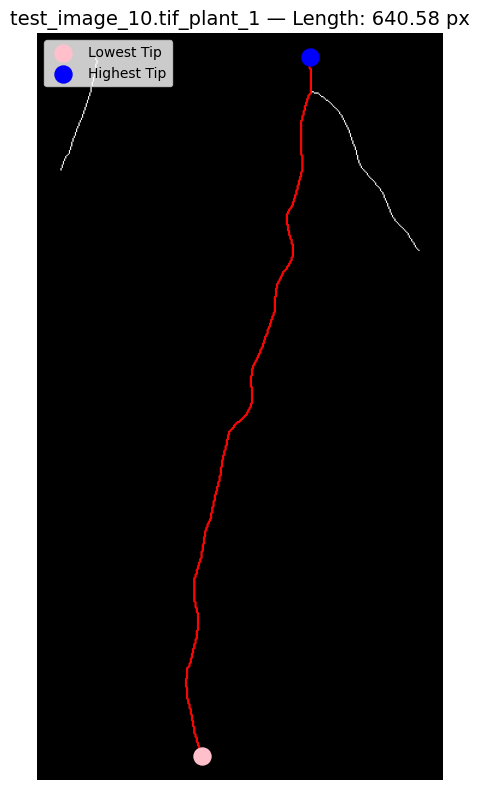

  Plant 2: Found primary root of length 703.50 pixels.


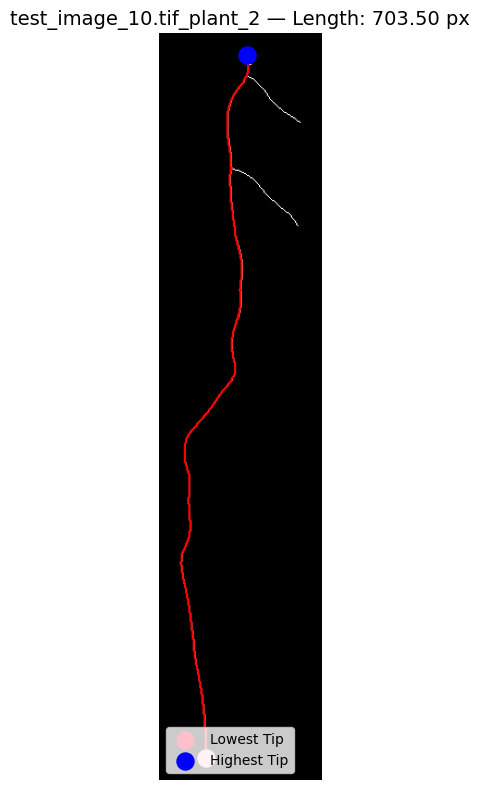

  Plant 3: Found primary root of length 795.25 pixels.


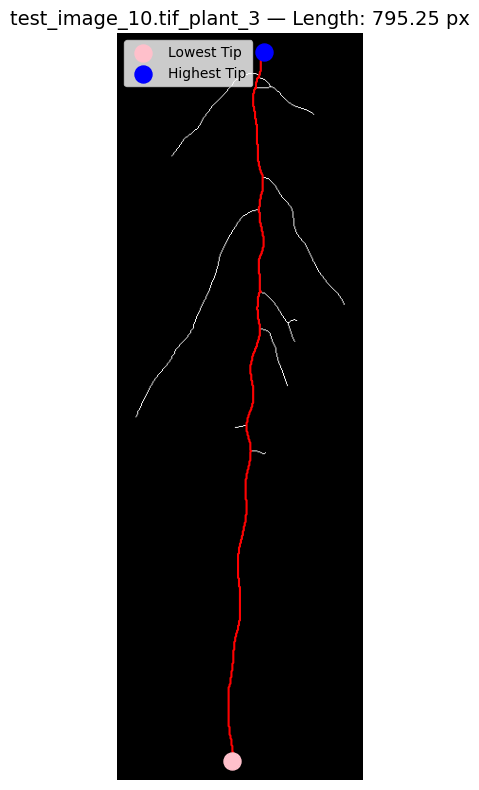

  Plant 4: Found primary root of length 827.80 pixels.


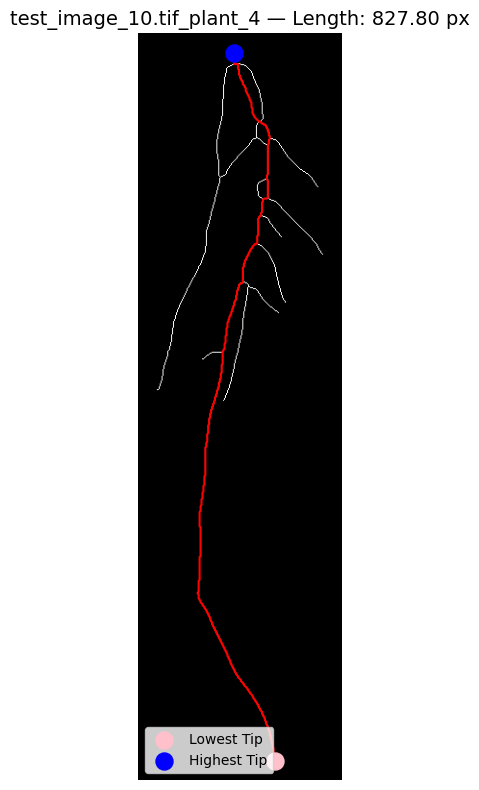

  Plant 5: Found primary root of length 773.93 pixels.


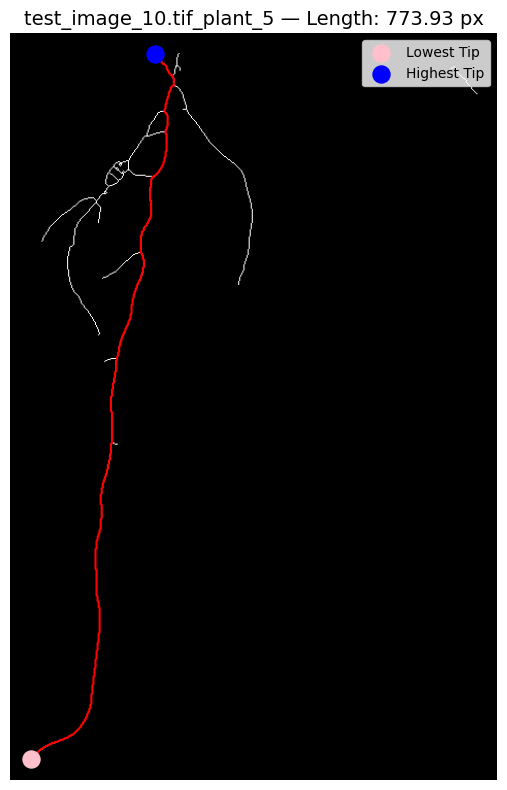


--- Analyzing and Visualizing: test_image_11.tif ---
  Plant 1: Found primary root of length 629.27 pixels.


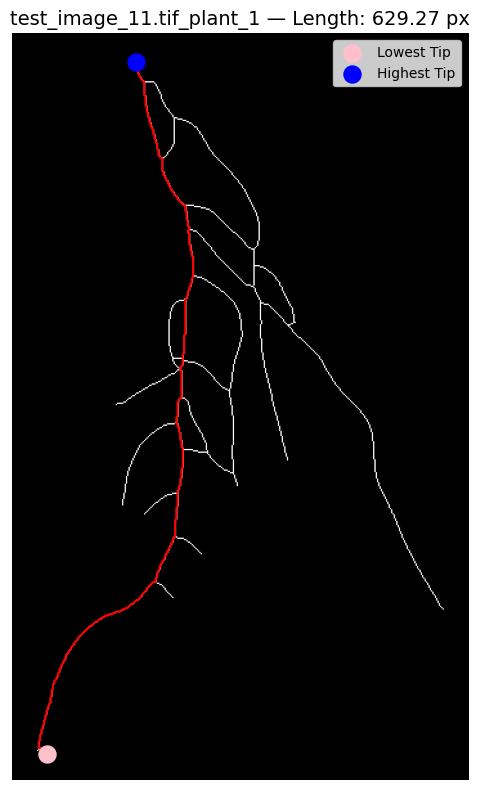

  Plant 2: Found primary root of length 1161.11 pixels.


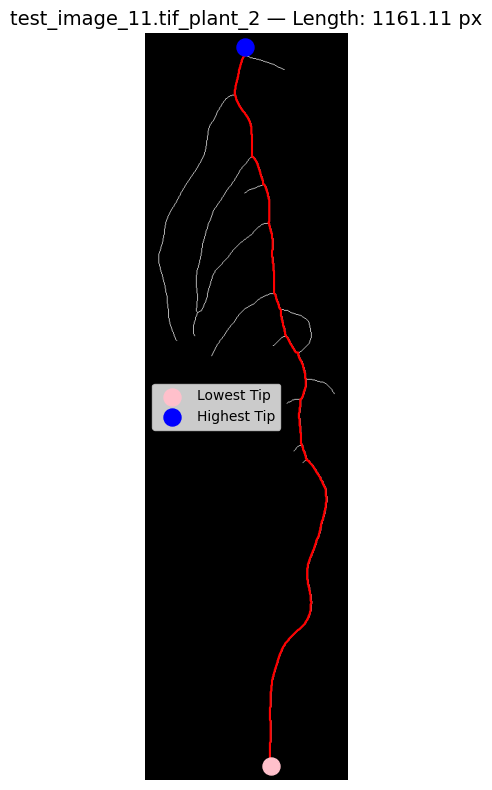

  Could not analyze Plant 3. Storing length 0.
  Plant 4: Found primary root of length 1358.74 pixels.


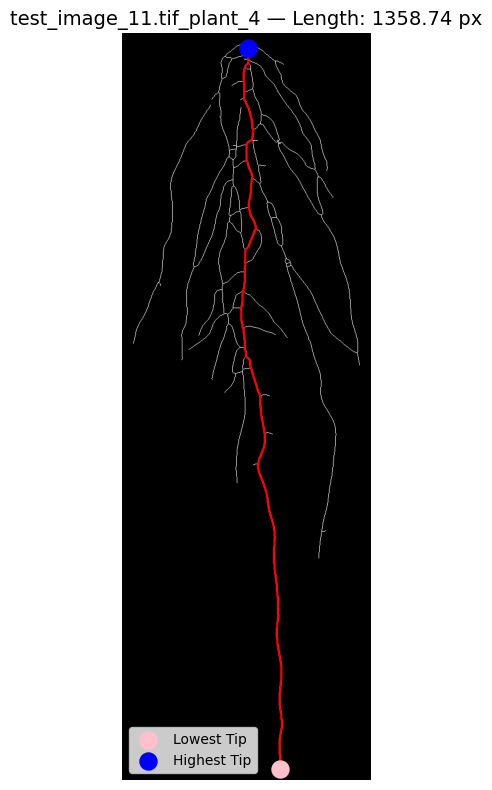

  Plant 5: Found primary root of length 1598.25 pixels.


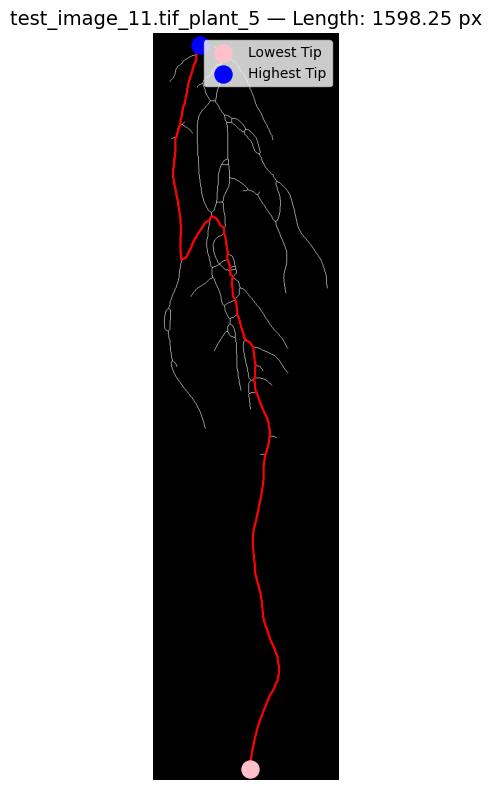


--- Analyzing and Visualizing: test_image_2.tif ---
  Plant 1: Found primary root of length 1136.84 pixels.


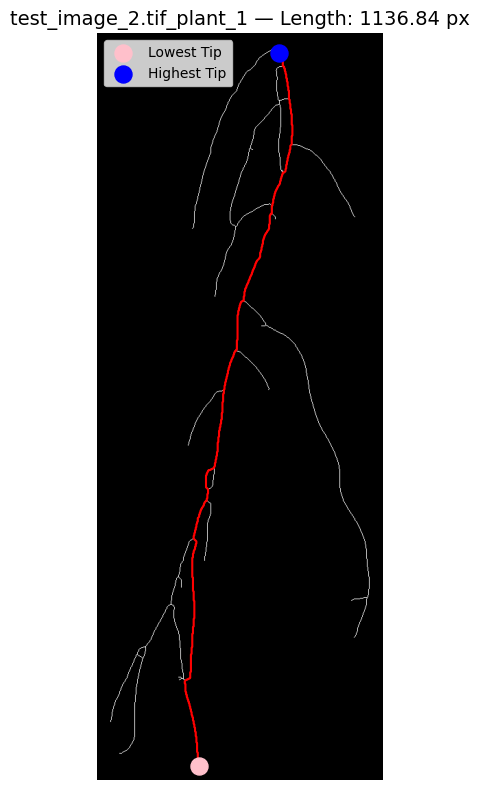

  Plant 2: Found primary root of length 1647.49 pixels.


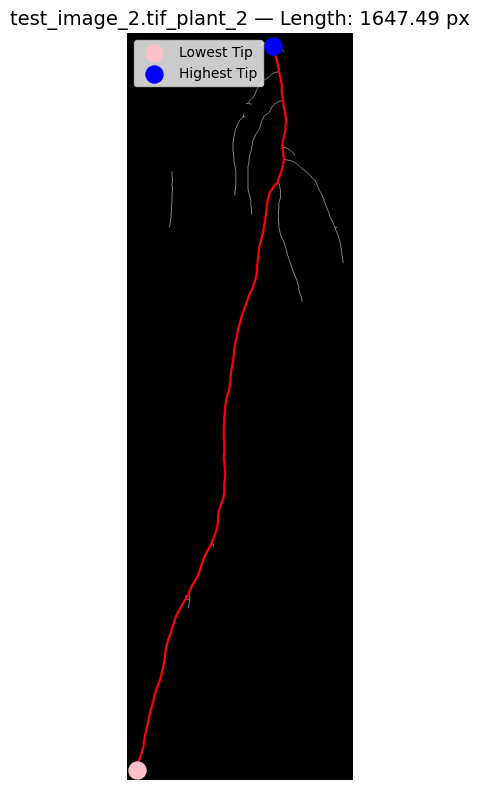

  Plant 3: Found primary root of length 1416.24 pixels.


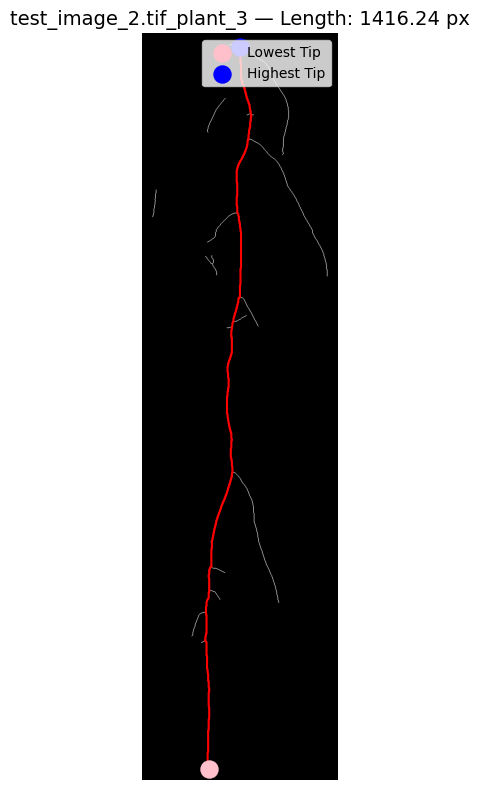

  Plant 4: Found primary root of length 1316.39 pixels.


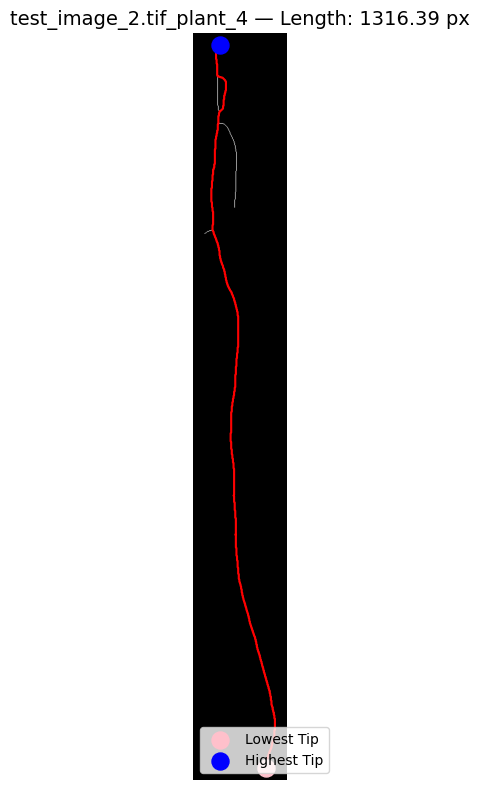

  Plant 5: Found primary root of length 1111.55 pixels.


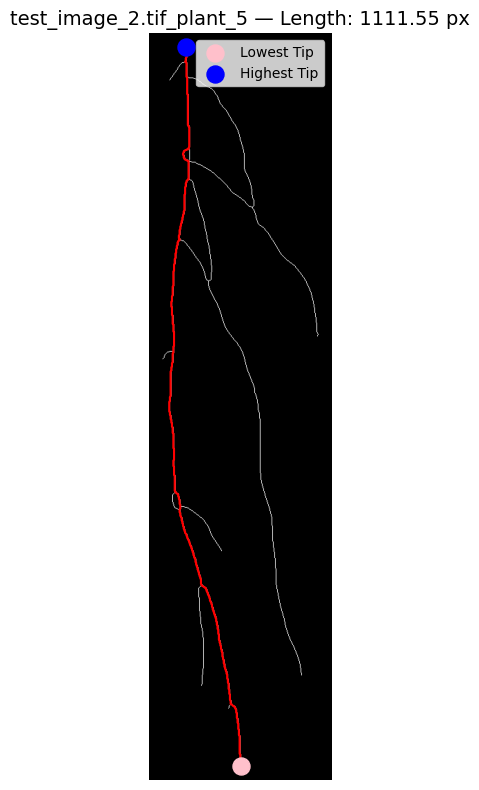


--- Analyzing and Visualizing: test_image_3.tif ---
  Plant 1: Found primary root of length 1414.48 pixels.


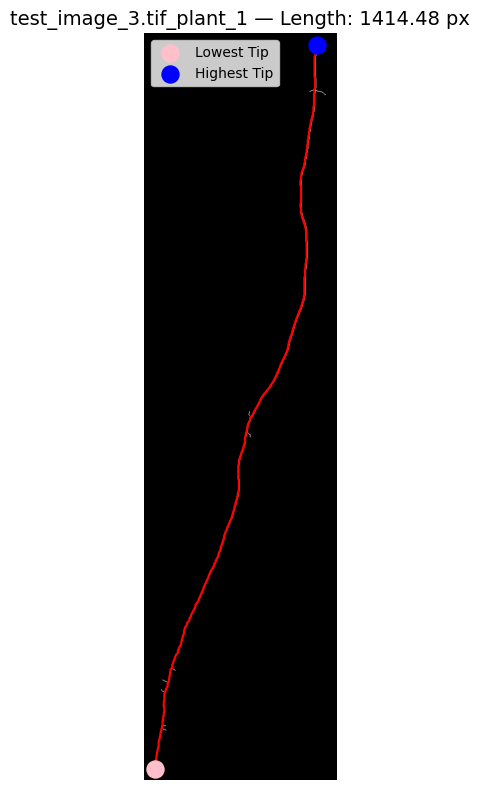

  Plant 2: Found primary root of length 274.28 pixels.


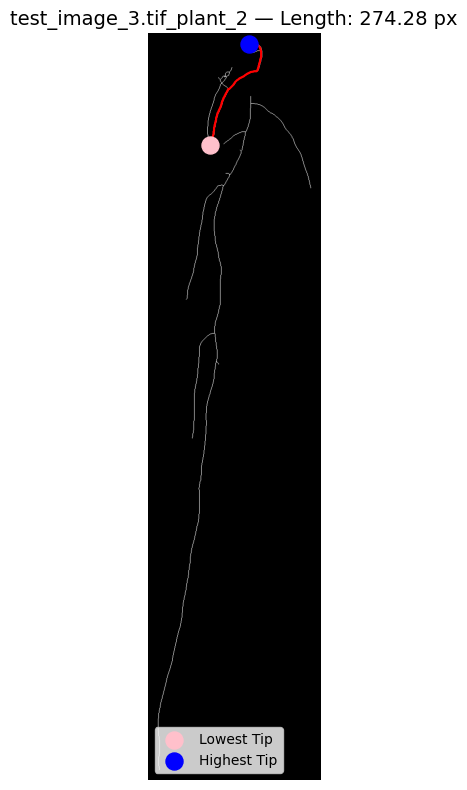

  Plant 3: Found primary root of length 1470.41 pixels.


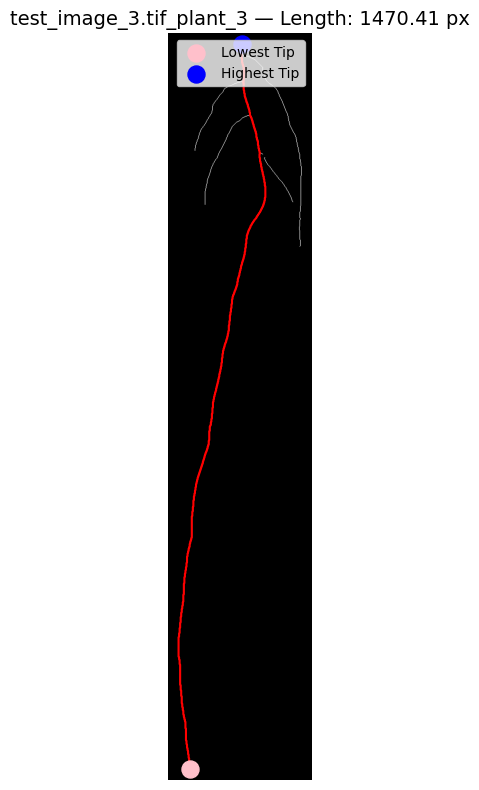

  Plant 4: Found primary root of length 1545.54 pixels.


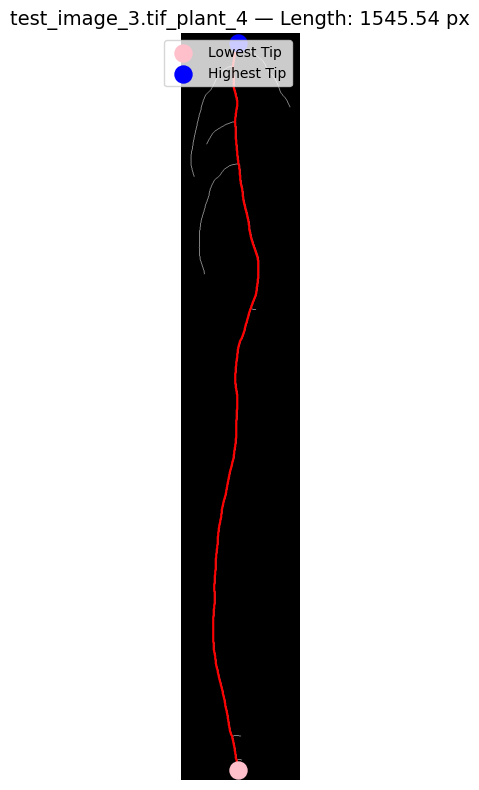

  Plant 5: Found primary root of length 1533.08 pixels.


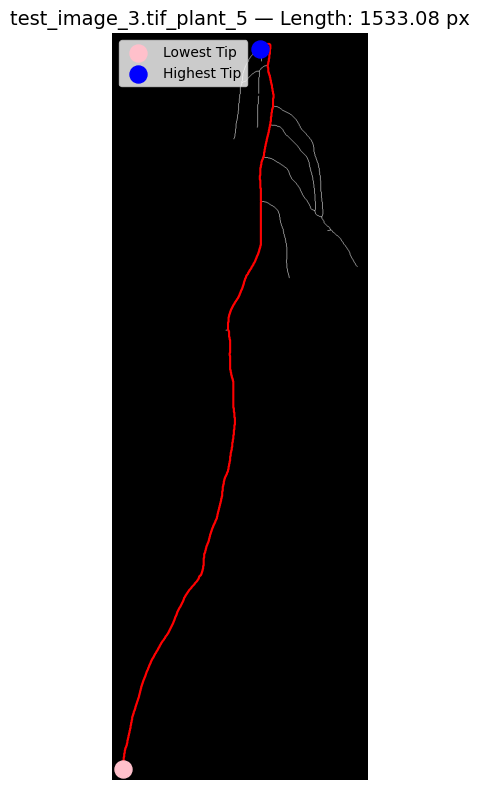


--- Analyzing and Visualizing: test_image_4.tif ---
  Plant 1: Found primary root of length 1007.76 pixels.


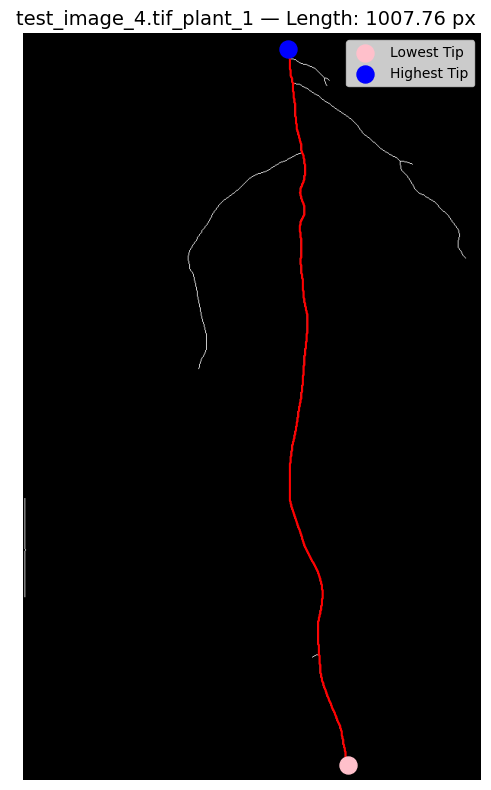

  Plant 2: Found primary root of length 1079.79 pixels.


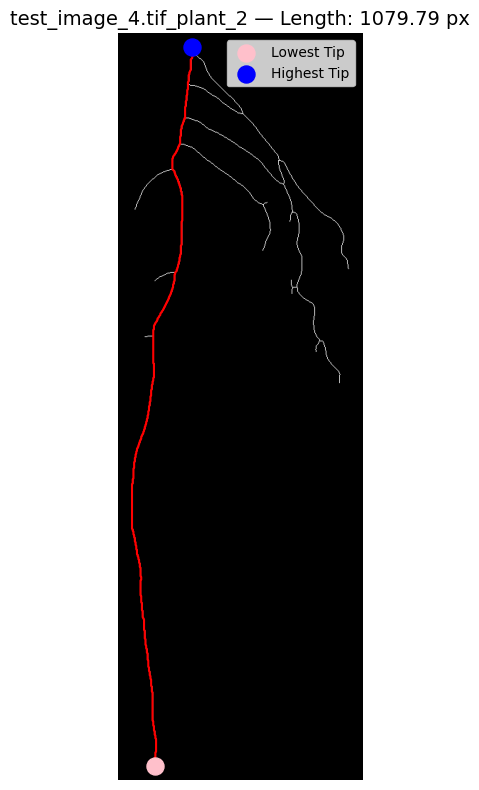

  Plant 3: Found primary root of length 952.30 pixels.


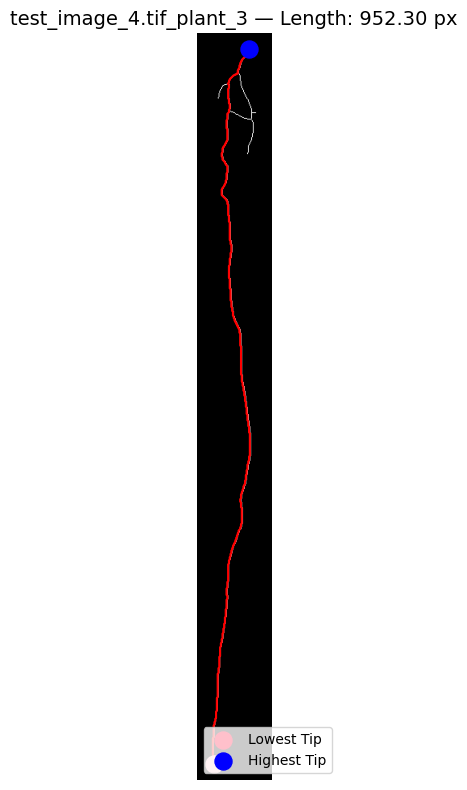

  Plant 4: Found primary root of length 1004.87 pixels.


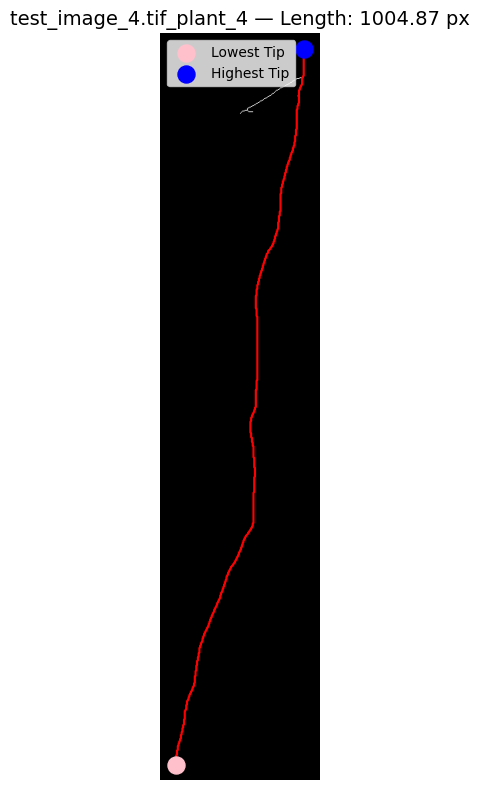

  Plant 5: Found primary root of length 995.03 pixels.


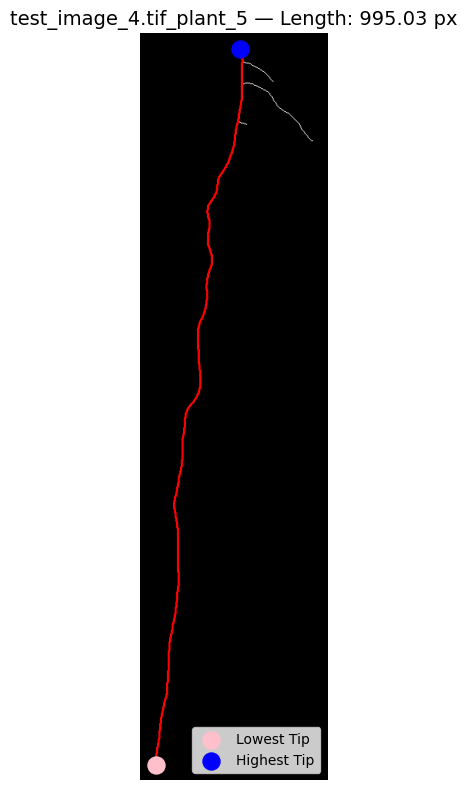


--- Analyzing and Visualizing: test_image_5.tif ---
  Plant 1: Found primary root of length 1450.07 pixels.


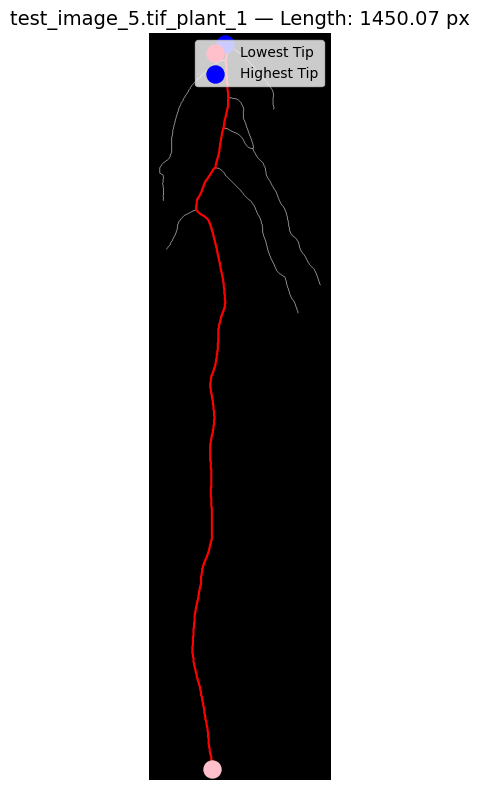

  Plant 2: Found primary root of length 1170.12 pixels.


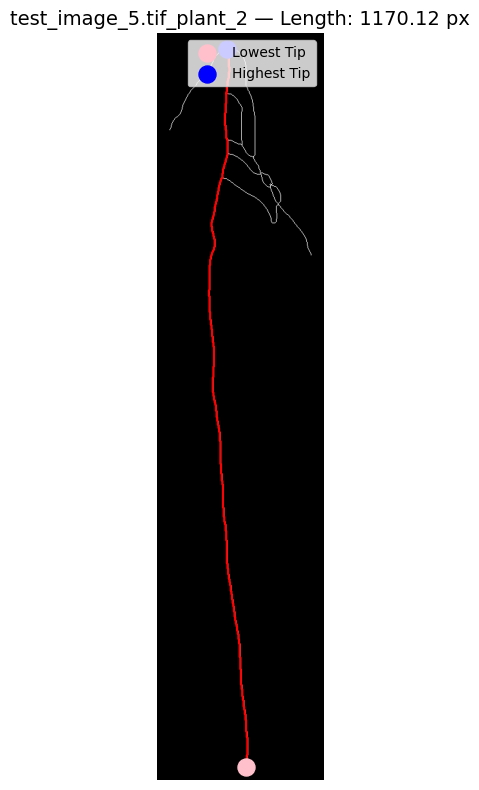

  Plant 3: Found primary root of length 1117.43 pixels.


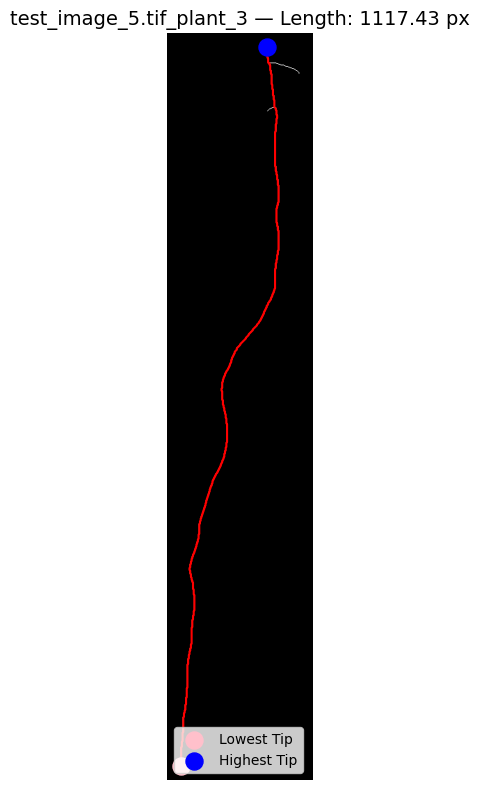

  Plant 4: Found primary root of length 1346.49 pixels.


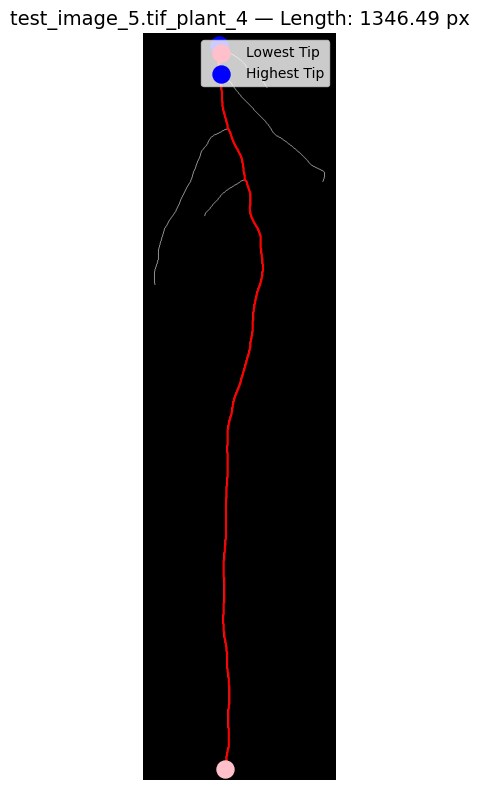

  Plant 5: Found primary root of length 1531.47 pixels.


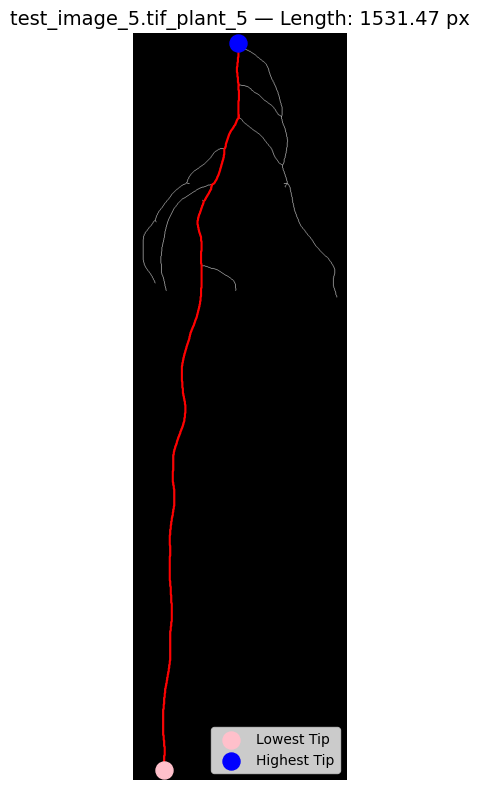


--- Analyzing and Visualizing: test_image_6.tif ---
  Could not analyze Plant 1. Storing length 0.
  Could not analyze Plant 2. Storing length 0.
  Could not analyze Plant 3. Storing length 0.
  Could not analyze Plant 4. Storing length 0.
  Could not analyze Plant 5. Storing length 0.

--- Analyzing and Visualizing: test_image_7.tif ---
  Plant 1: Found primary root of length 34.66 pixels.


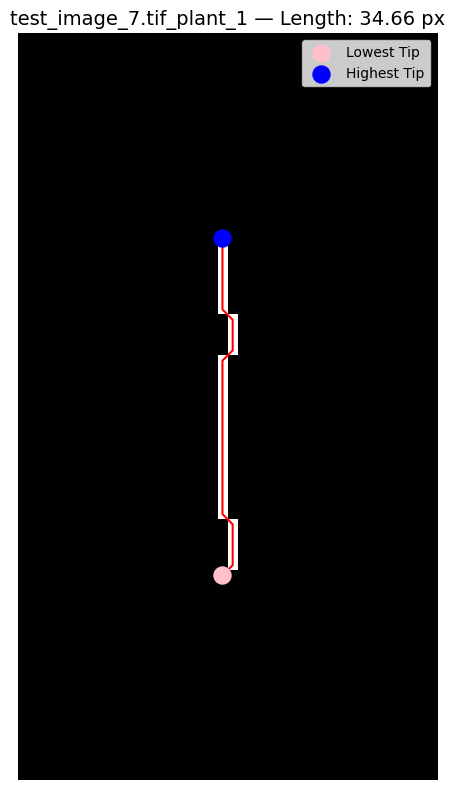

  Plant 2: Found primary root of length 131.67 pixels.


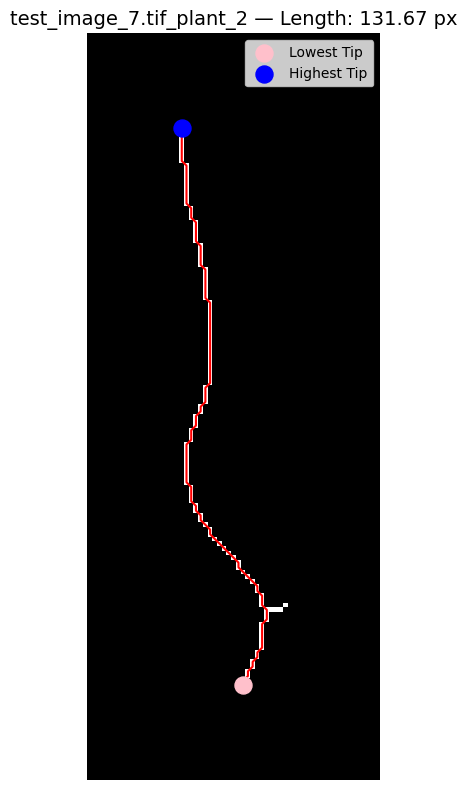

  Plant 3: Found primary root of length 41.04 pixels.


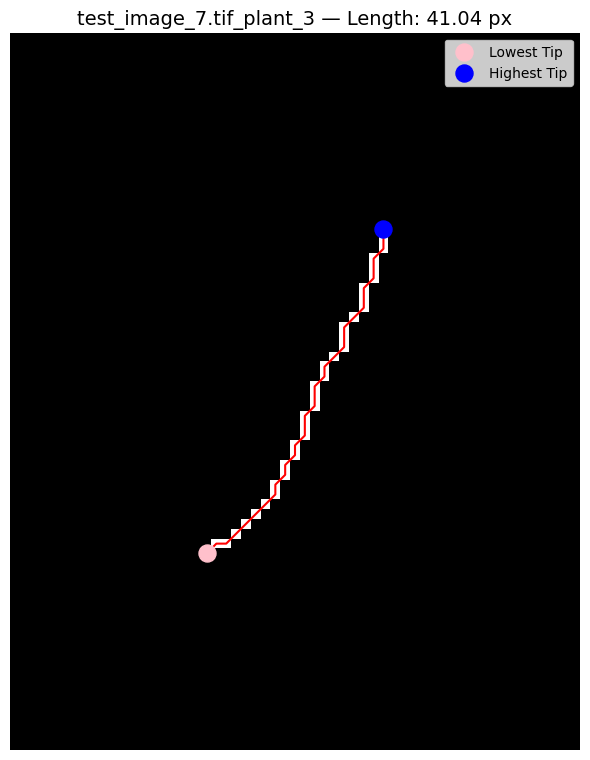

  Plant 4: Found primary root of length 140.77 pixels.


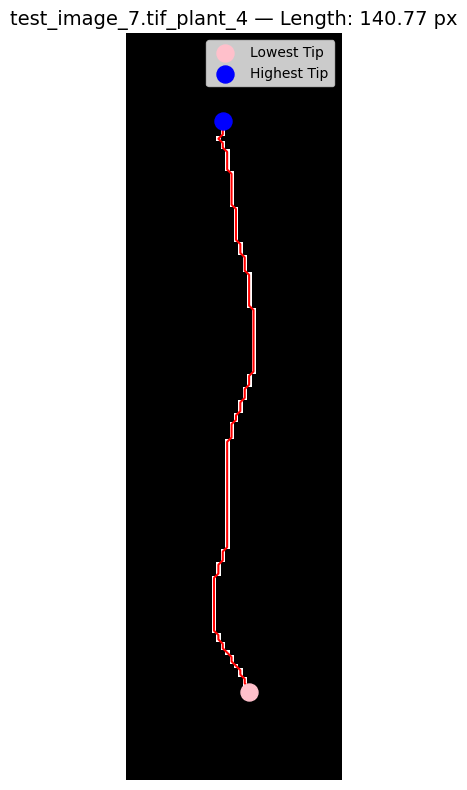

  Plant 5: Found primary root of length 29.66 pixels.


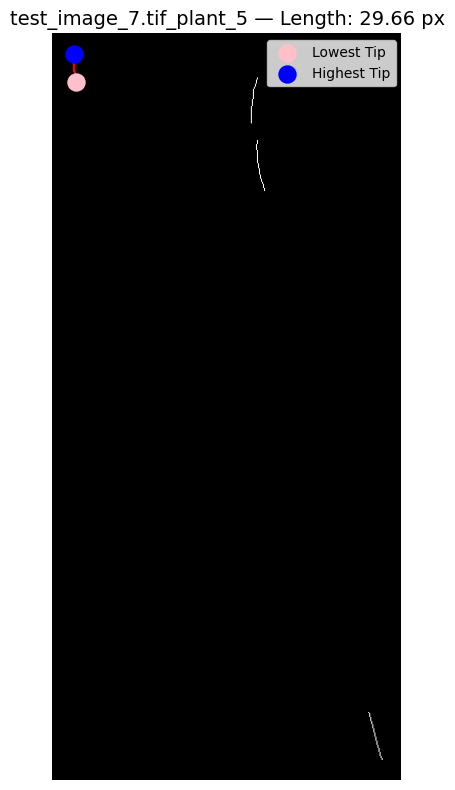


--- Analyzing and Visualizing: test_image_8.tif ---
  Plant 1: Found primary root of length 304.88 pixels.


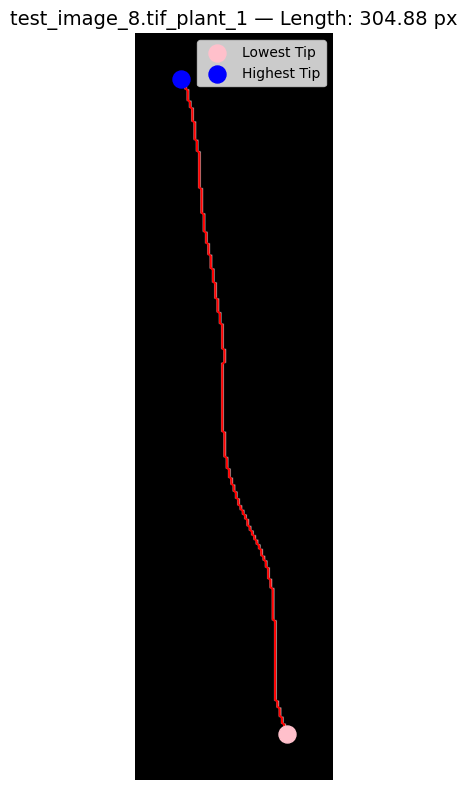

  Plant 2: Found primary root of length 289.43 pixels.


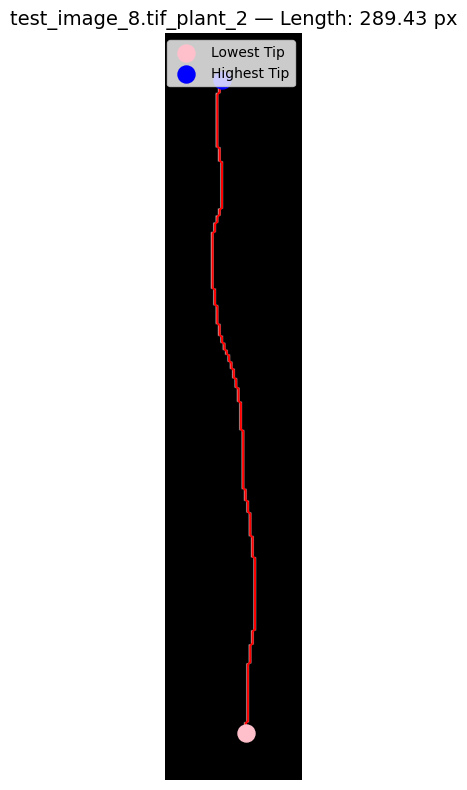

  Plant 3: Found primary root of length 341.51 pixels.


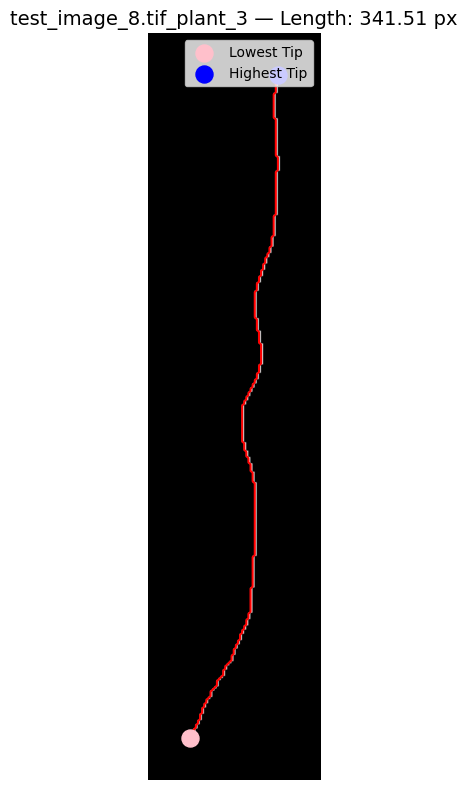

  Plant 4: Found primary root of length 341.81 pixels.


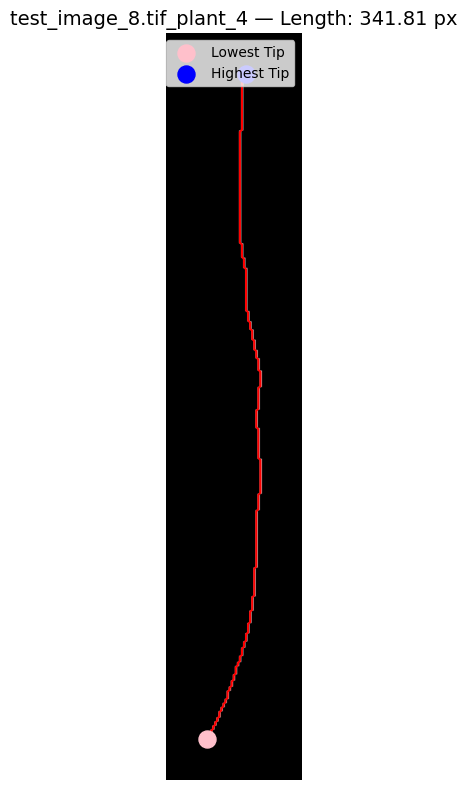

  Plant 5: Found primary root of length 291.30 pixels.


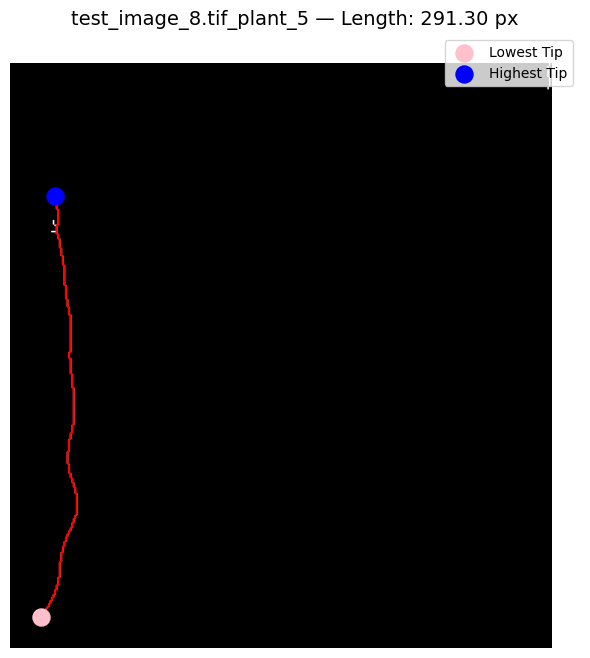


--- Analyzing and Visualizing: test_image_9.tif ---
  Plant 1: Found primary root of length 423.04 pixels.


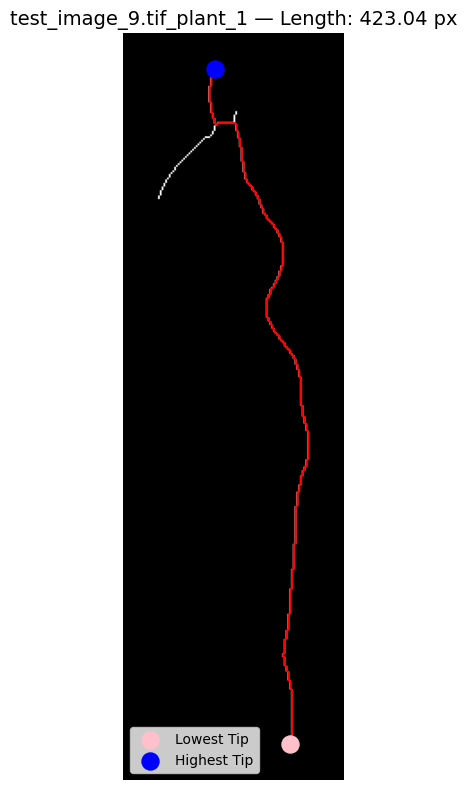

  Plant 2: Found primary root of length 398.55 pixels.


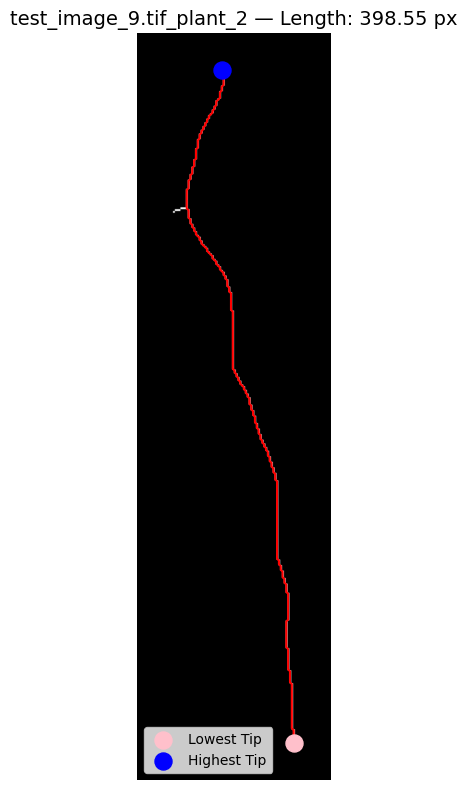

  Could not analyze Plant 3. Storing length 0.
  Plant 4: Found primary root of length 432.08 pixels.


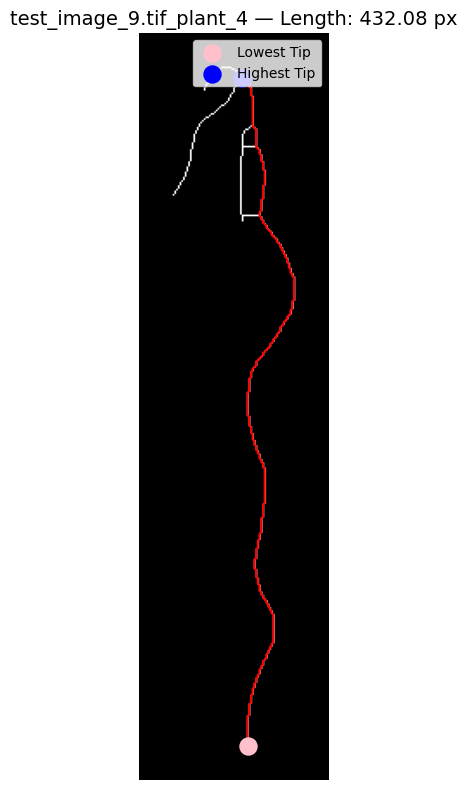

  Plant 5: Found primary root of length 420.99 pixels.


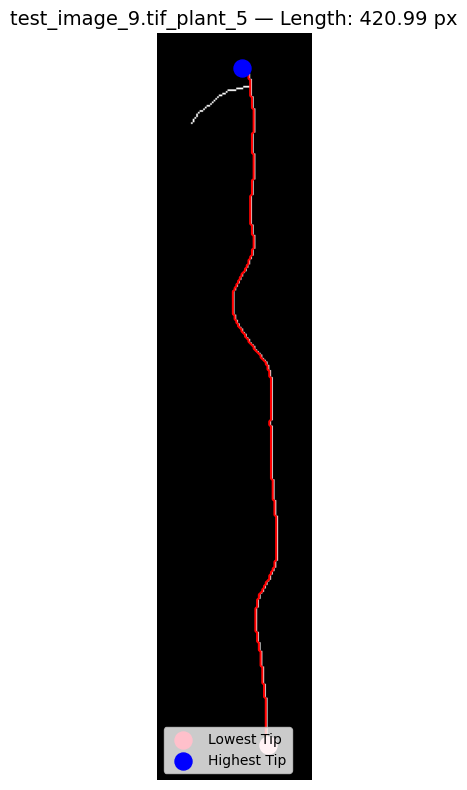

In [22]:
# This dictionary will store the final lengths.
all_plant_lengths = {}

# Iterate over the segmented plants from the previous step
for name, segmented_masks in all_segmented_plants.items():
    print(f"\n--- Analyzing and Visualizing: {name} ---")
    
    lengths_for_this_image = []
    
    for i, plant_mask in enumerate(segmented_masks):
        analysis_results = analyze_root_system(plant_mask)
        
        if analysis_results is None:
            lengths_for_this_image.append(0.0)
            print(f"  Could not analyze Plant {i + 1}. Storing length 0.")
            continue

        length = analysis_results["length"]
        skeleton = analysis_results["skeleton"]
        node_coords = analysis_results["node_coords"]
        path_nodes = analysis_results["path_nodes"]
        pixel_path = analysis_results["pixel_path"]
        
        lengths_for_this_image.append(length)
        print(f"  Plant {i + 1}: Found primary root of length {length:.2f} pixels.")

        # --- Create the Visualization ---
        fig, ax = plt.subplots(figsize=(6, 8), dpi=100)
        
        ax.imshow(skeleton, cmap='gray')
        path_coords = node_coords[path_nodes]
        ax.plot(pixel_path[:, 1], pixel_path[:, 0], color='red', lw=1.5, zorder=3)

        start_node_coords = node_coords[path_nodes[0]]
        end_node_coords = node_coords[path_nodes[-1]]

        if start_node_coords[0] < end_node_coords[0]:
            highest_tip, lowest_tip = start_node_coords, end_node_coords
        else:
            highest_tip, lowest_tip = end_node_coords, start_node_coords
        
        ax.scatter(lowest_tip[1], lowest_tip[0], c='pink', s=150, label='Lowest Tip', zorder=5)
        ax.scatter(highest_tip[1], highest_tip[0], c='blue', s=150, label='Highest Tip', zorder=5)
        
        # Find the coordinates of all pixels in the skeleton
        rows, cols = np.where(skeleton)
        
        # Define a padding margin
        padding = 20 
        
        # Set the plot limits to the bounding box of the skeleton plus padding
        if rows.size > 0 and cols.size > 0:
            ax.set_ylim(max(rows) + padding, min(rows) - padding) # Inverted for image coordinates
            ax.set_xlim(min(cols) - padding, max(cols) + padding)
        
        ax.set_title(f"{name.replace('.png', '')}_plant_{i+1} — Length: {length:.2f} px", fontsize=14)
        ax.legend()
        ax.axis('off')
        plt.tight_layout()
        plt.show()

    all_plant_lengths[name] = lengths_for_this_image

## Exporting the primary root lenghts

The desired output of this pipeline is a `CSV` to be submitted to Kaggle, which each row containing a `Plant_ID` and its corresponding `Length(px)`.

In [25]:
# Path to save the new, correctly formatted CSV
csv_path = r"004_submission.csv"

# Write to CSV
with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Plant ID", "Length (px)"])  # Write the header once

    # Loop through each image (key) and its list of lengths (value)
    for name, lengths in all_plant_lengths.items():
        # Loop through the 5 lengths for the current image
        for i, length in enumerate(lengths):
            # Create the specific Plant ID, e.g., "test_image_1_plant_1"
            plant_id = f"{name.replace('.tif', '')}_plant_{i+1}"
            
            # Write one row for each individual plant
            writer.writerow([plant_id, f"{length:.2f}"])

print(f"Saved submission to:\n{csv_path}")

Saved submission to:
004_submission.csv


## Finish tracking

In [24]:
# Log Results and Artifacts
kaggle_public_score = 6.073 # received from Kaggle after submission
wandb.log({"public_score": kaggle_public_score})

# Log the submission file as an "Artifact" for version control
submission_artifact = wandb.Artifact('submission', type='result')
submission_artifact.add_file(csv_path)
run.log_artifact(submission_artifact)

# Finish the Run
run.finish()

print("W&B run finished and all data saved.")

W&B run finished and all data saved.
